# Voice analysis and modeling

Objectives:

1- Analyse sound.

2- Human Voice filter.

3- Voice feature tagger.

4- Voice transcription.

### Sound Analysis

##### Steps
1- load sound data 

2- data analysis and visualization


In [37]:
# load required libraries
import numpy as np
import pyaudio as pa 
import struct 
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [38]:
file_path = '../data/audio/aeka_audio/'
files = os.listdir(file_path)

In [2]:
# decode audio files
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(audio_binary)
    return tf.squeeze(audio, axis=1)

In [33]:
def get_spec(file_path):
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    zero_padding = (222621 - len(waveform))*[0]
    zero_padding = tf.constant(zero_padding, tf.float32)
    waveform = tf.cast(waveform, tf.float32)
    equal_length = tf.concat([waveform, zero_padding], 0)
    spectogram = tf.signal.stft(equal_length, frame_length = 63, frame_step=32)
    spectogram = tf.abs(spectogram)
    return tf.expand_dims(spectogram, axis=-1)


In [28]:
#!ls ../data/audio/aeka_audio



In [34]:
spectogram = get_spec('../data/audio/aeka_audio/AEKA0_tcp-27_11_2022-17-58-37.wav')

In [35]:
print(spectogram.shape)

(6955, 33, 1)


/tmp/ipykernel_86471/1615782127.py:5: RuntimeWarning: divide by zero encountered in log
  power_spec = np.log(spec)


1
33 6955


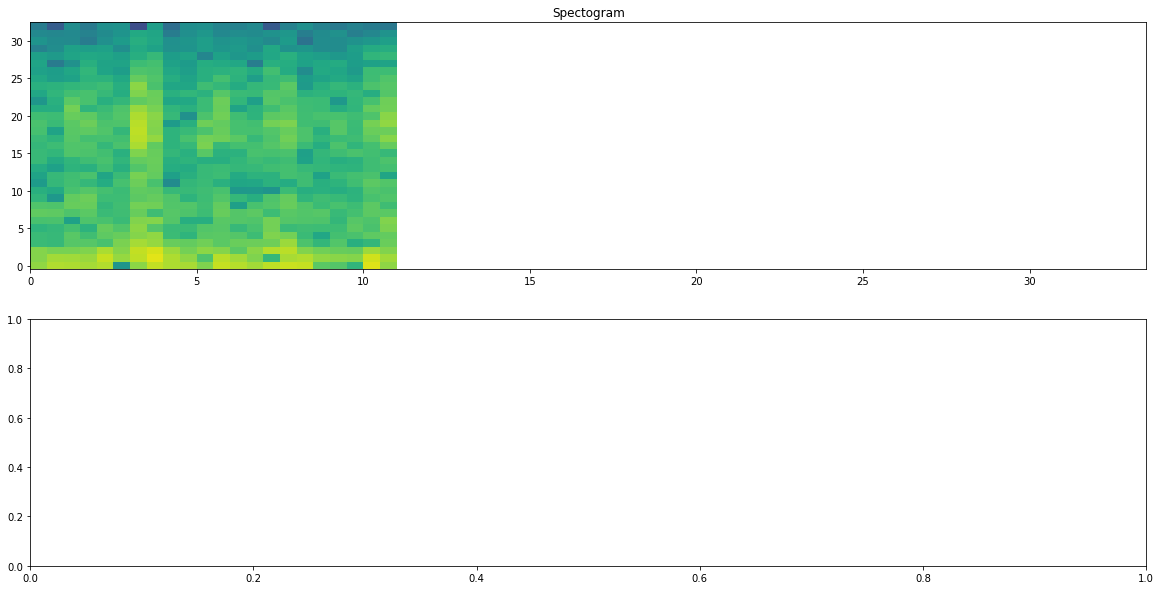

1
33 6955


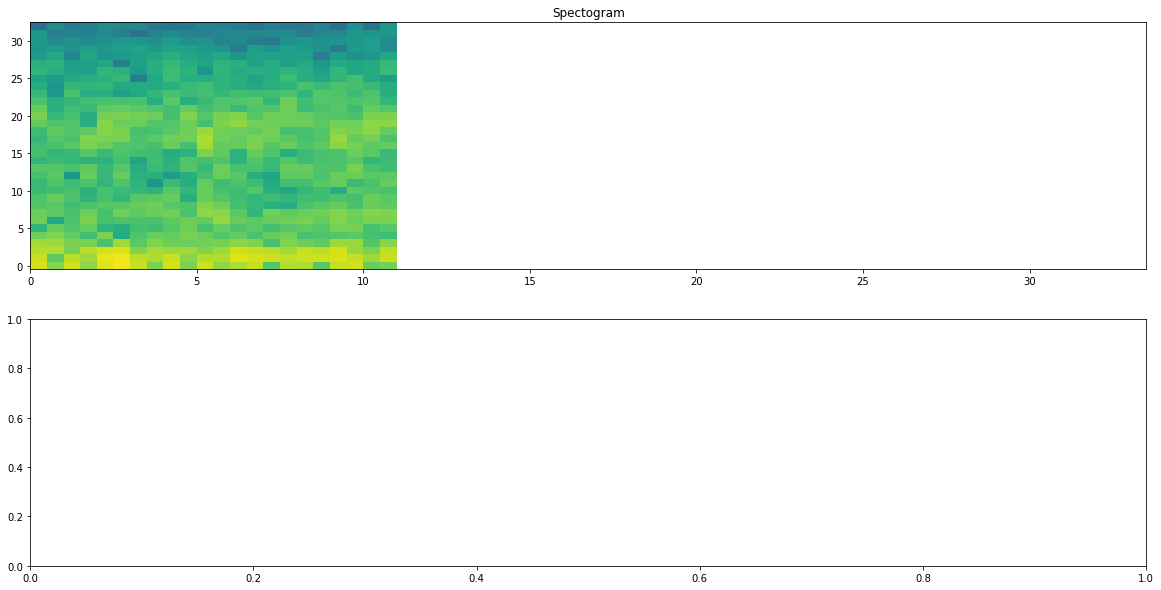

1
33 6955


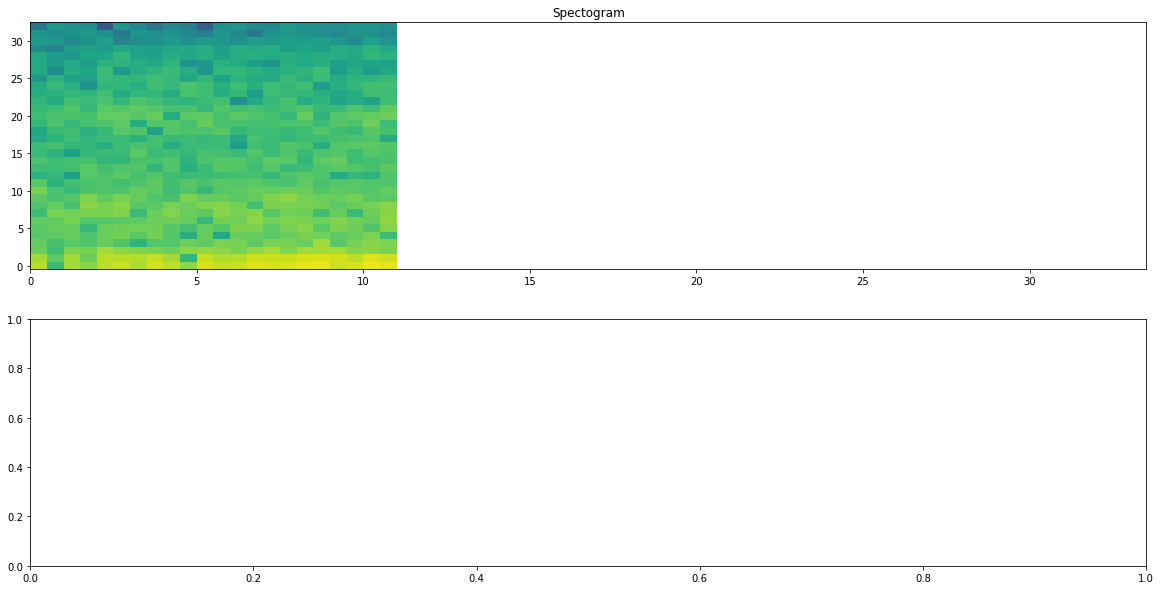

1
33 6955


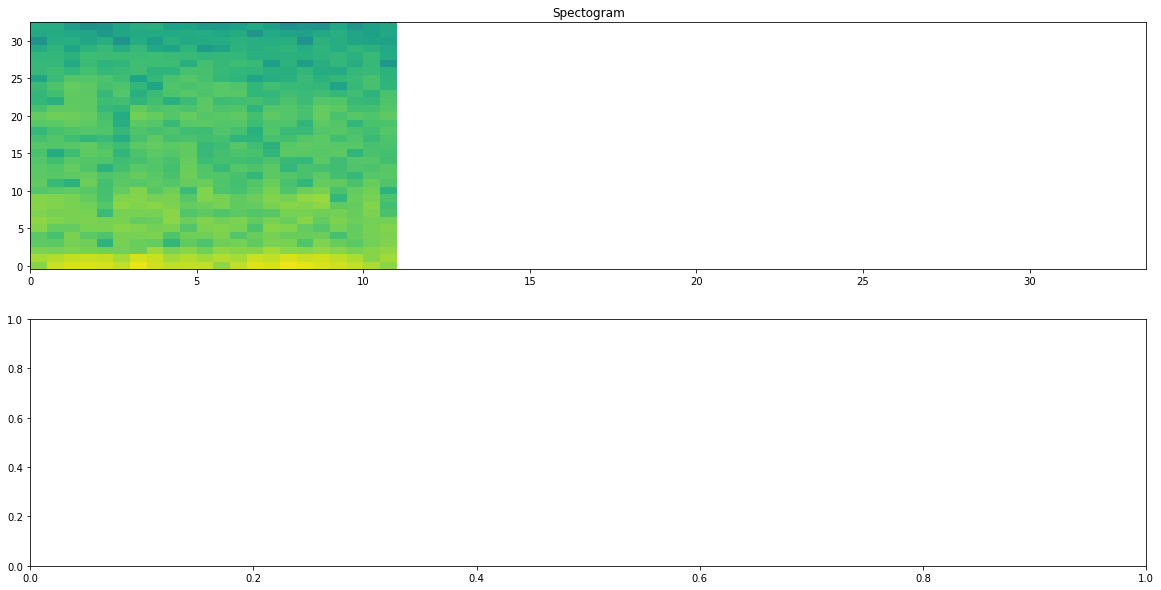

1
33 6955


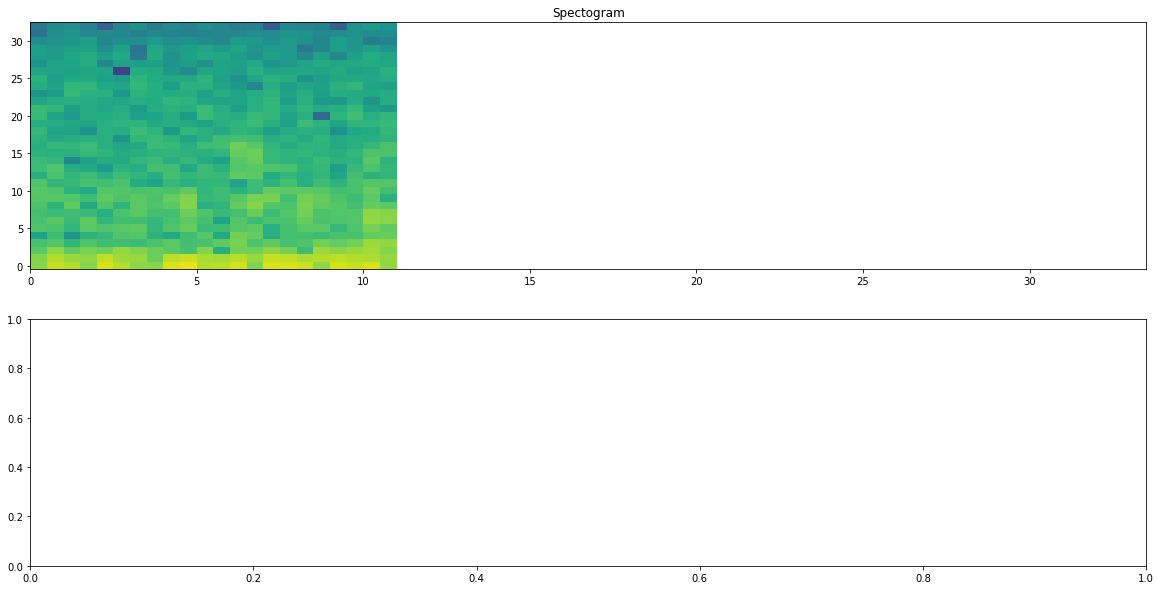

1
33 6955


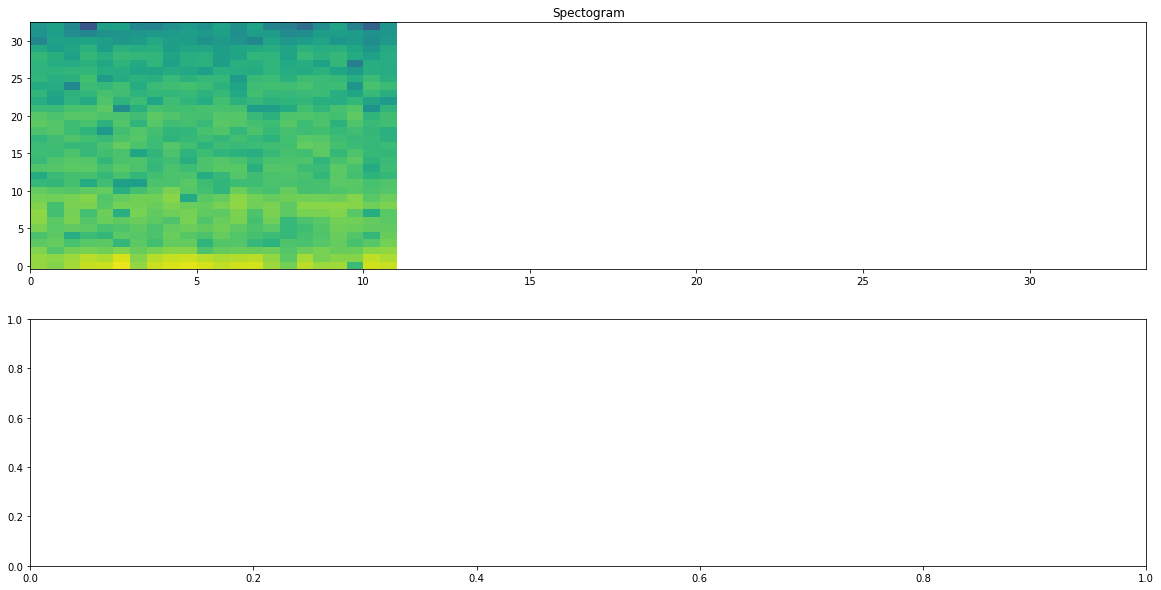

1
33 6955


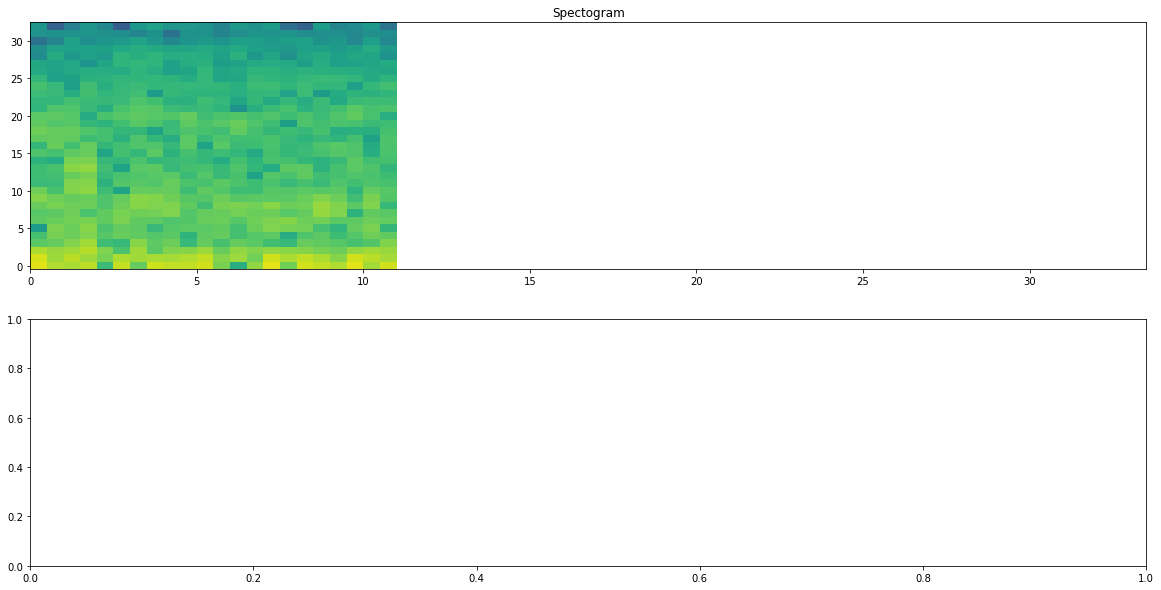

1
33 6955


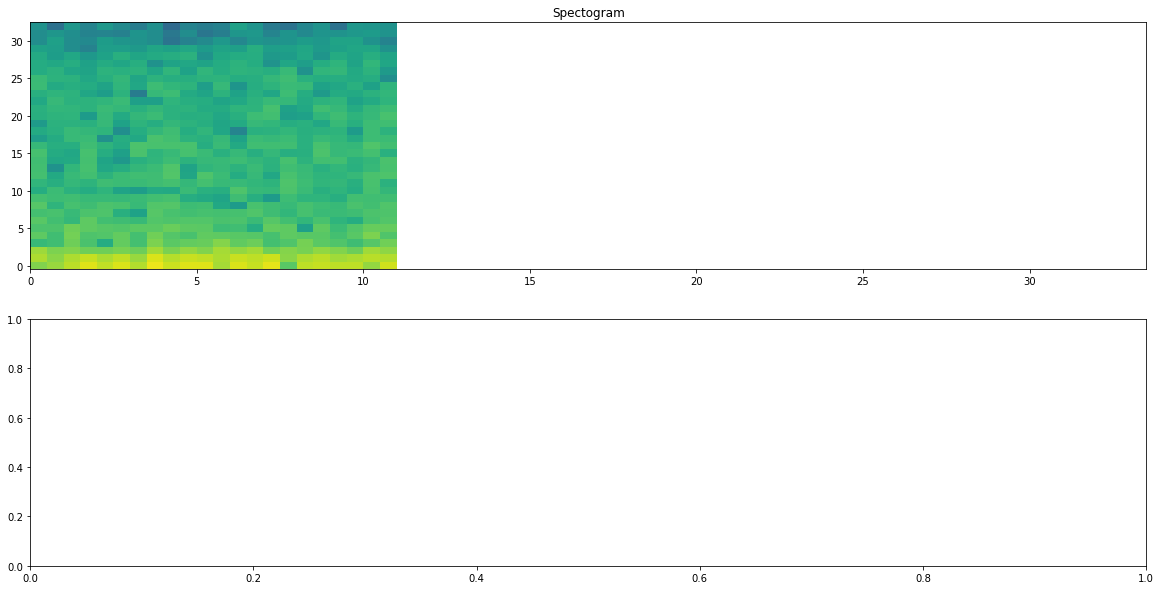

1
33 6955


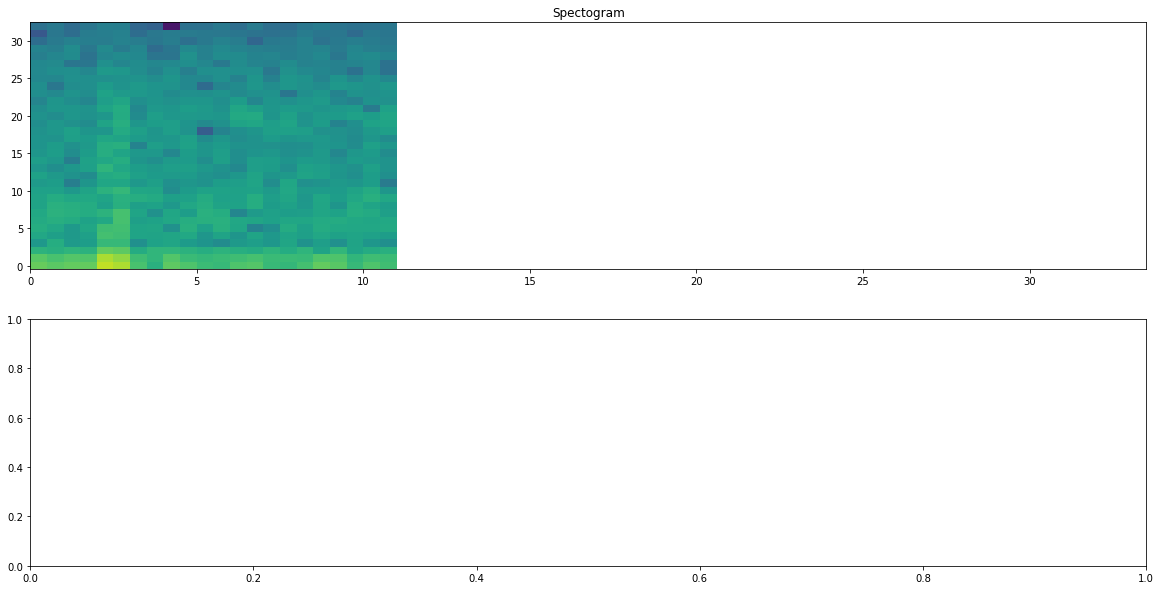

1
33 6955


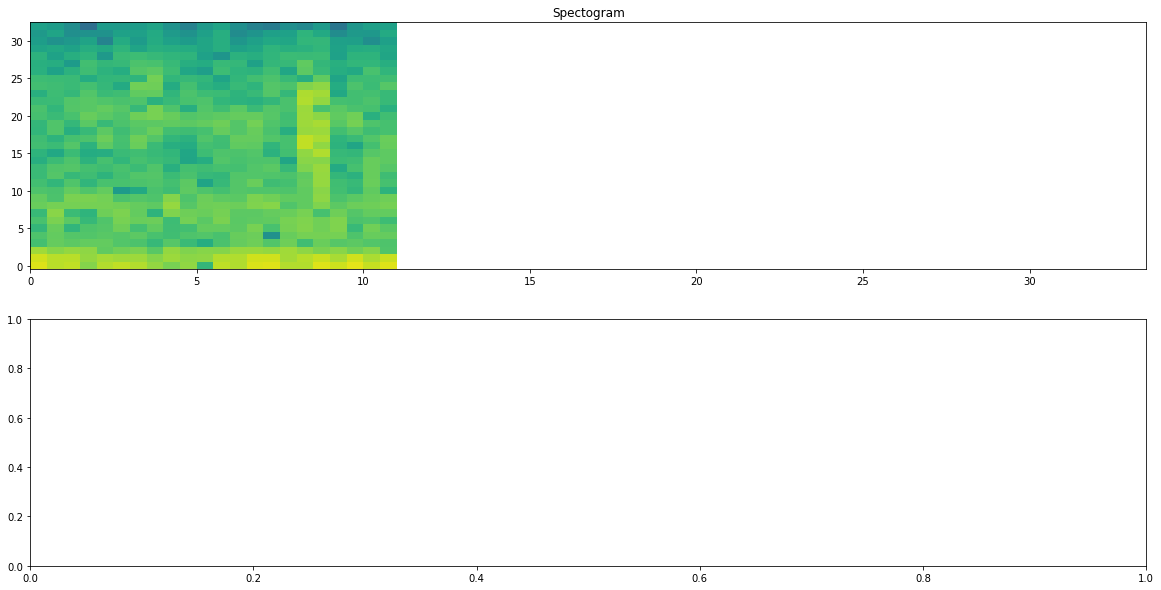

1
33 6955


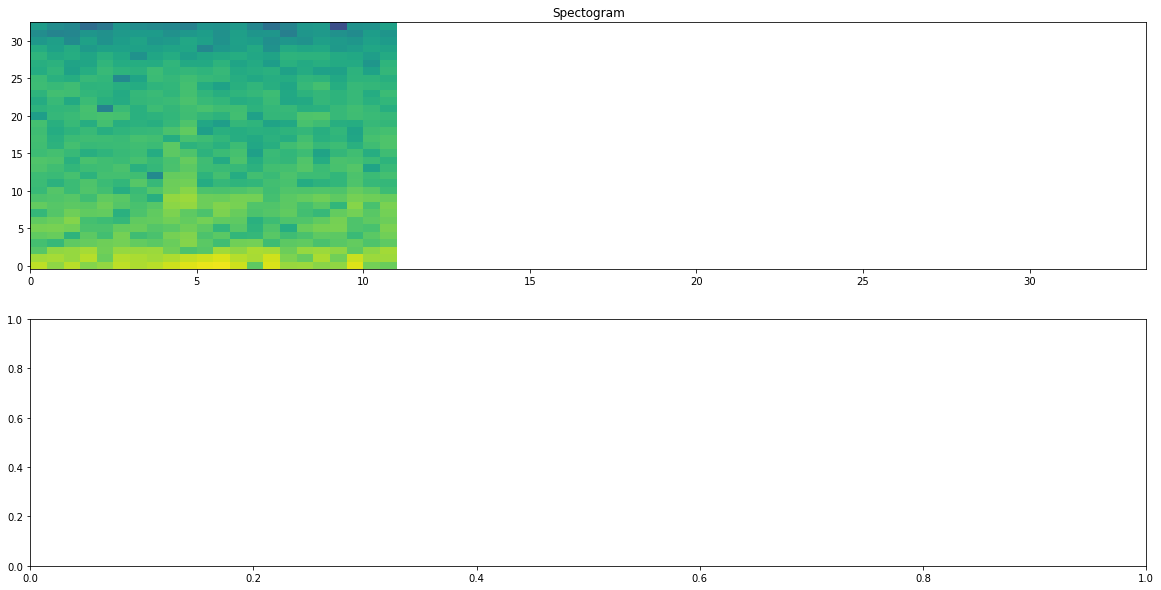

1
33 6955


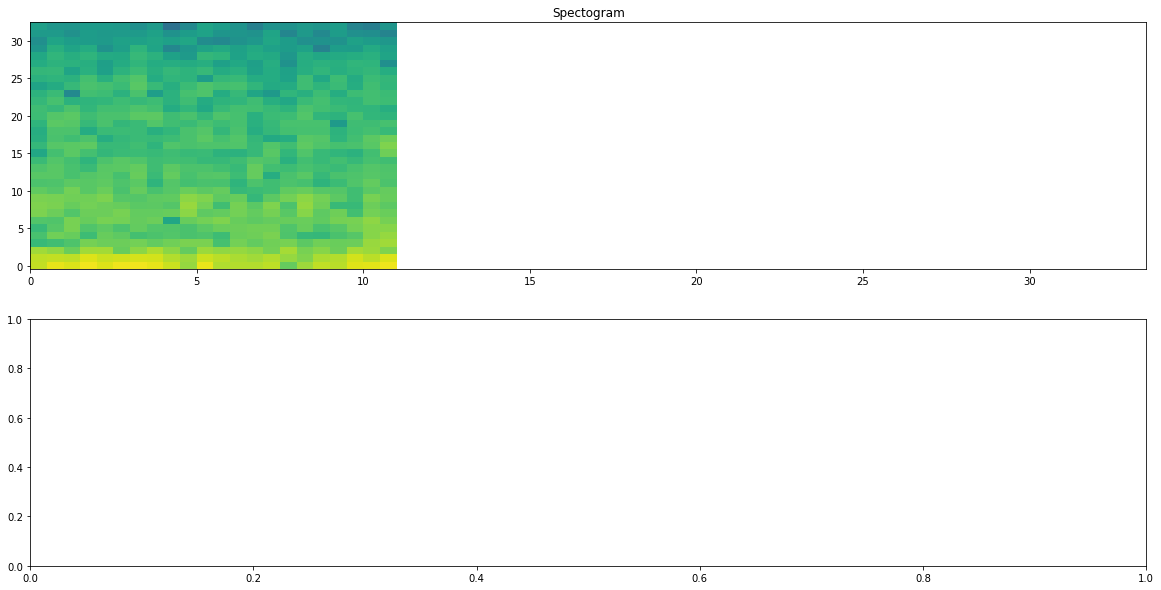

1
33 6955


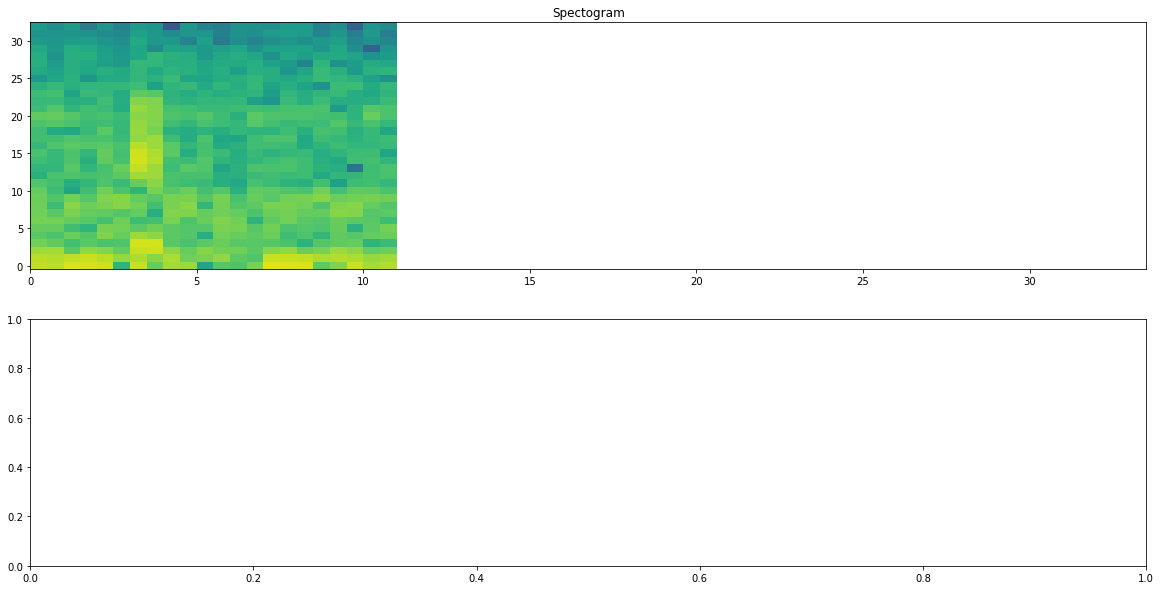

1
33 6955


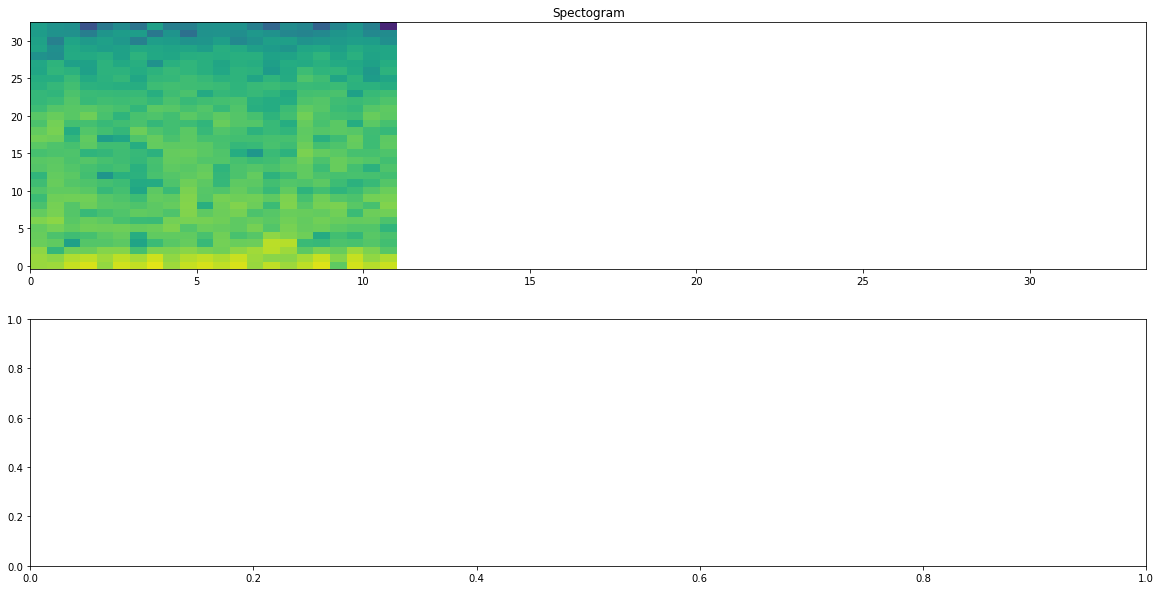

1
33 6955


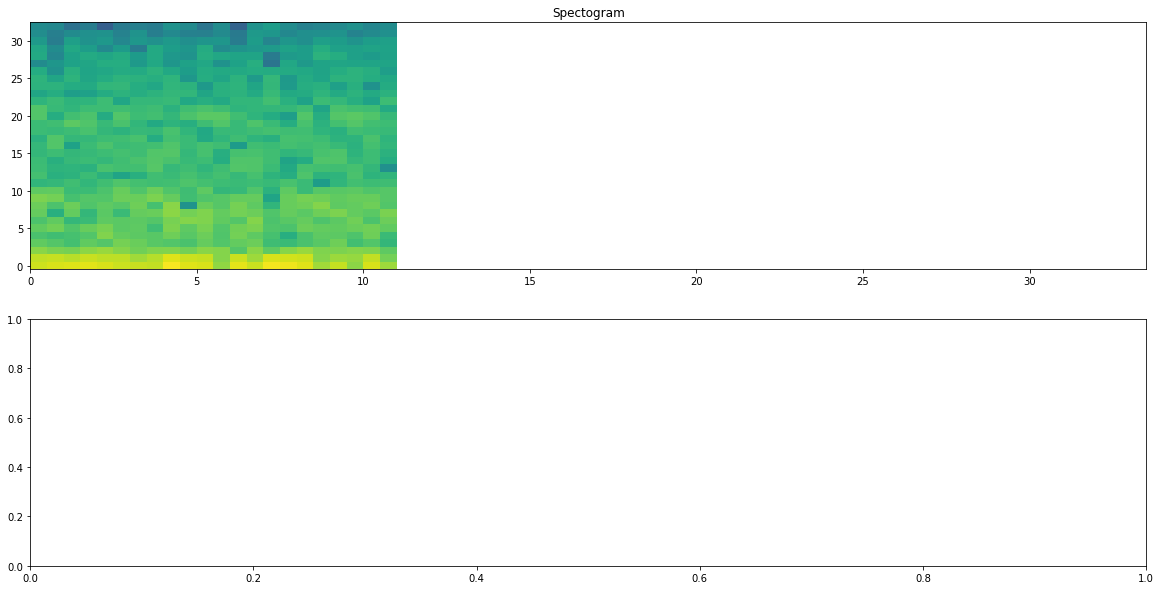

1
33 6955


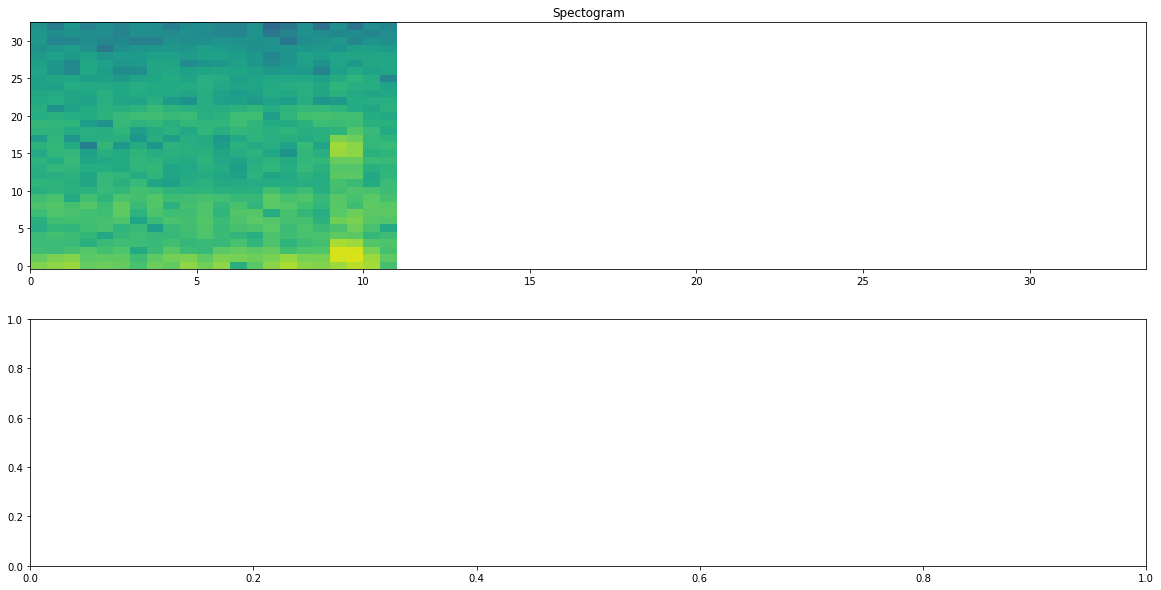

1
33 6955


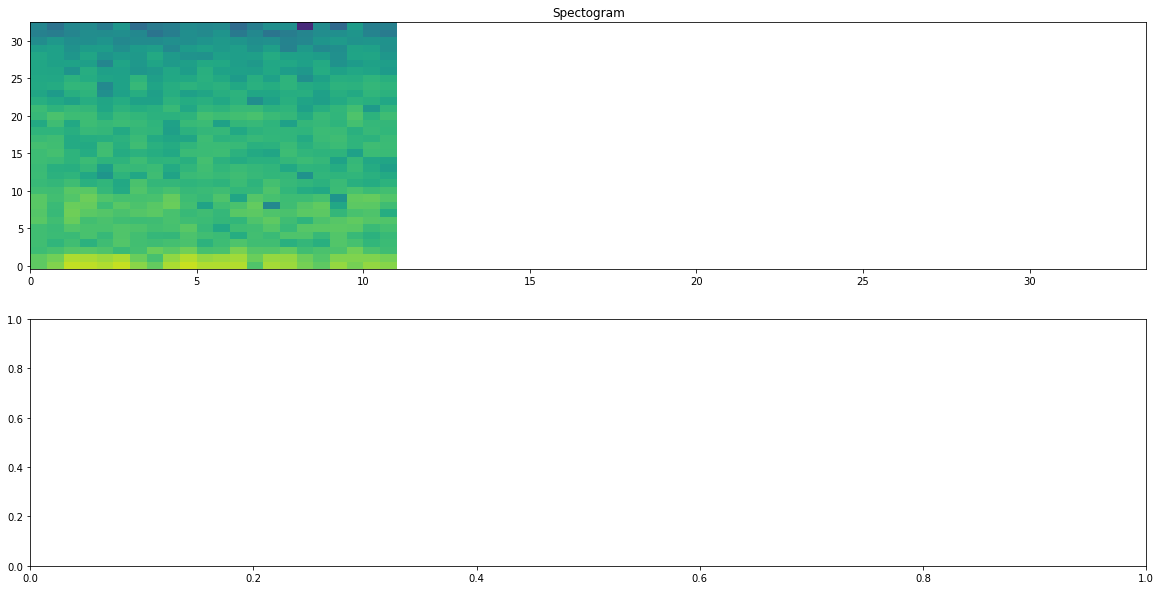

1
33 6955


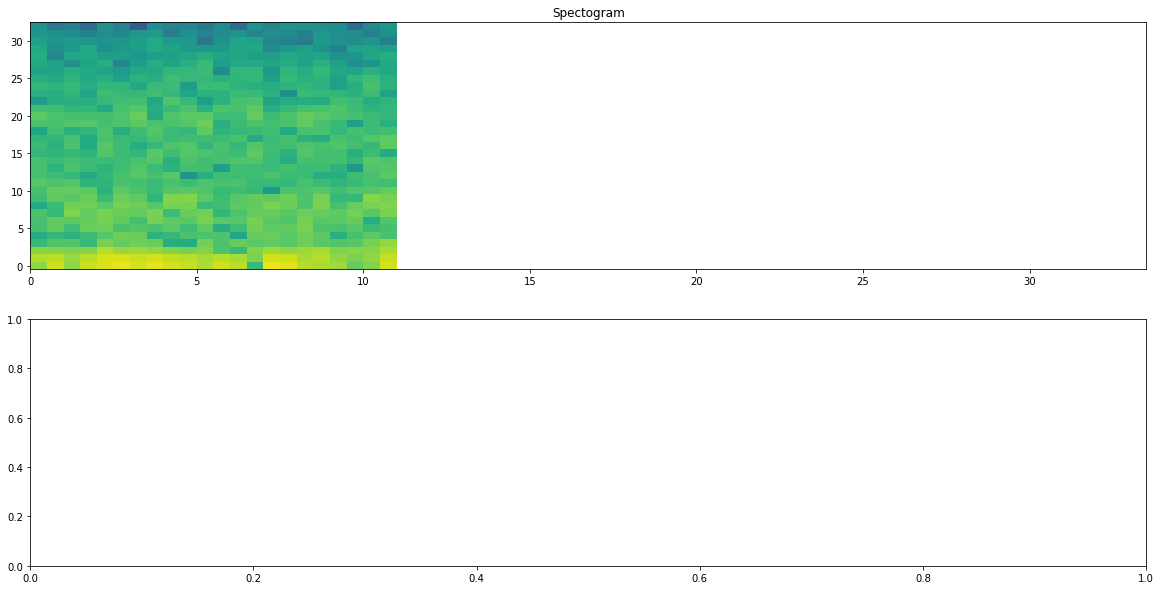

1
33 6955


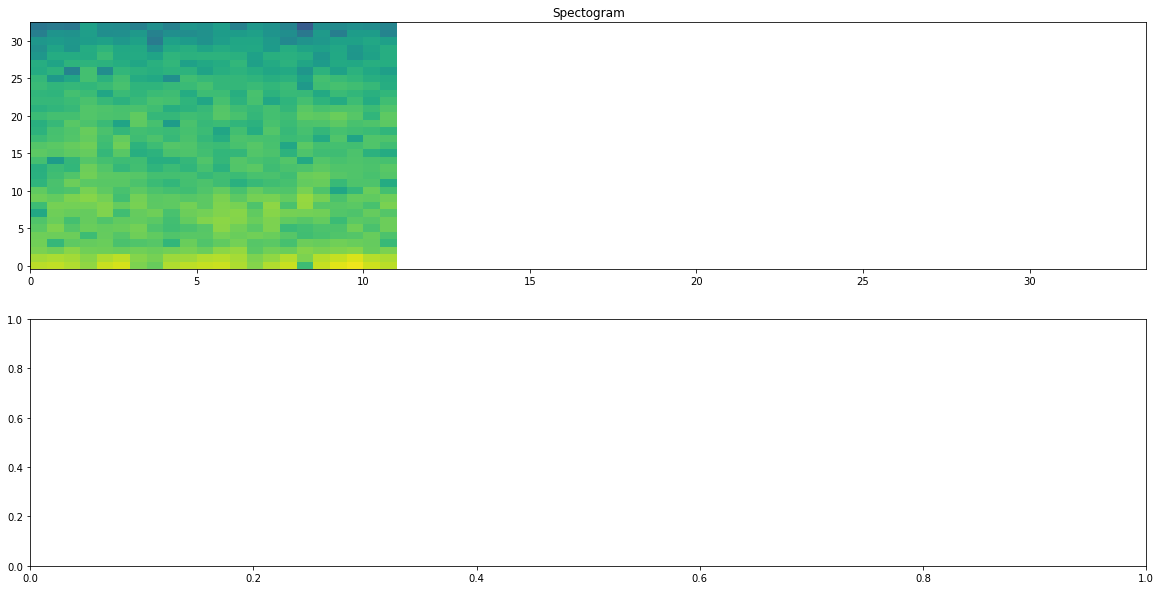

1
33 6955


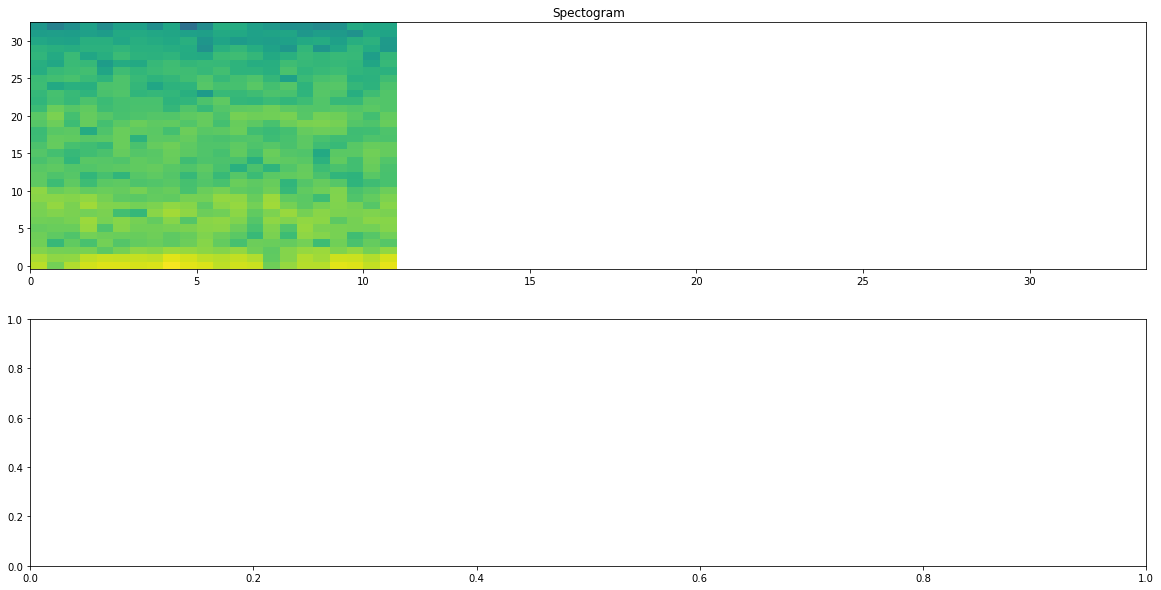

1
33 6955


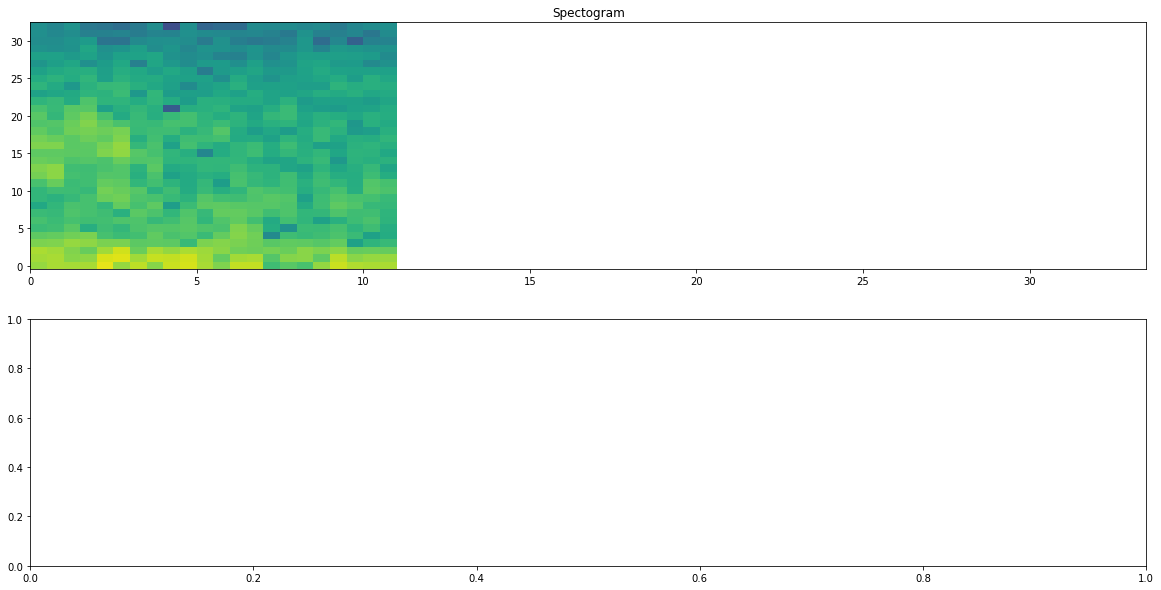

1
33 6955


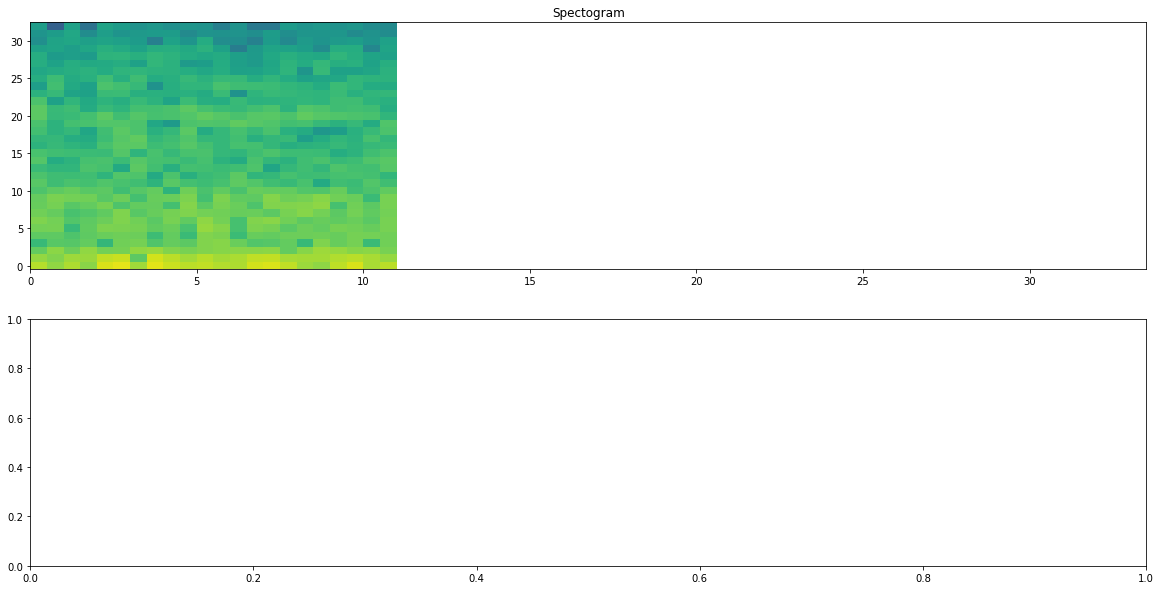

1
33 6955


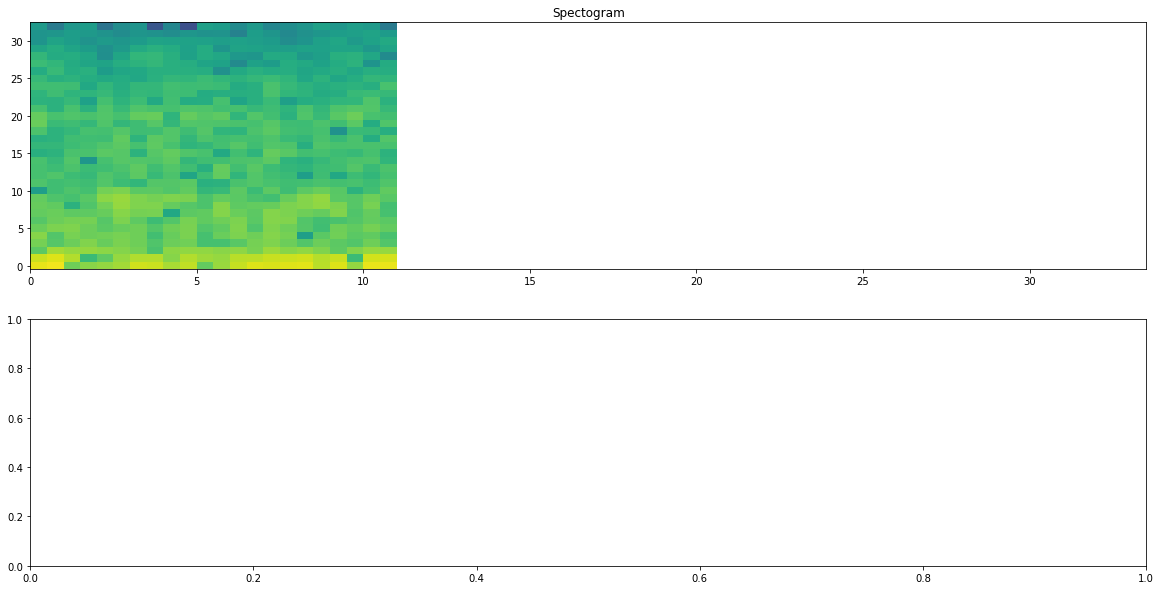

1
33 6955


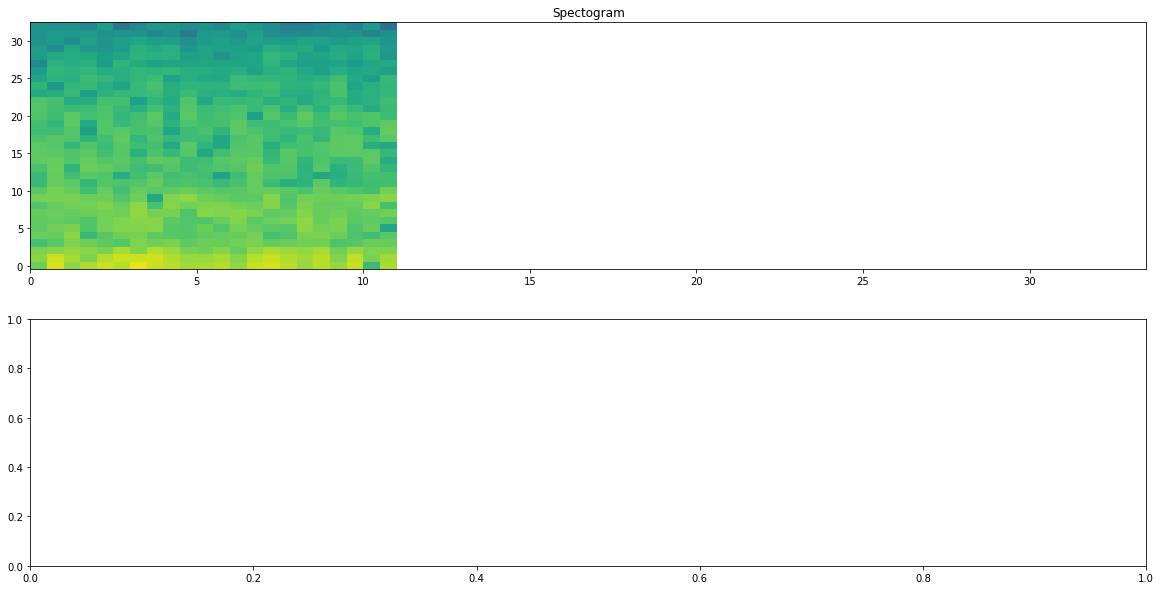

1
33 6955


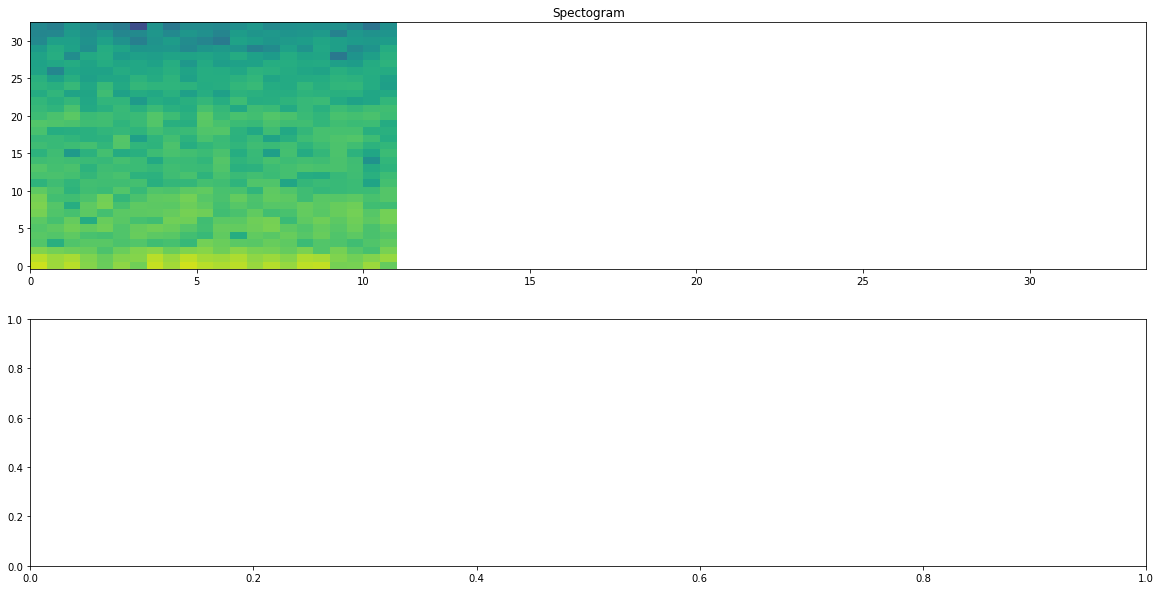

1
33 6955


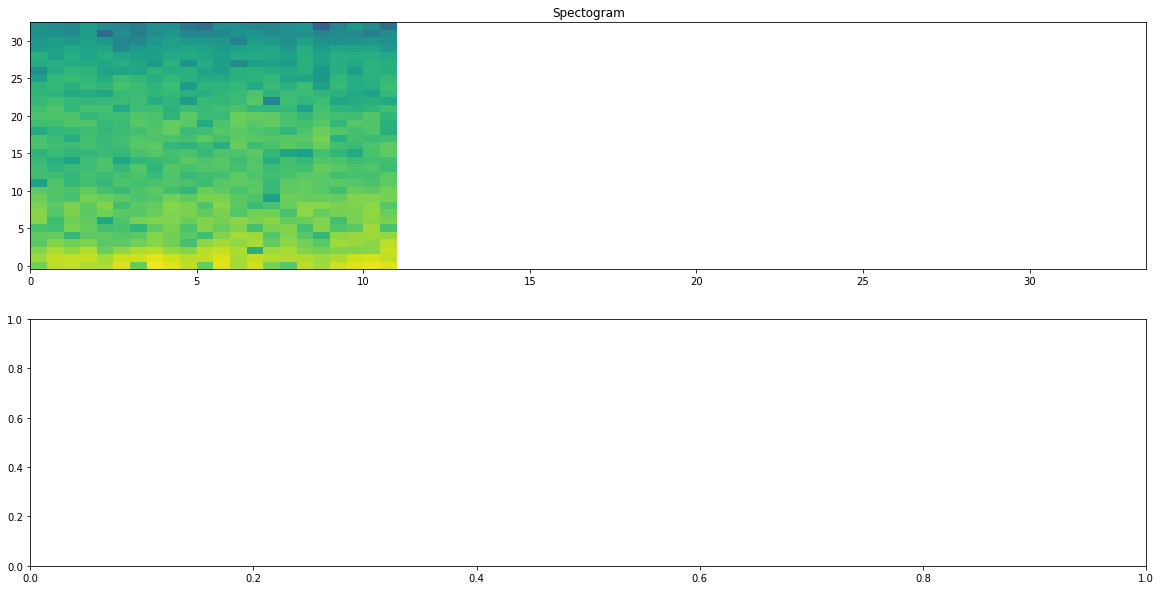

1
33 6955


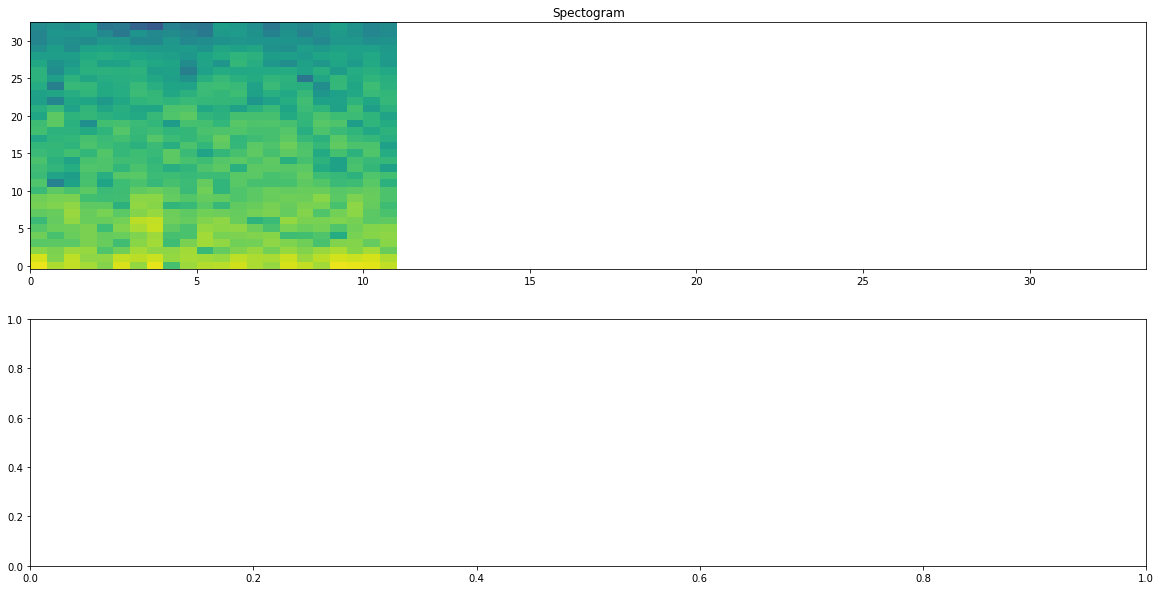

1
33 6955


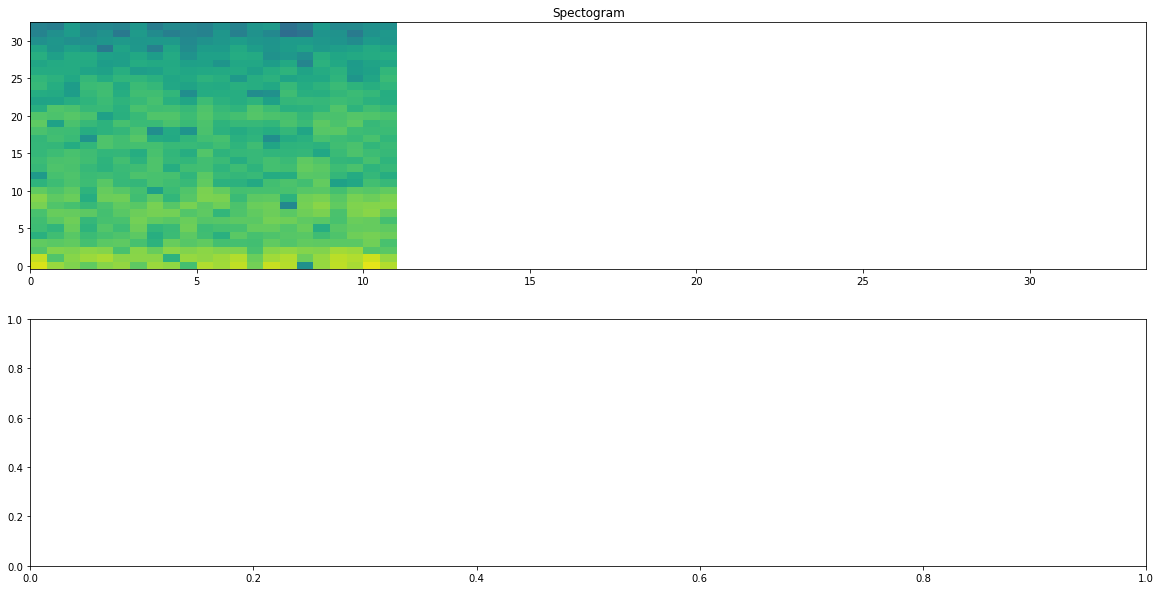

1
33 6955


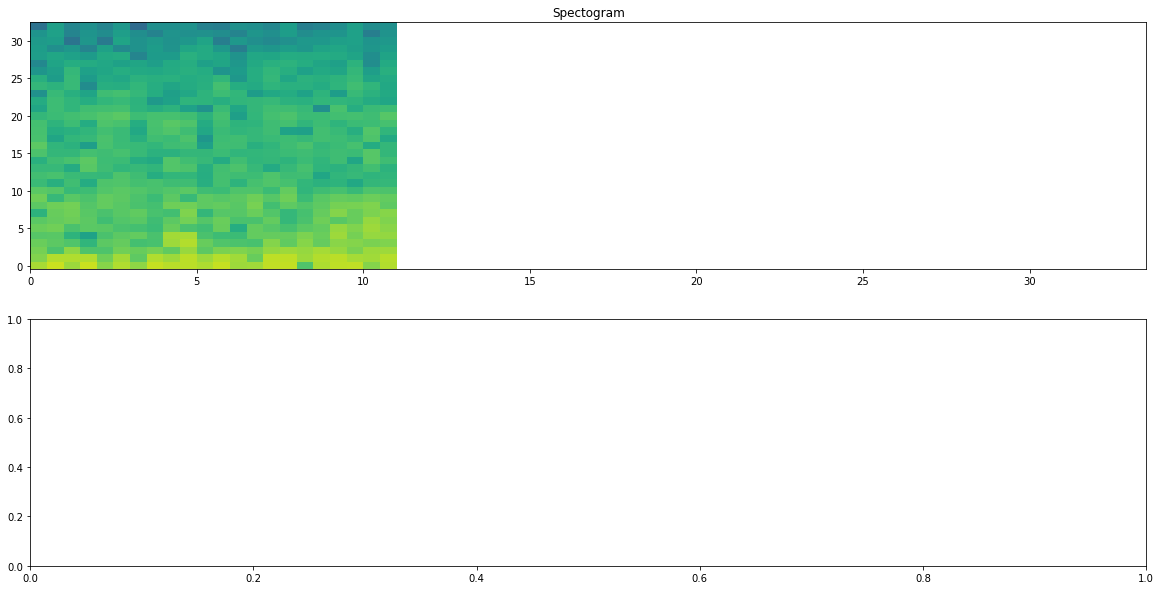

1
33 6955


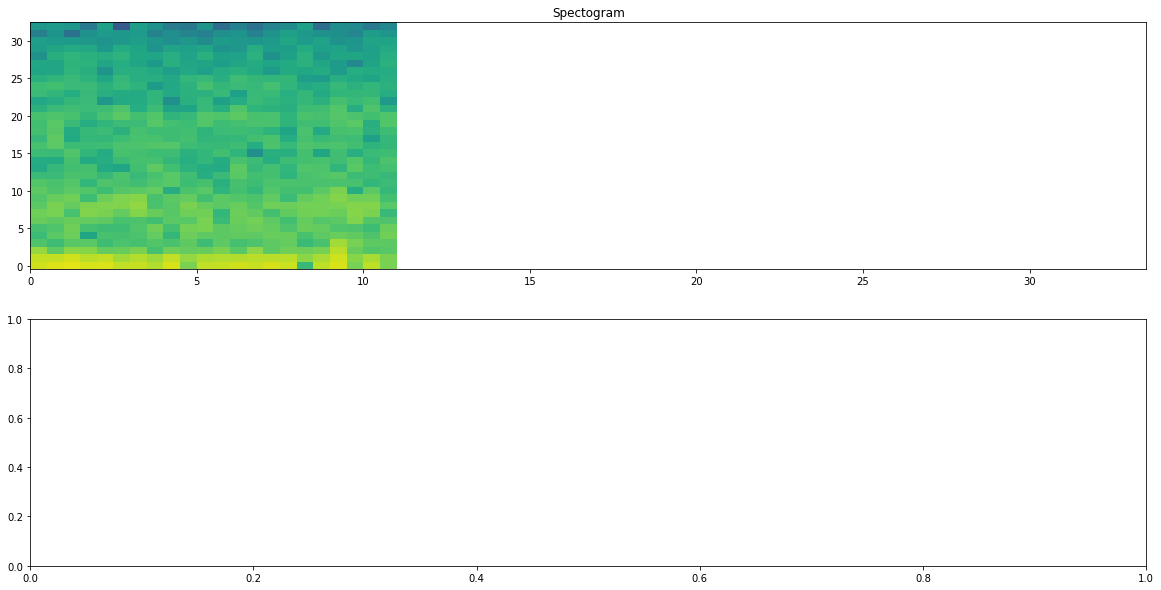

1
33 6955


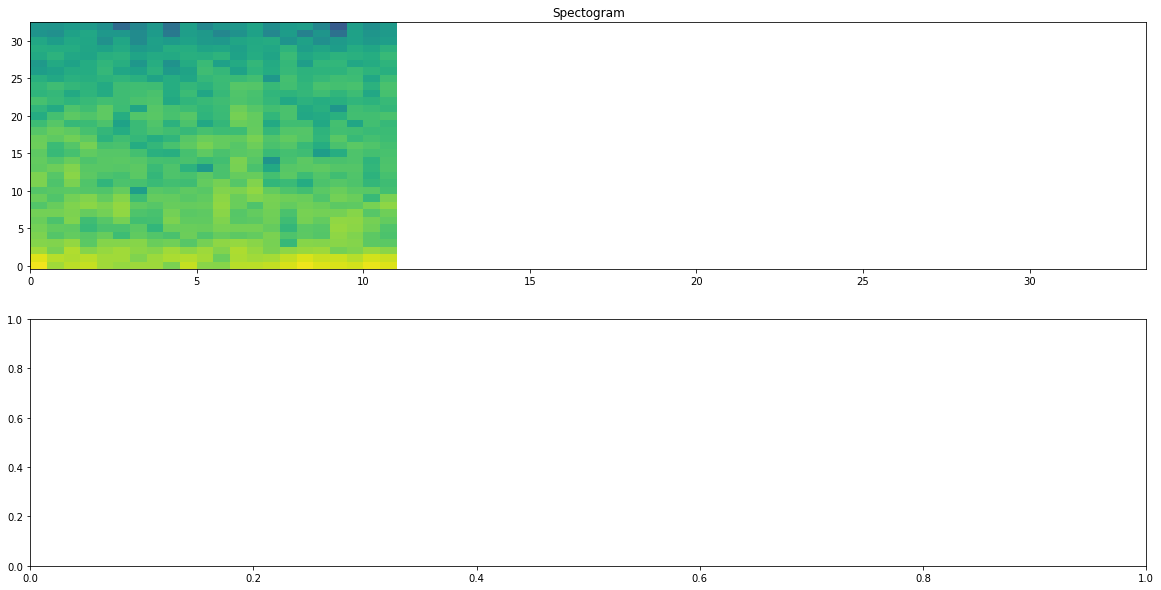

1
33 6955


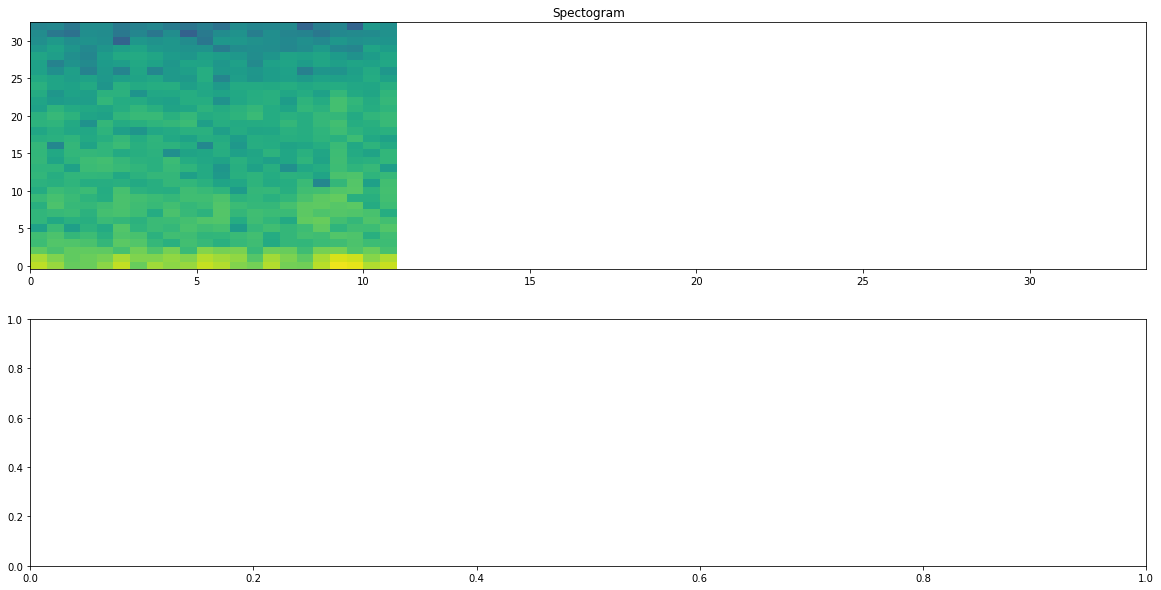

1
33 6955


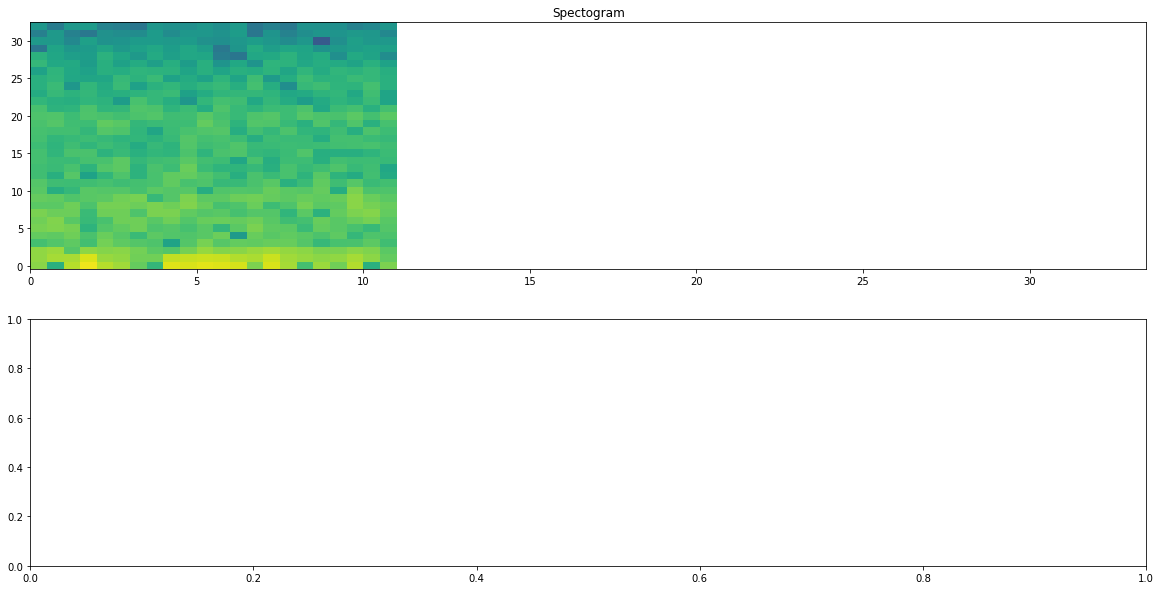

1
33 6955


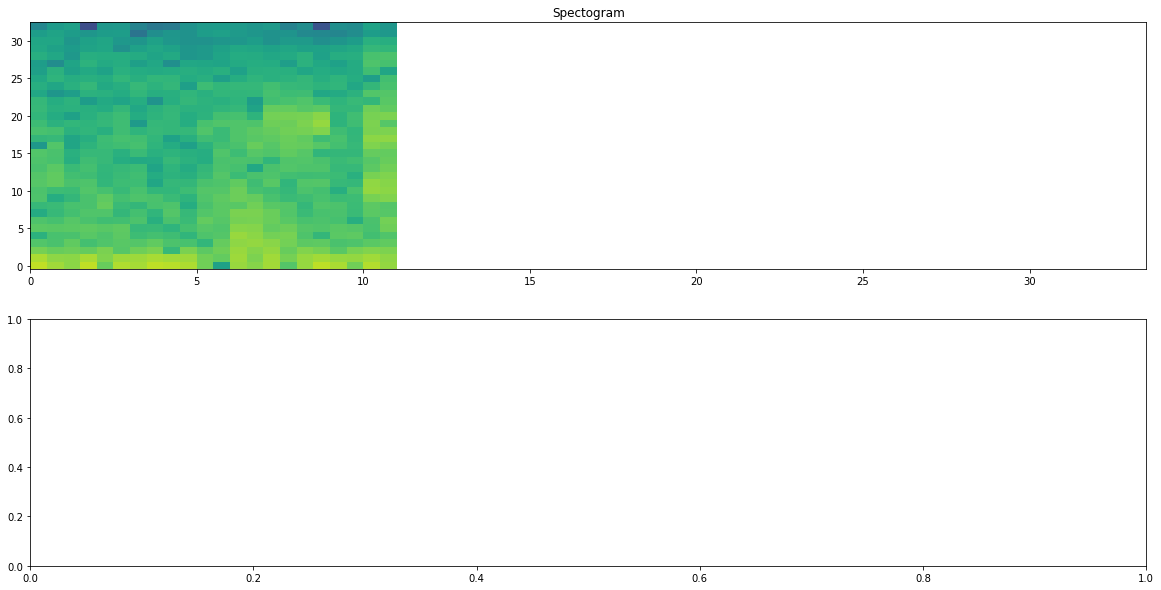

1
33 6955


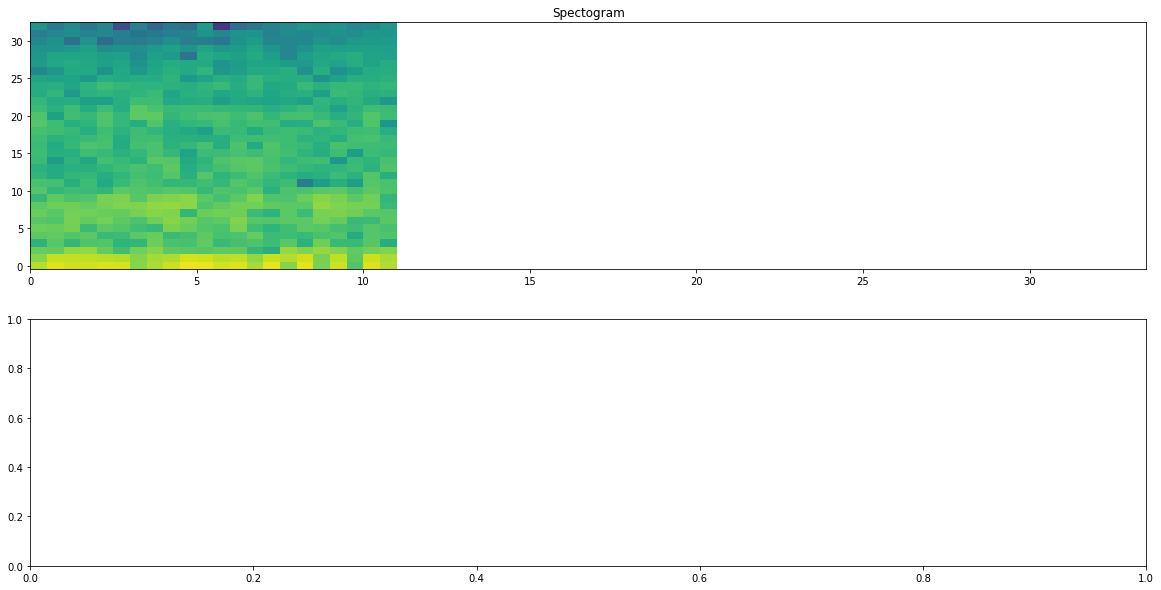

1
33 6955


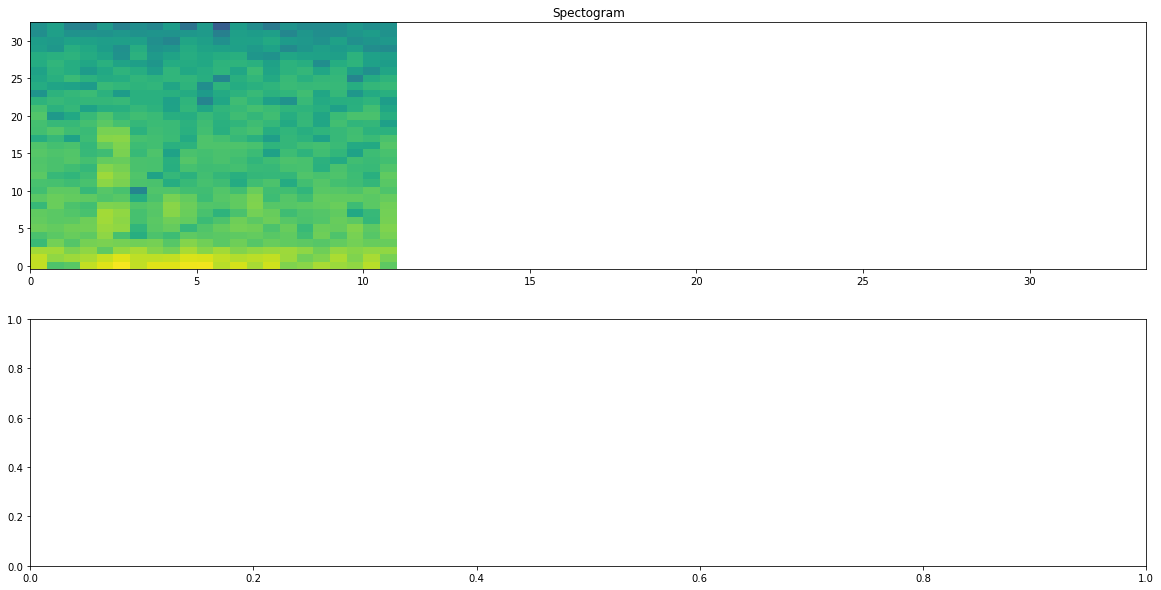

1
33 6955


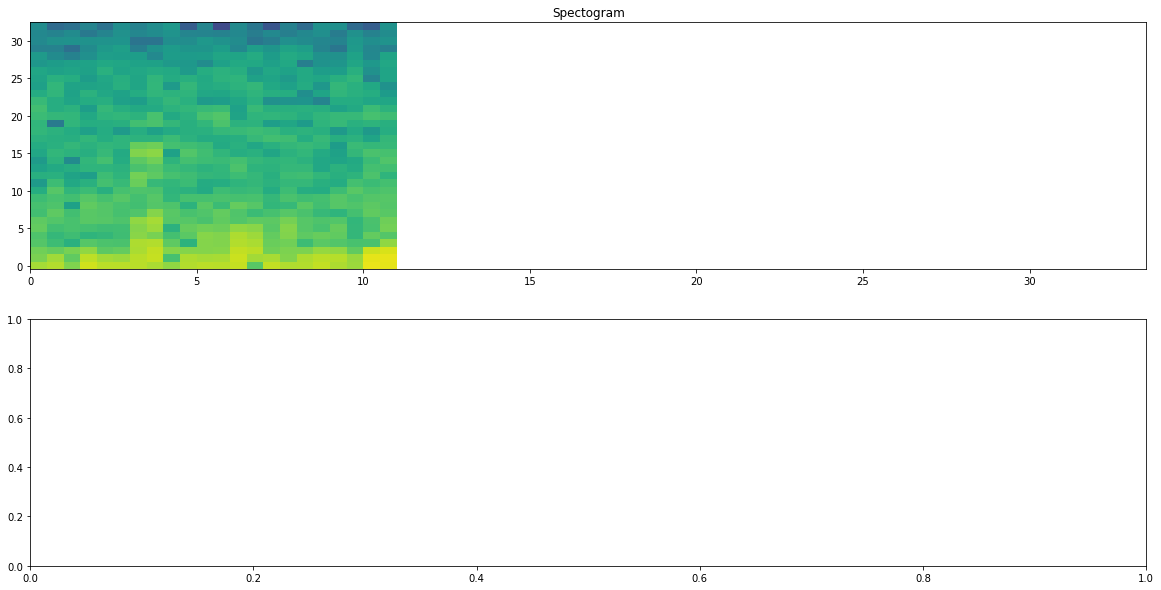

1
33 6955


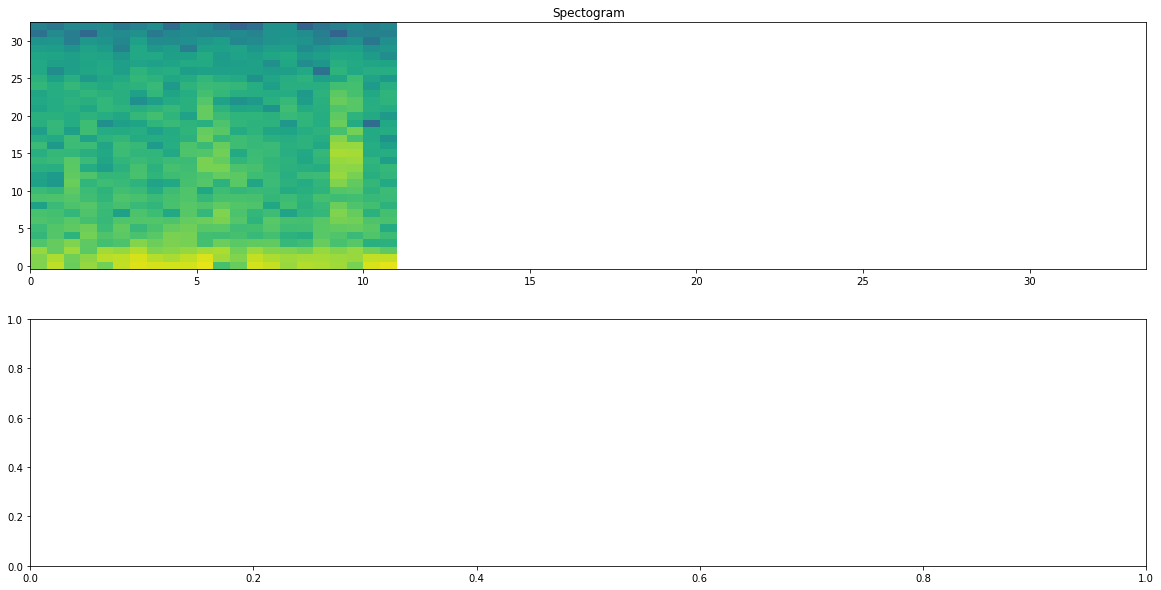

1
33 6955


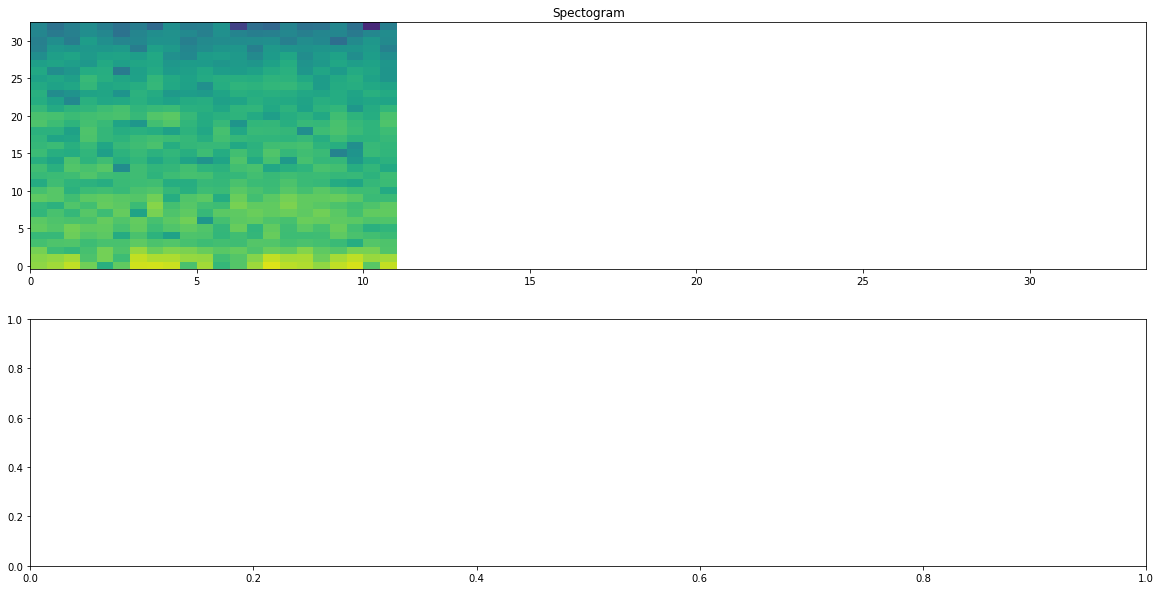

1
33 6955


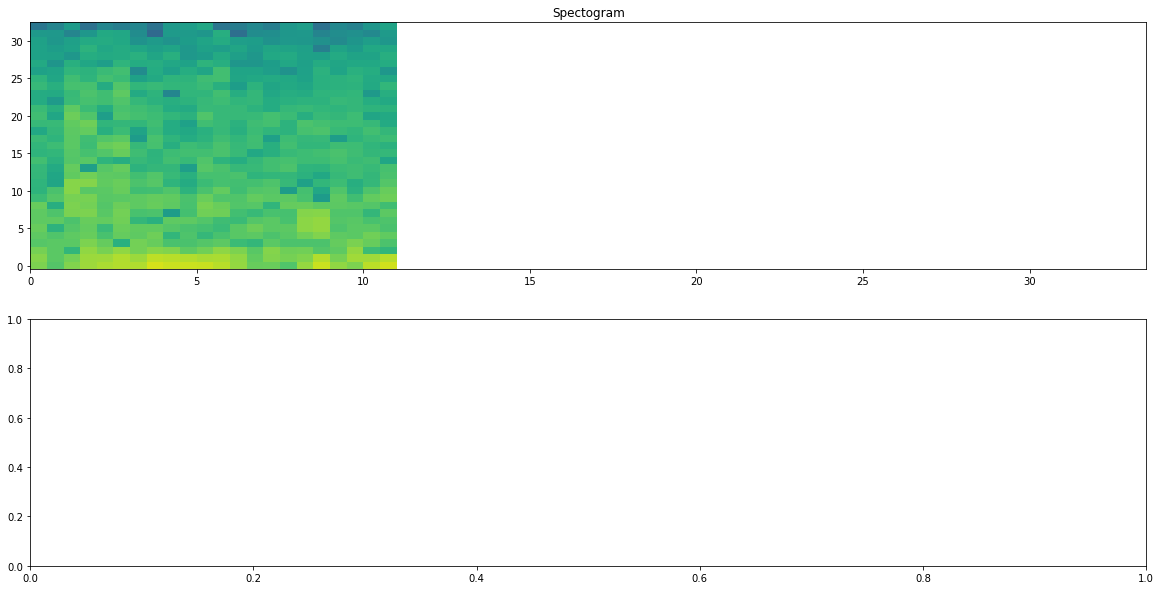

1
33 6955


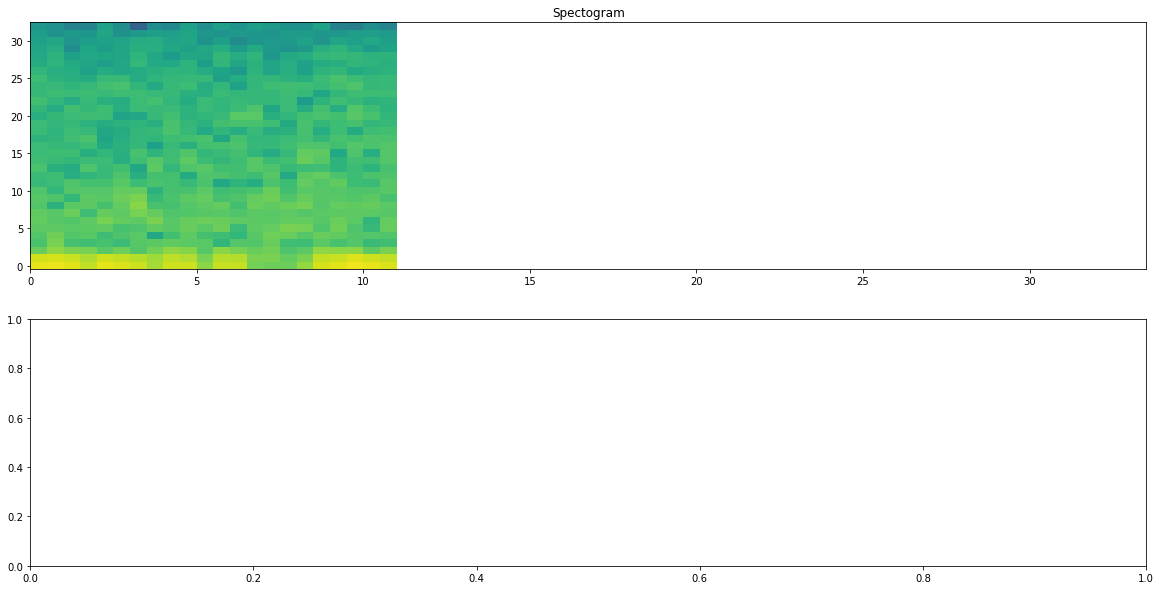

1
33 6955


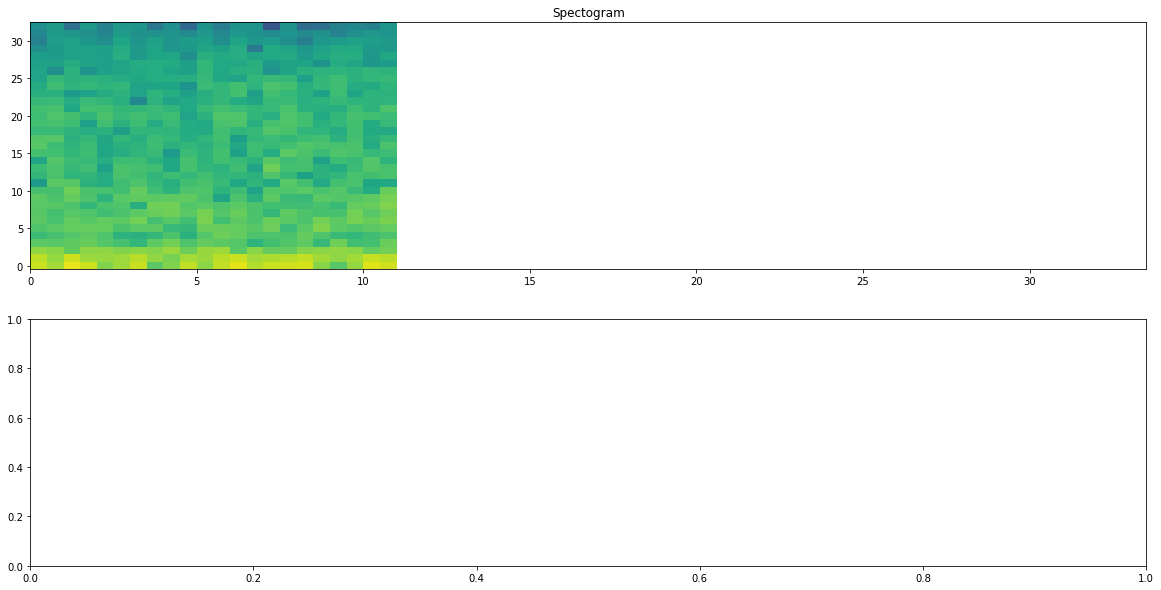

1
33 6955


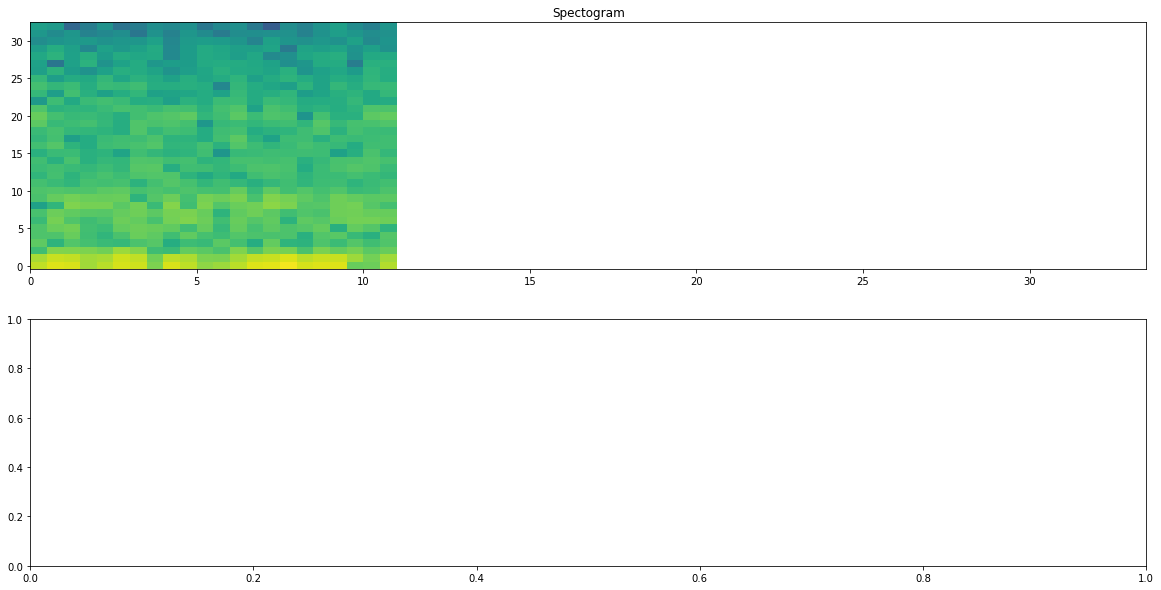

1
33 6955


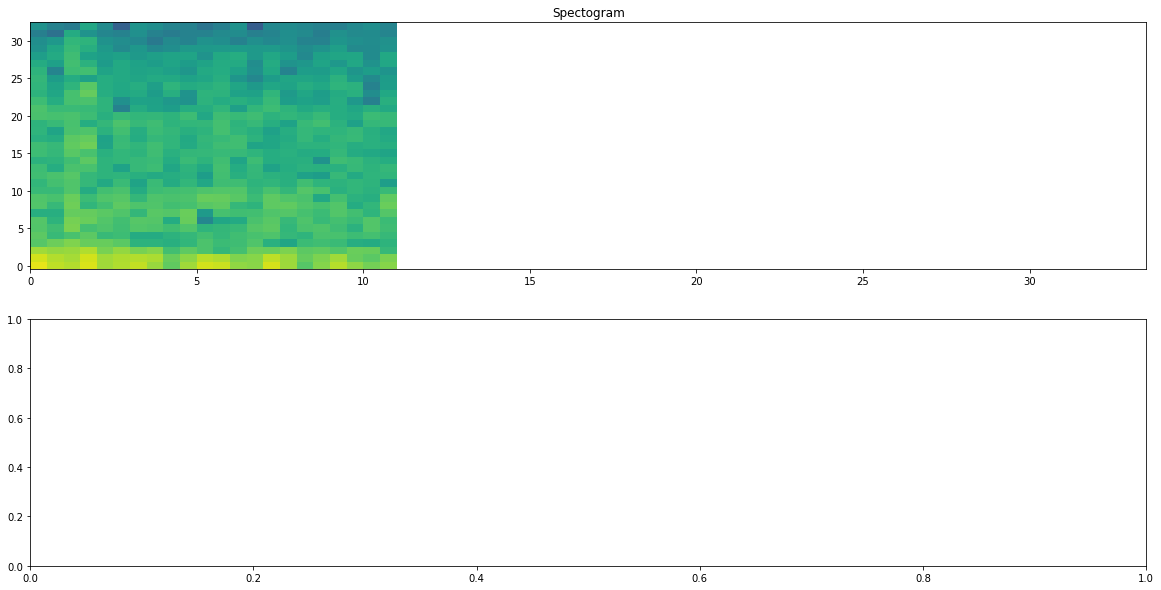

1
33 6955


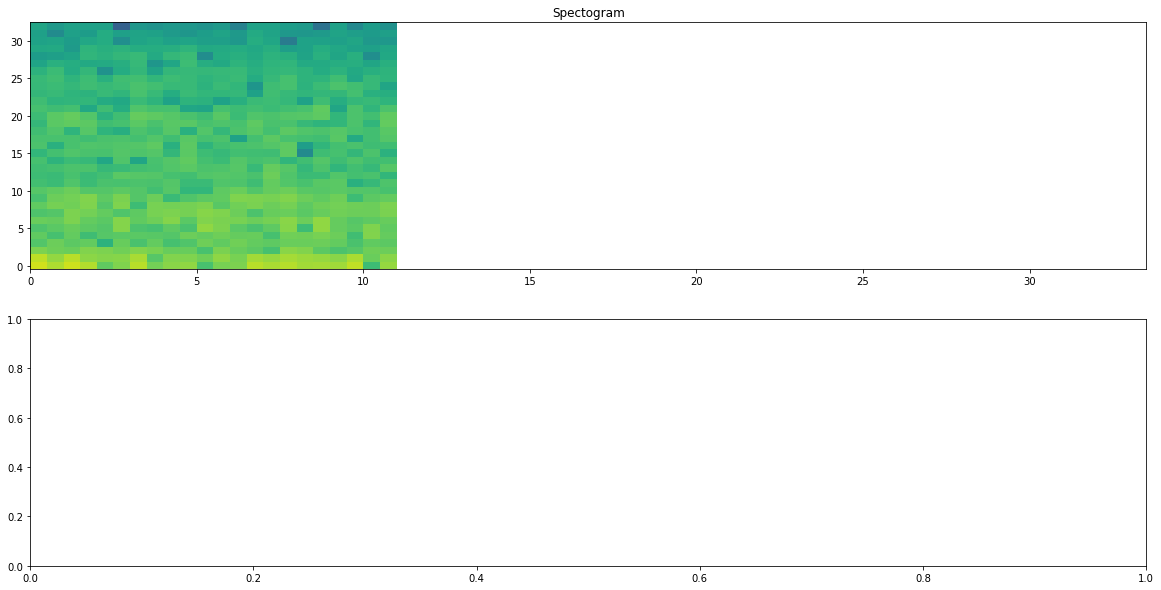

1
33 6955


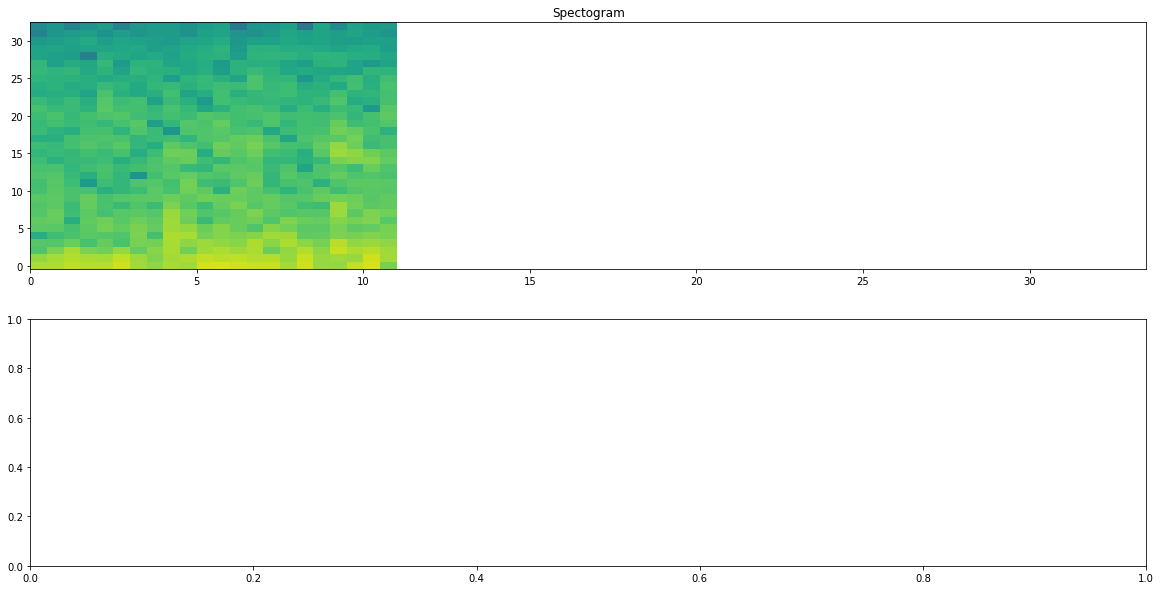

1
33 6955


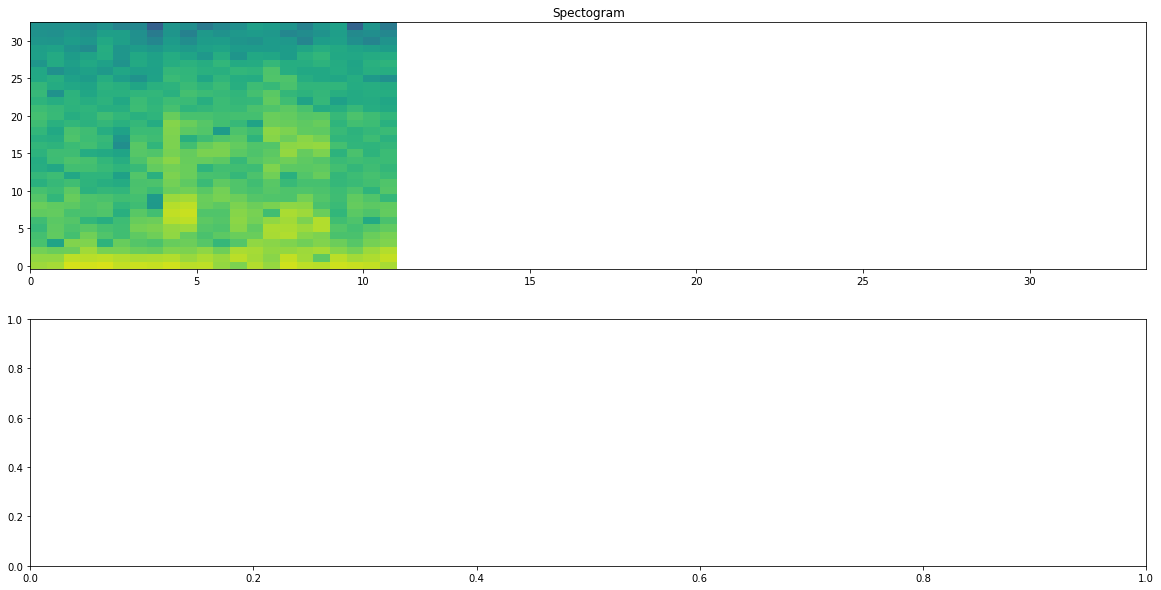

1
33 6955


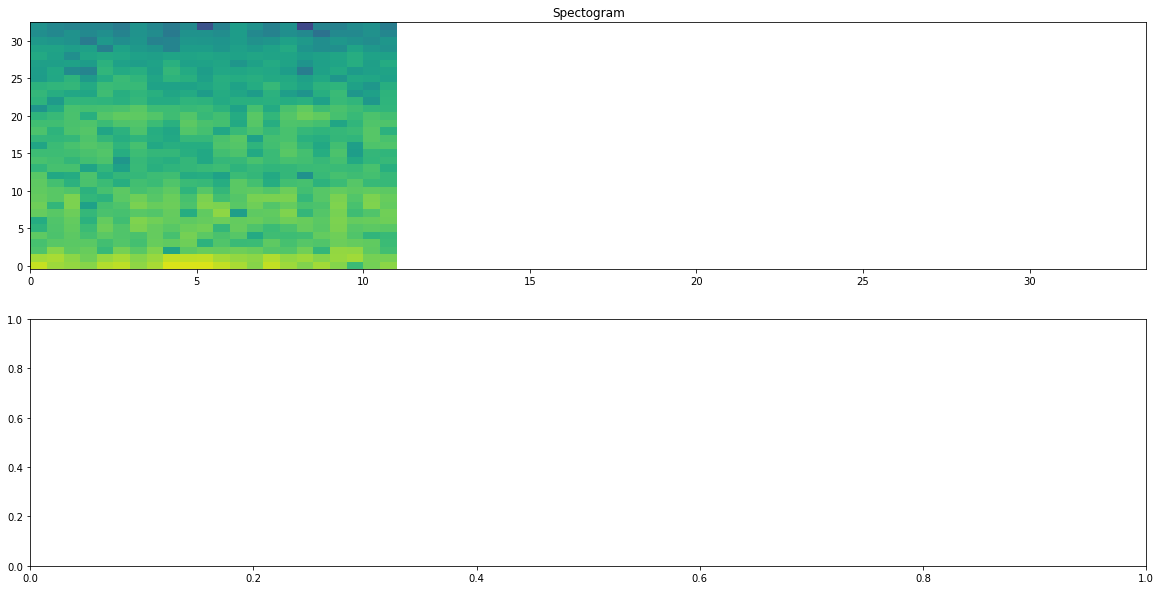

1
33 6955


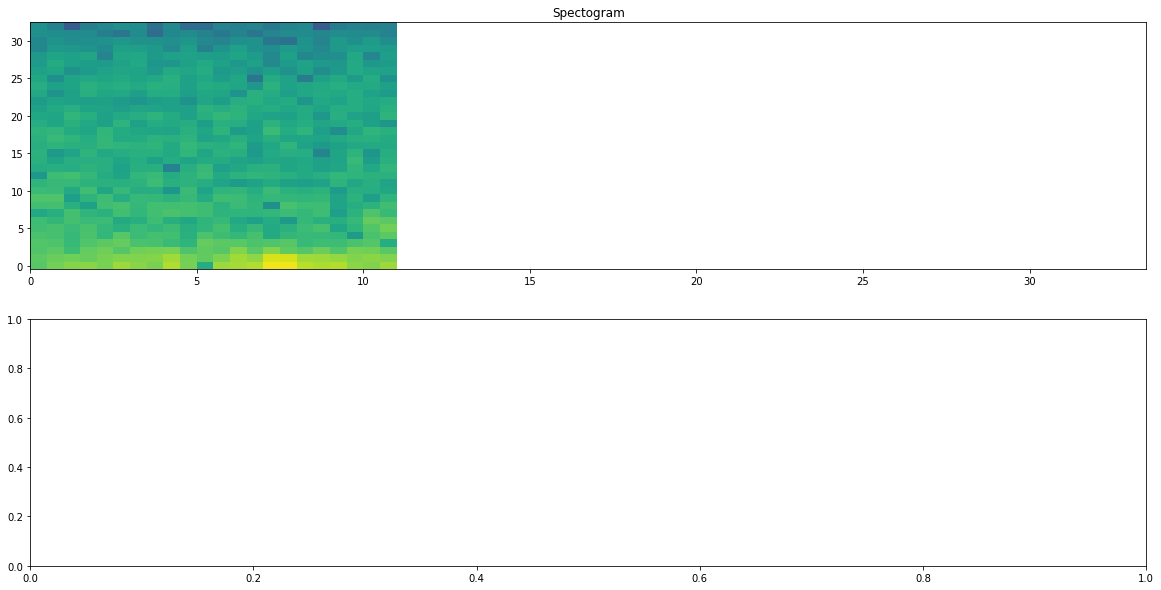

1
33 6955


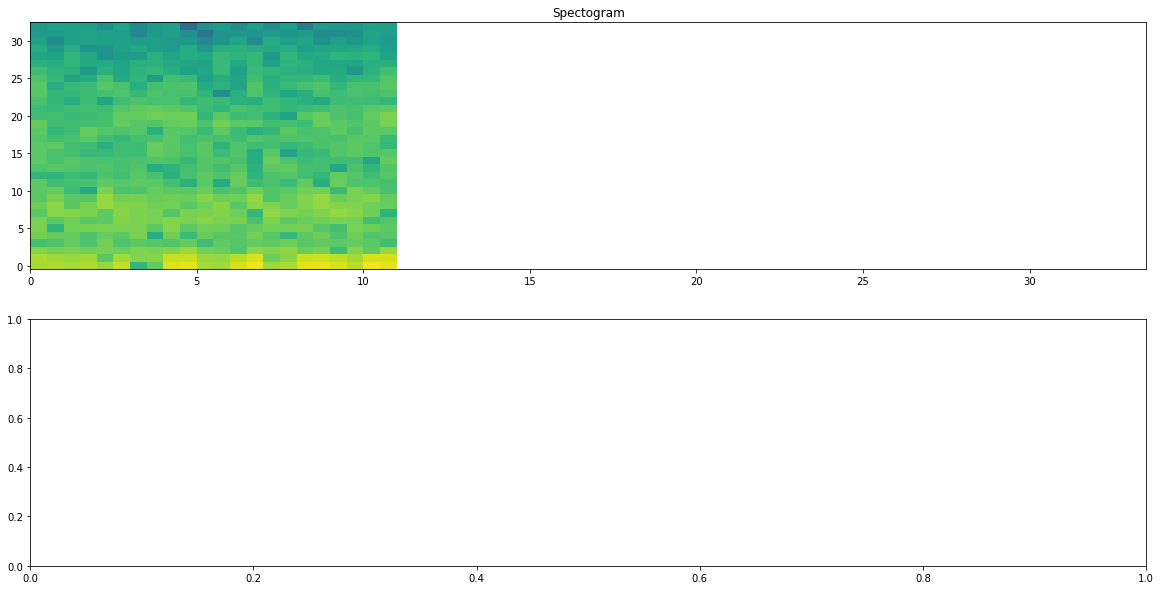

1
33 6955


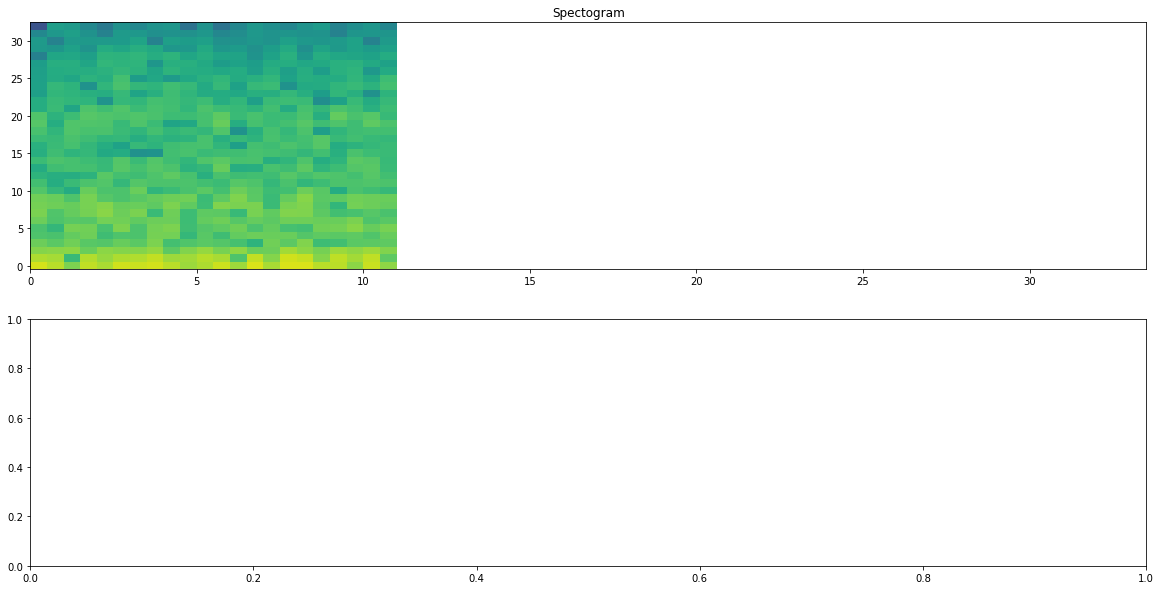

1
33 6955


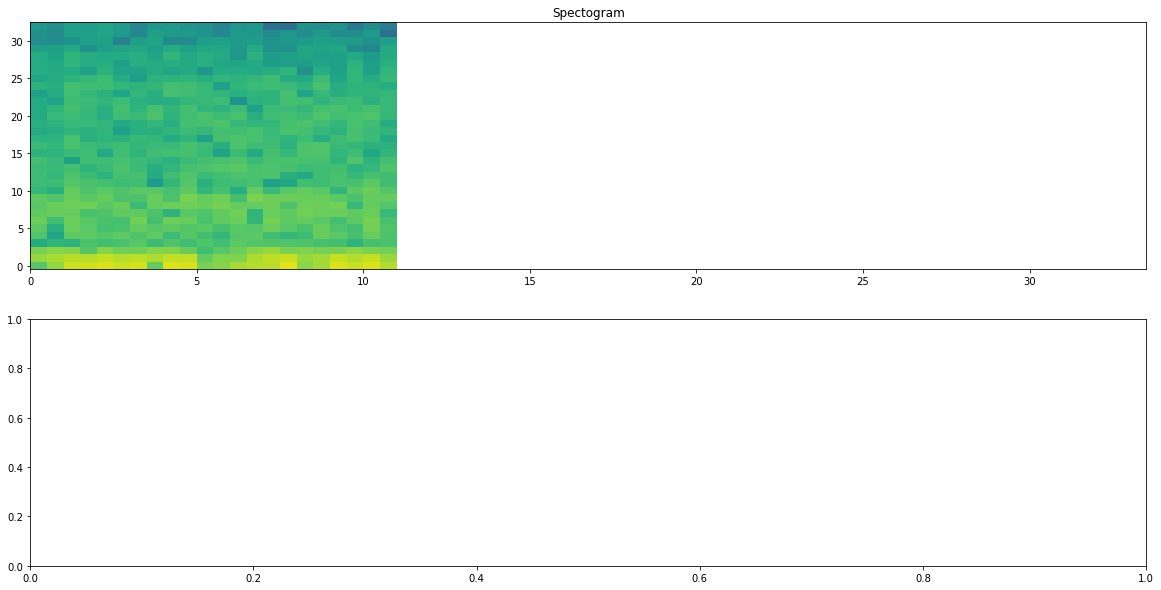

1
33 6955


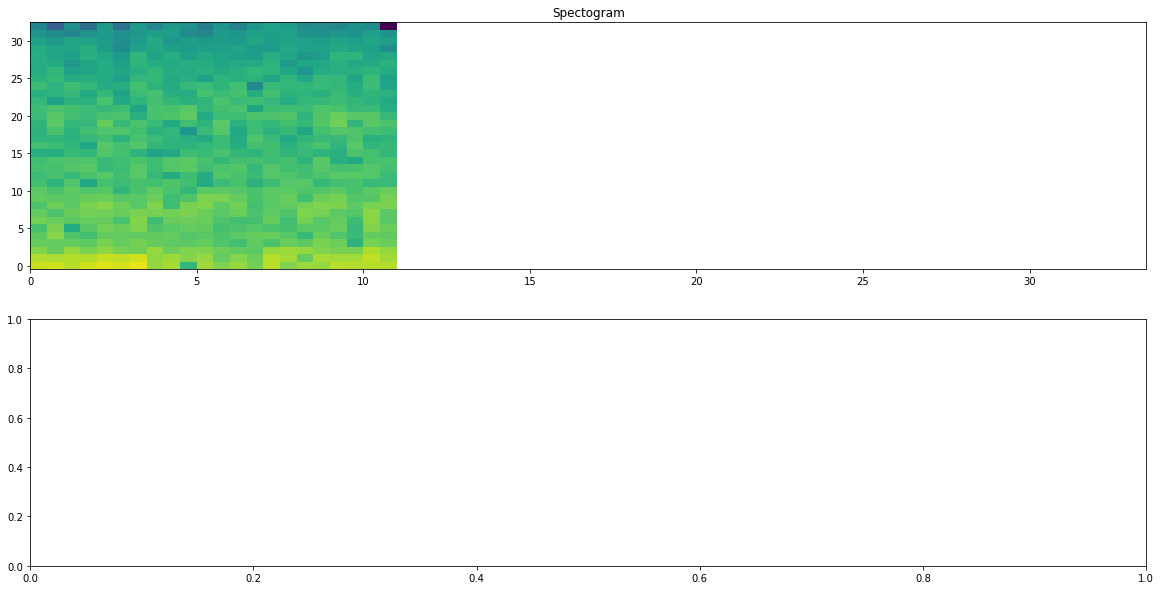

1
33 6955


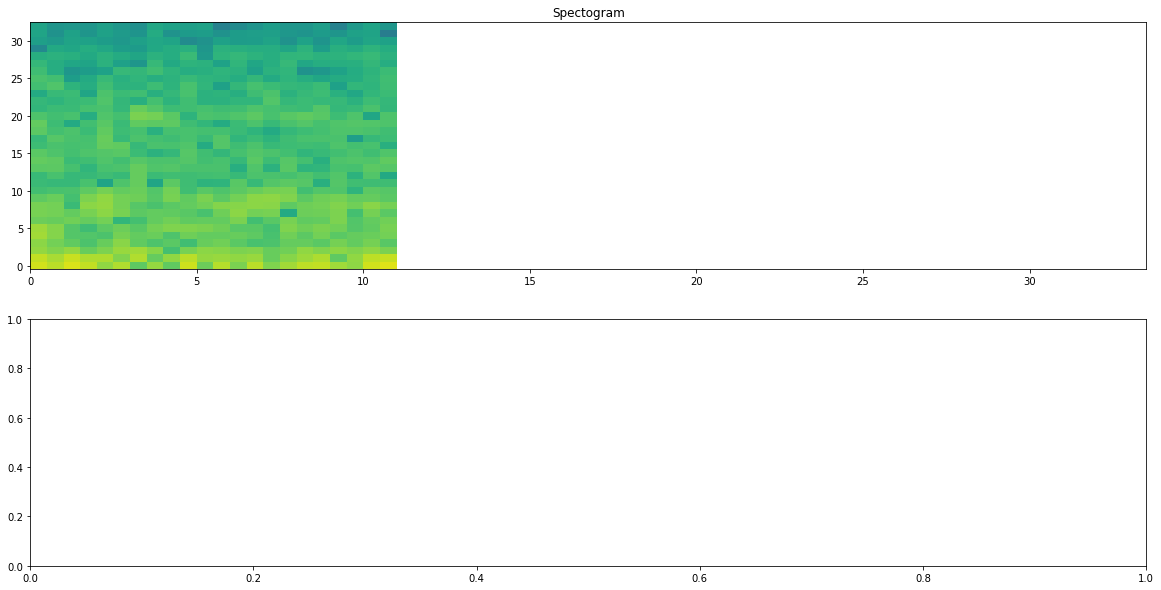

1
33 6955


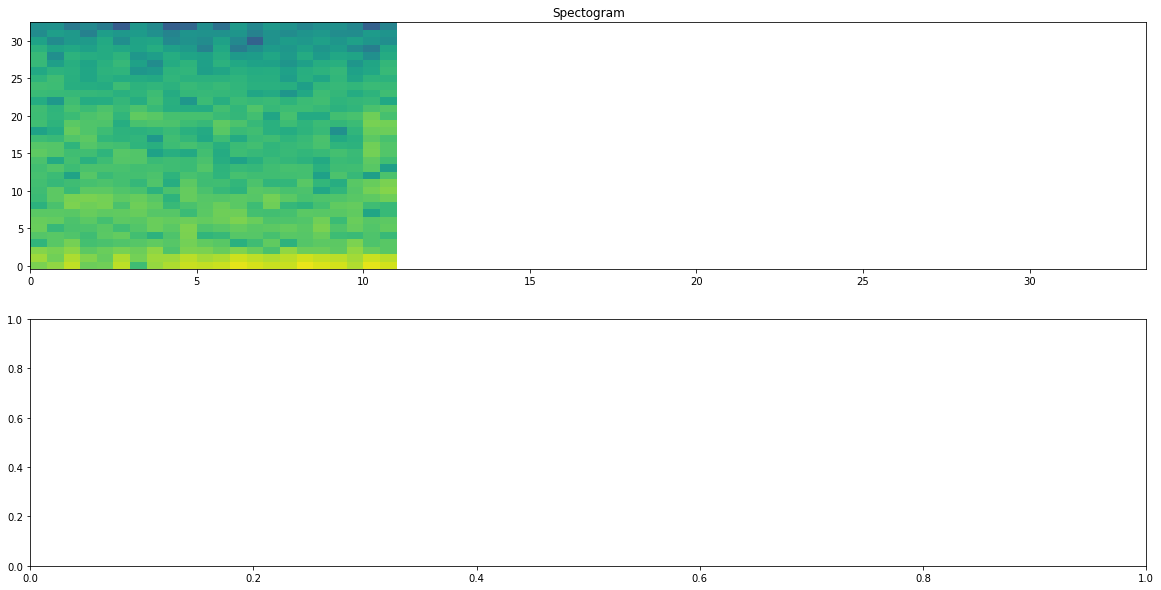

1
33 6955


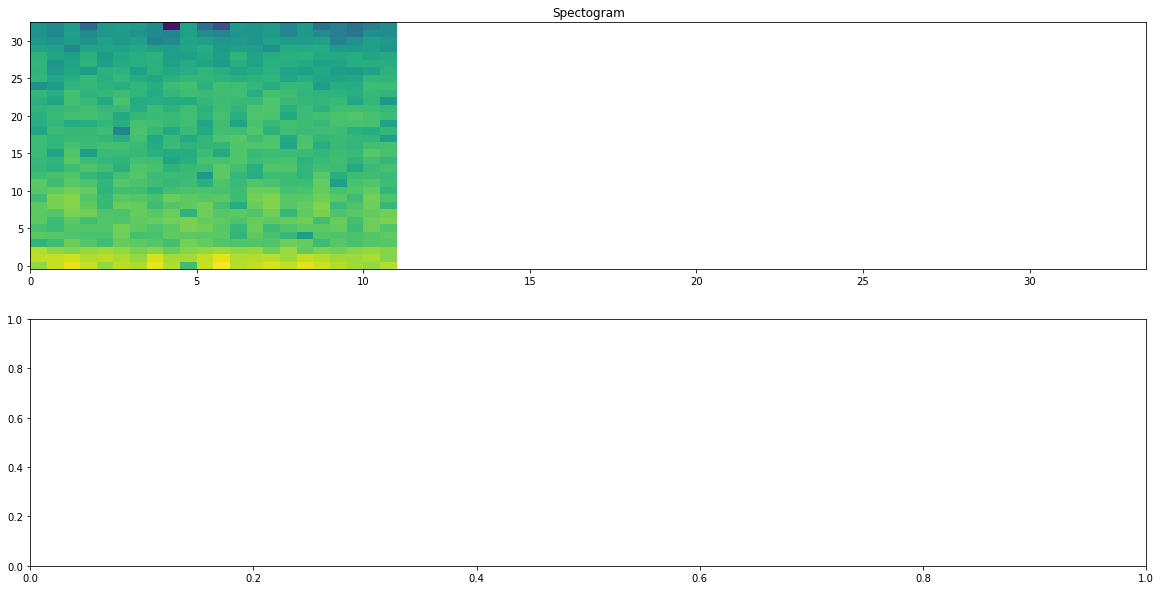

1
33 6955


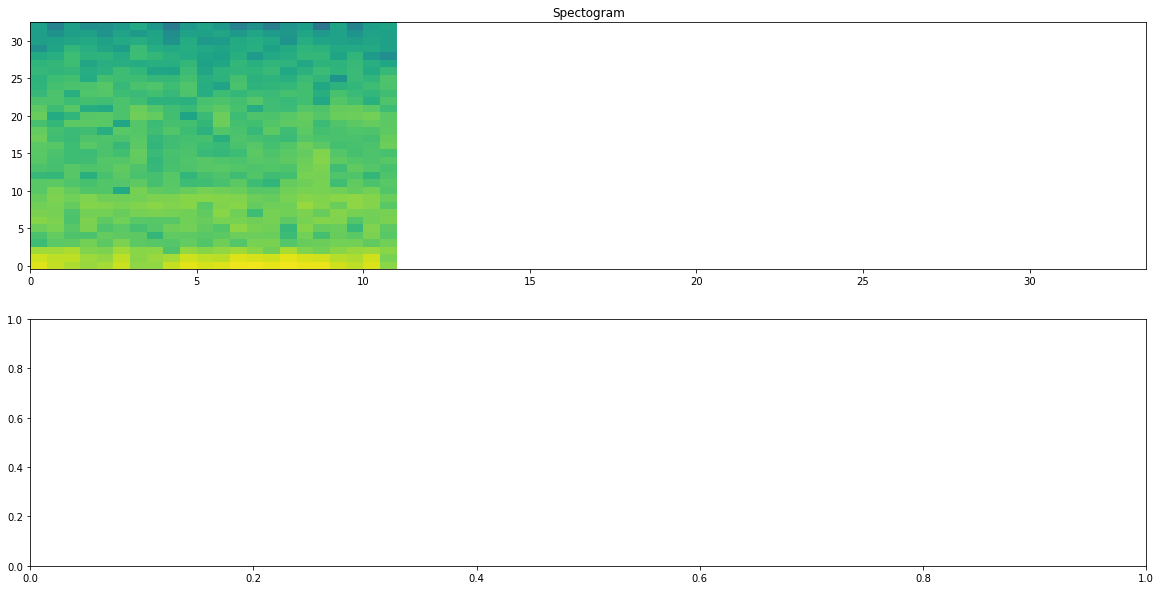

1
33 6955


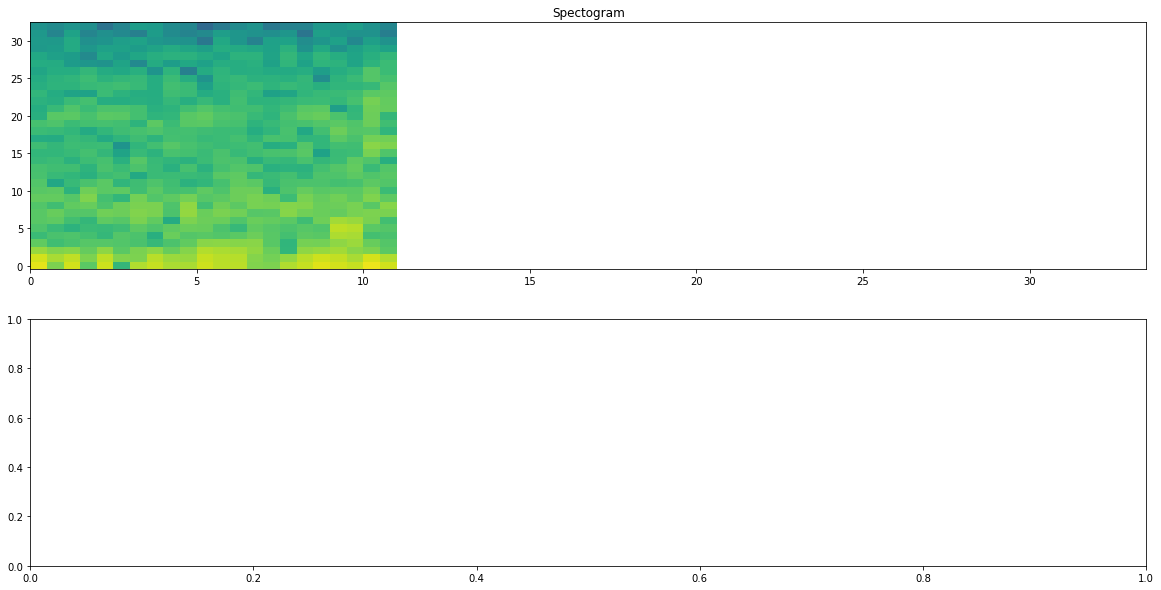

1
33 6955


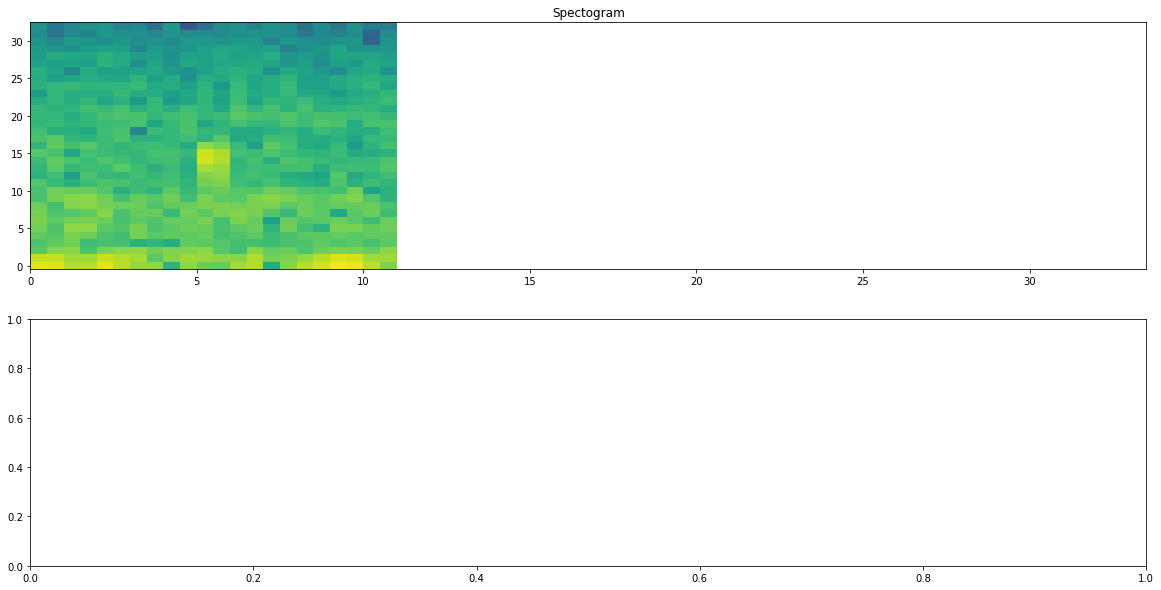

1
33 6955


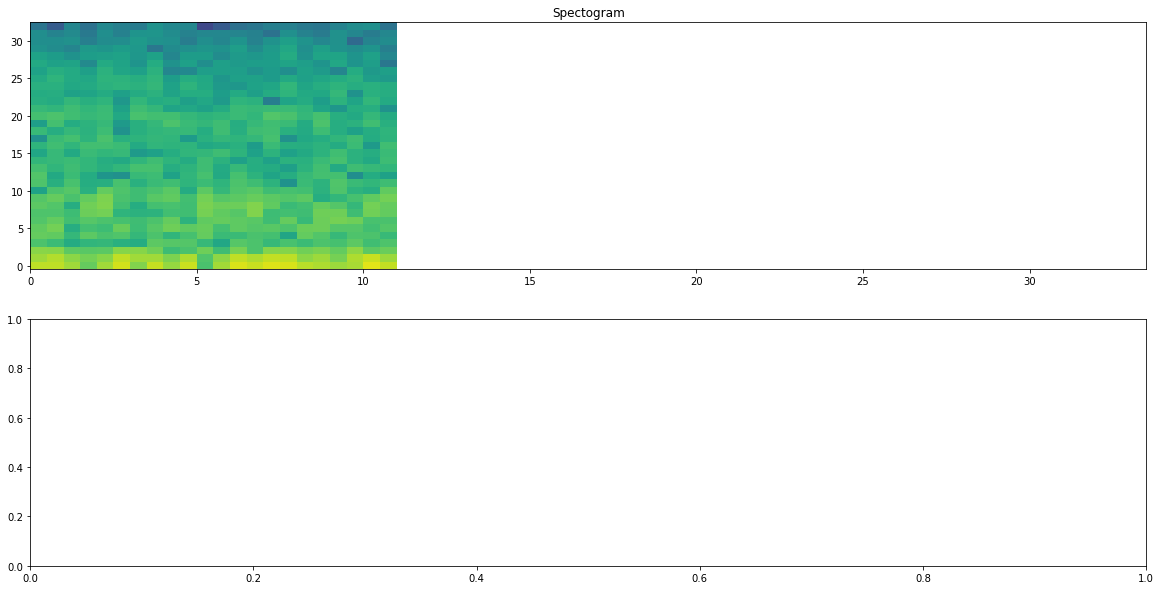

1
33 6955


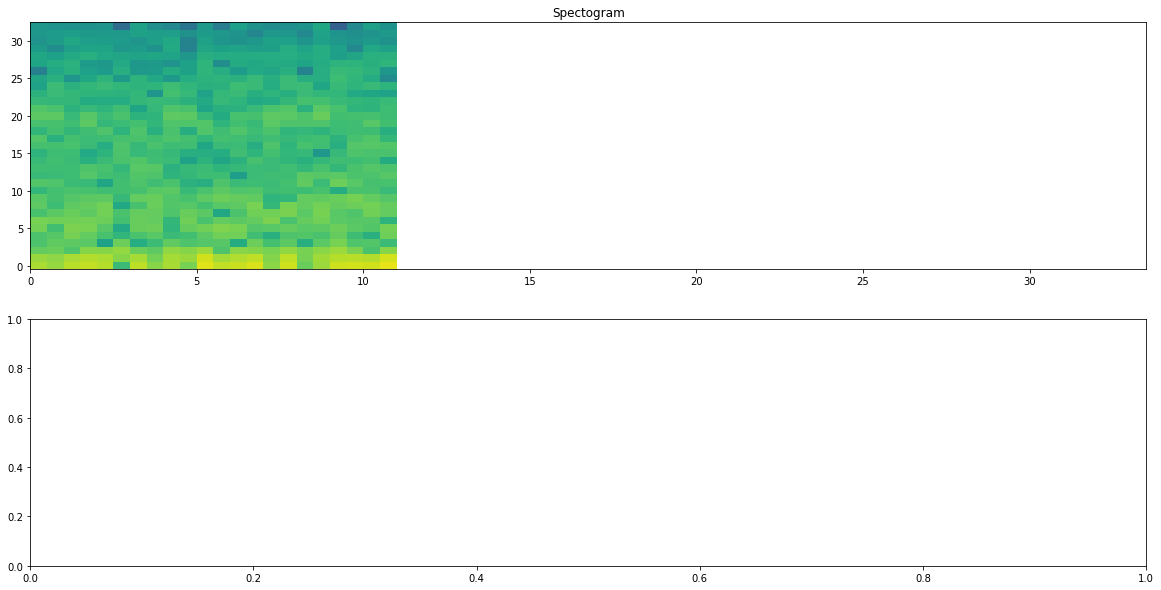

1
33 6955


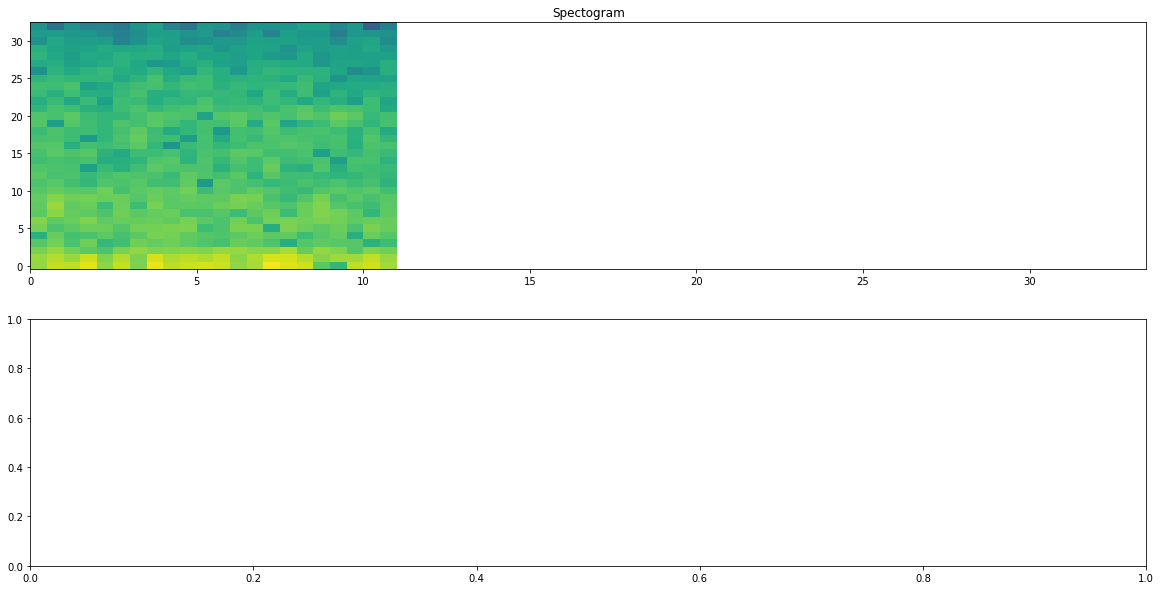

1
33 6955


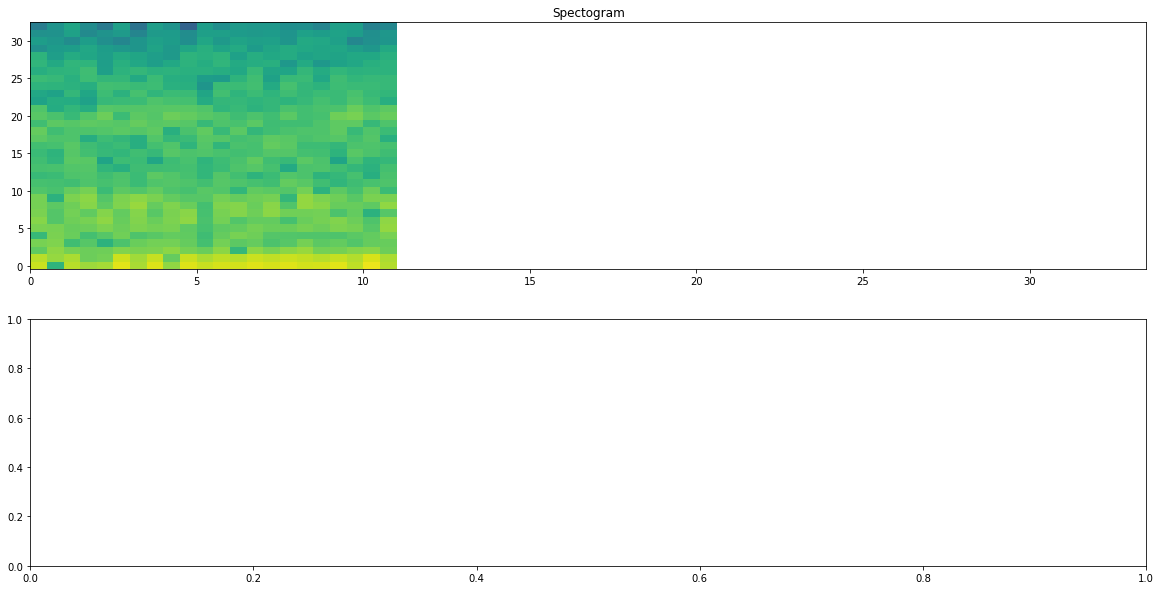

1
33 6955


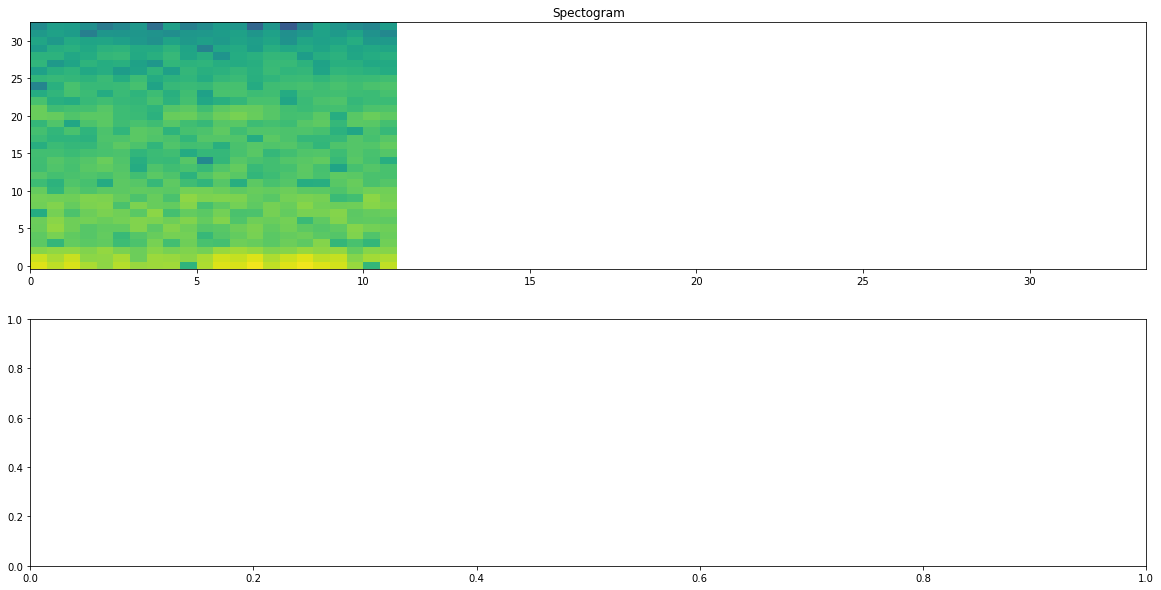

1
33 6955


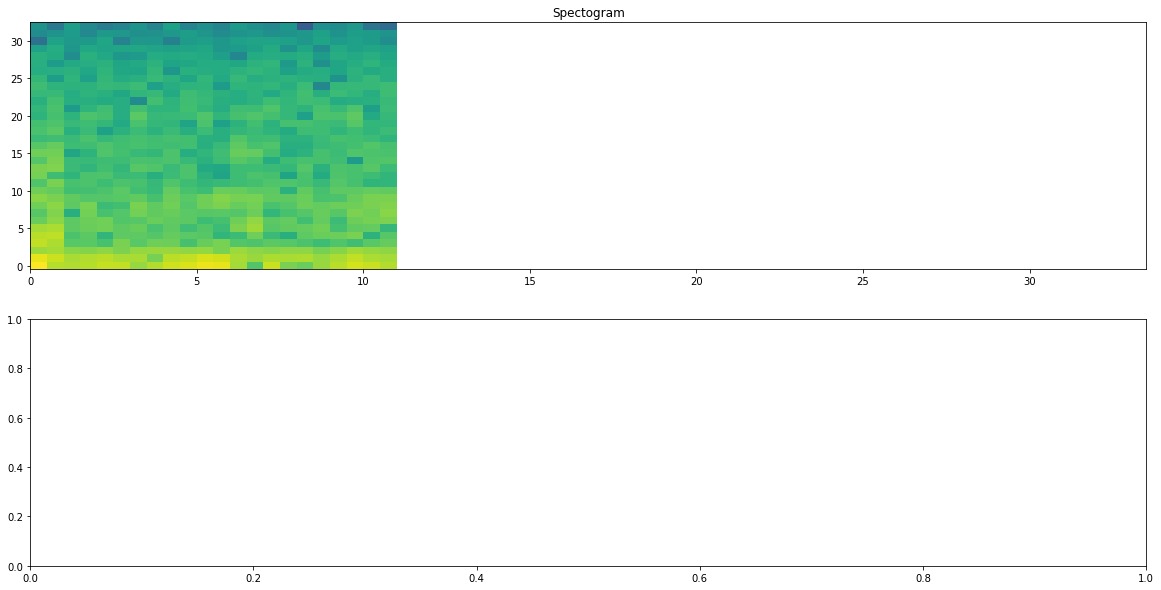

1
33 6955


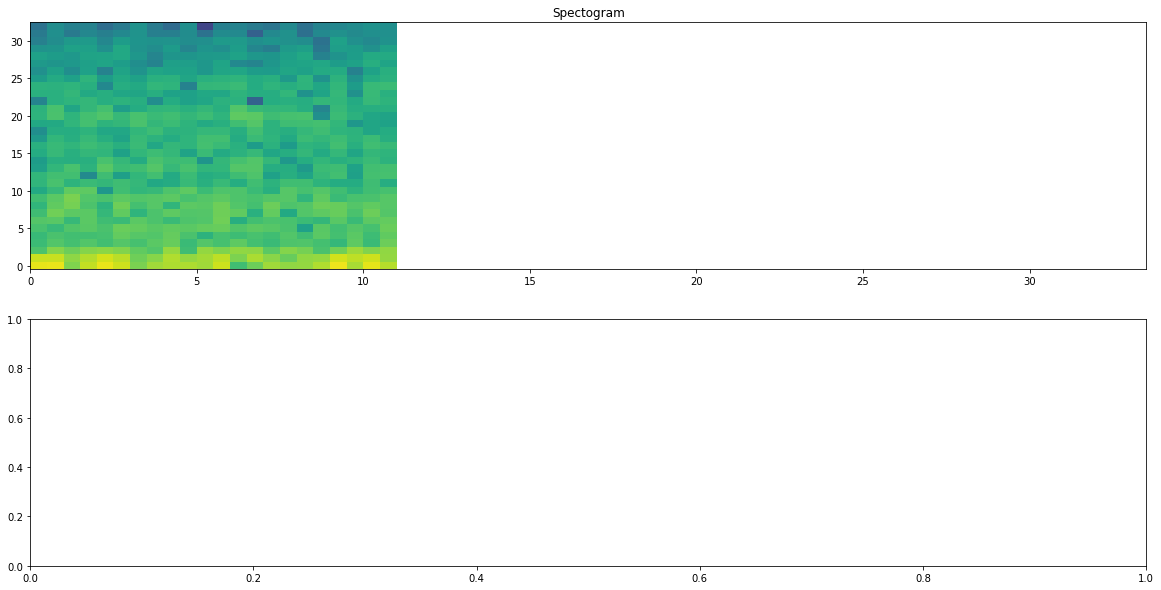

1
33 6955


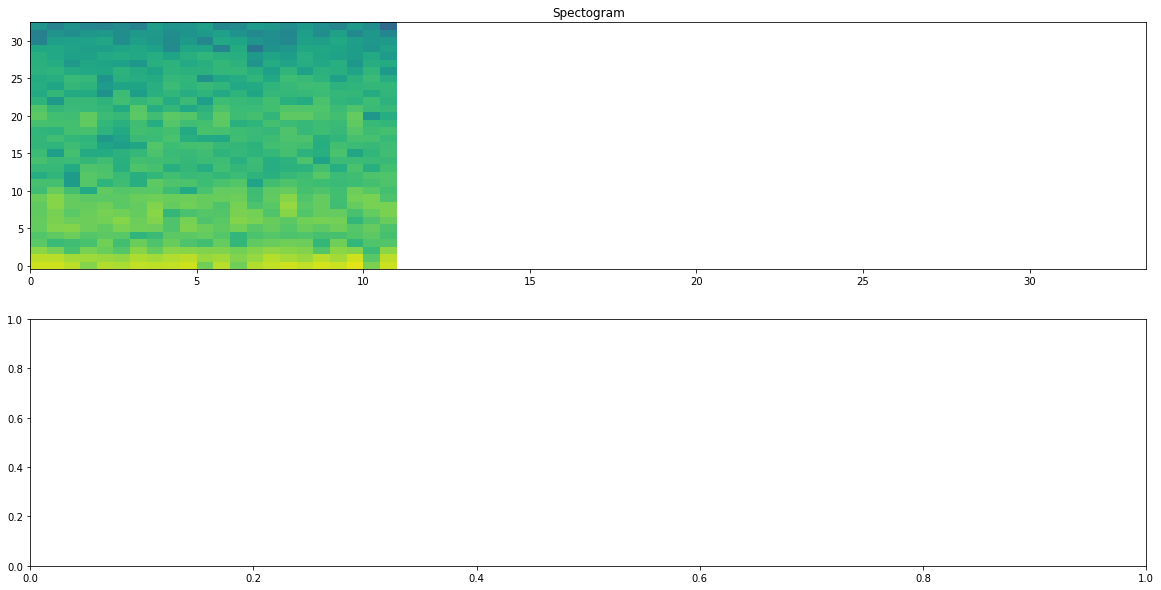

1
33 6955


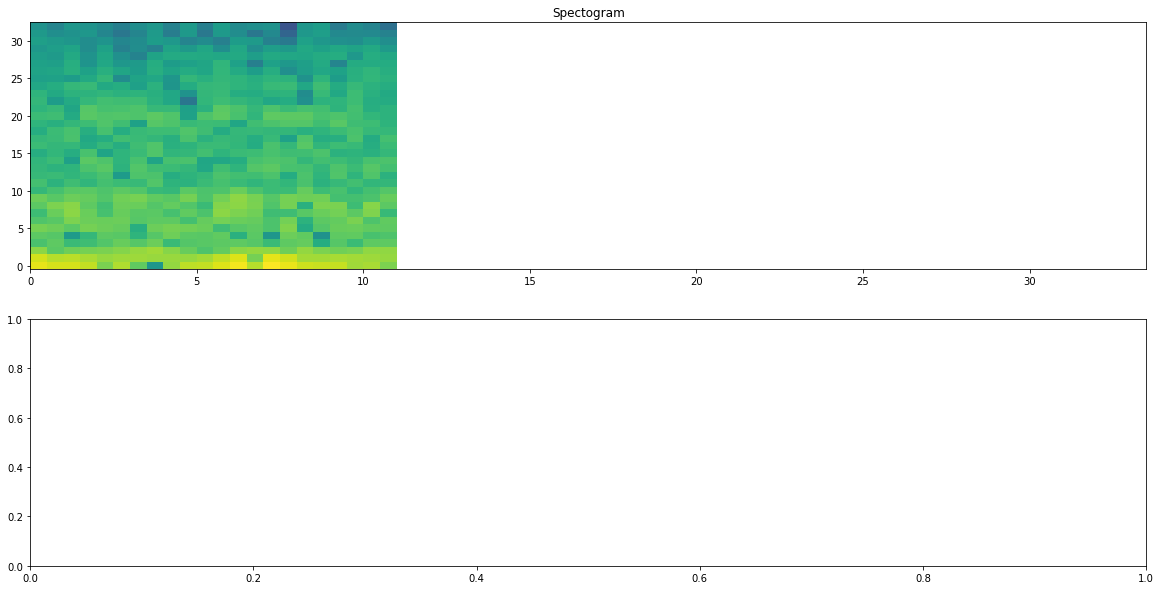

1
33 6955


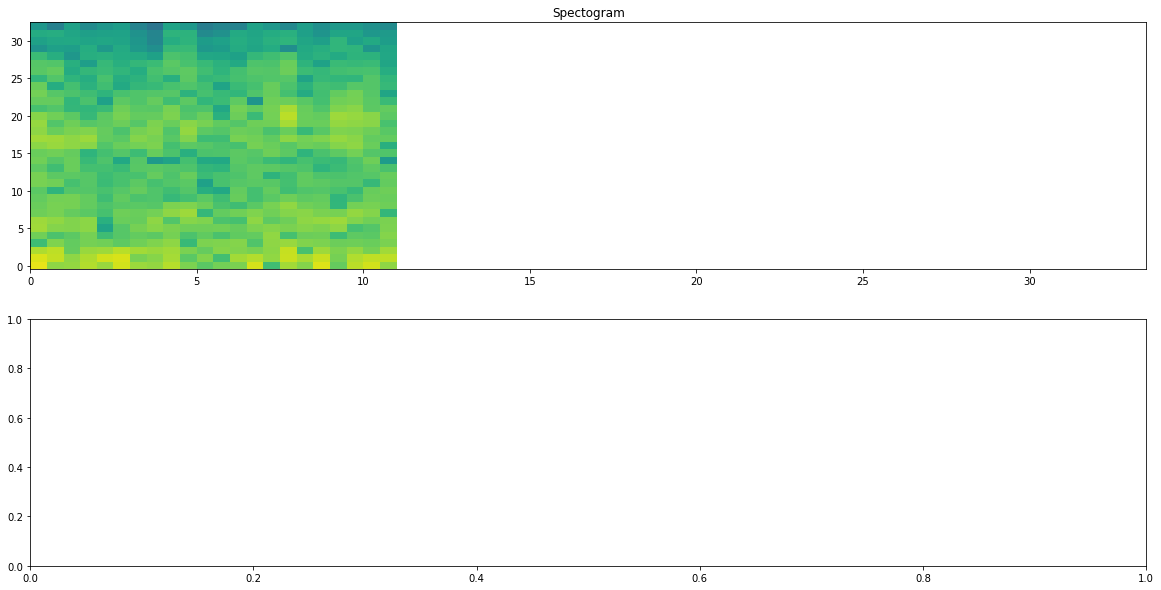

1
33 6955


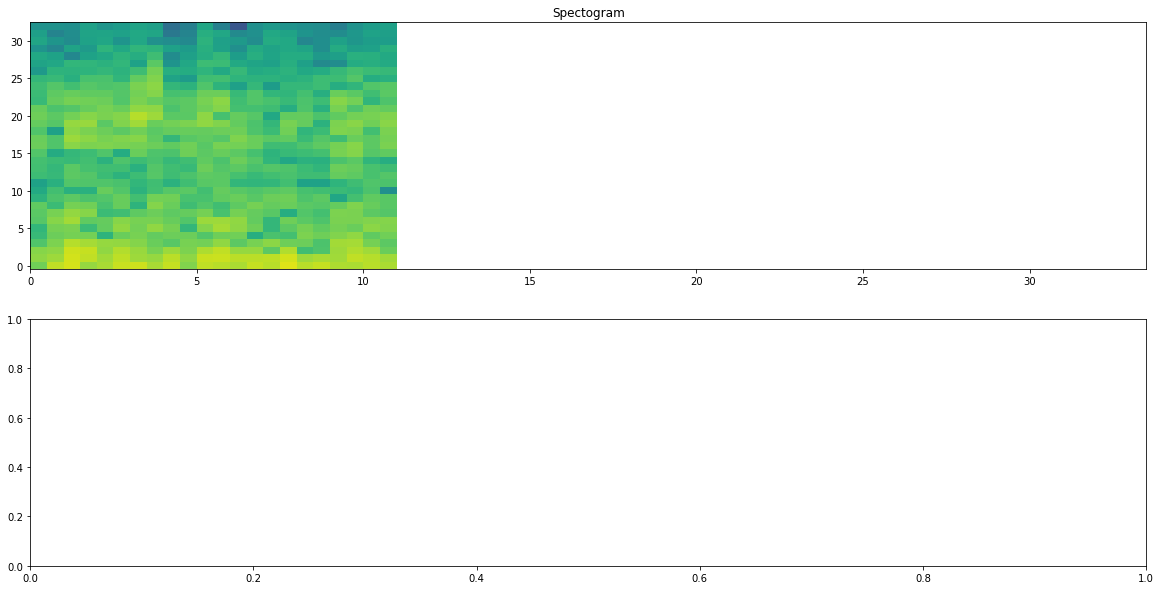

1
33 6955


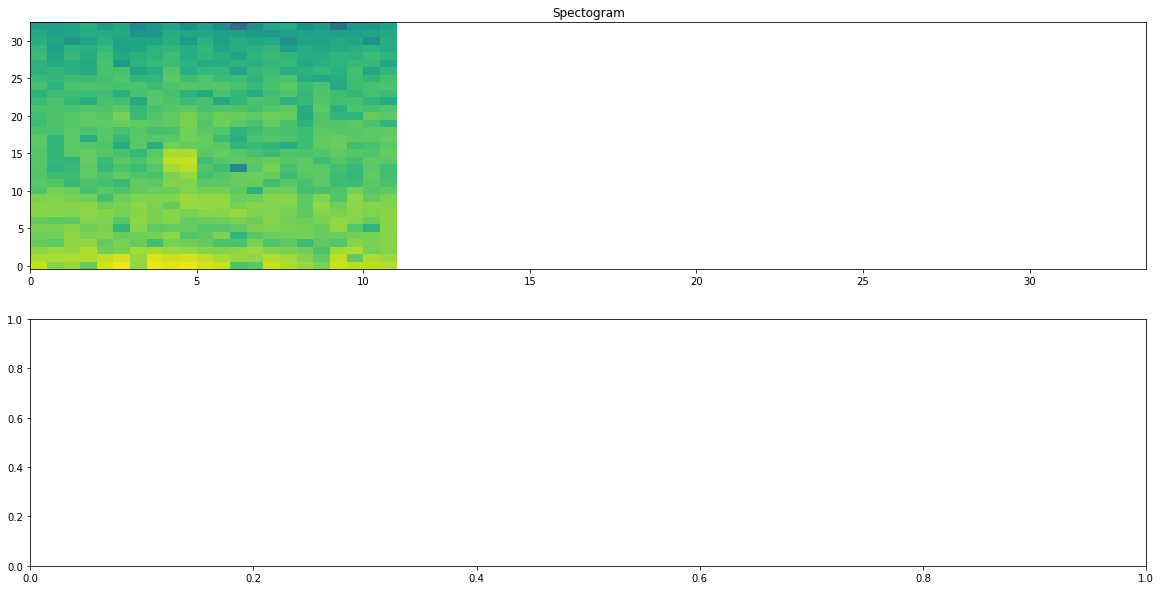

1
33 6955


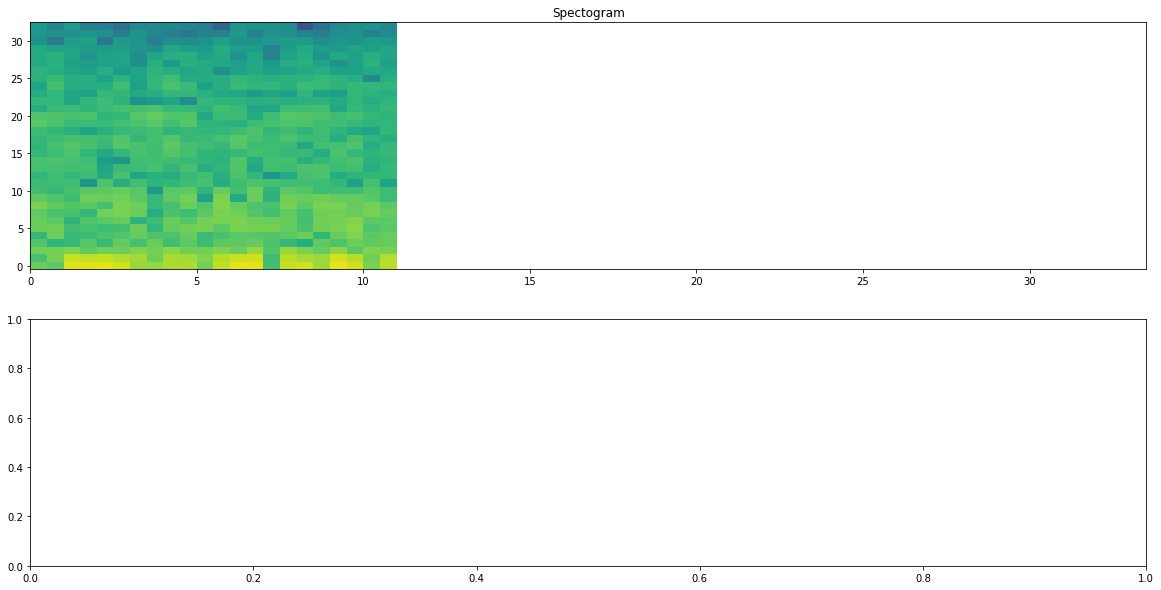

1
33 6955


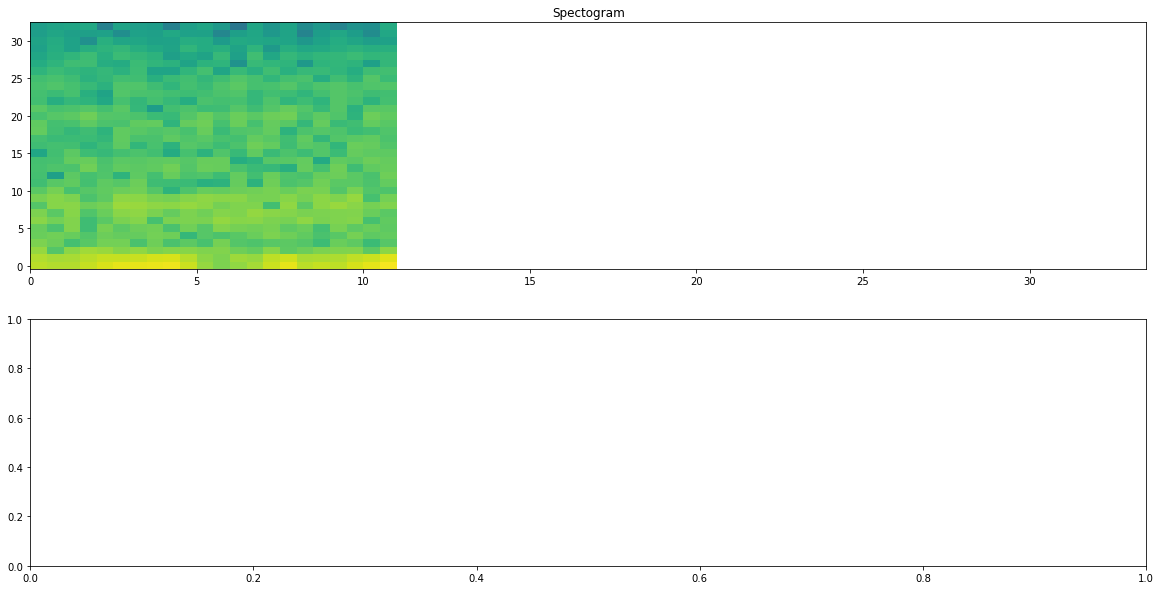

1
33 6955


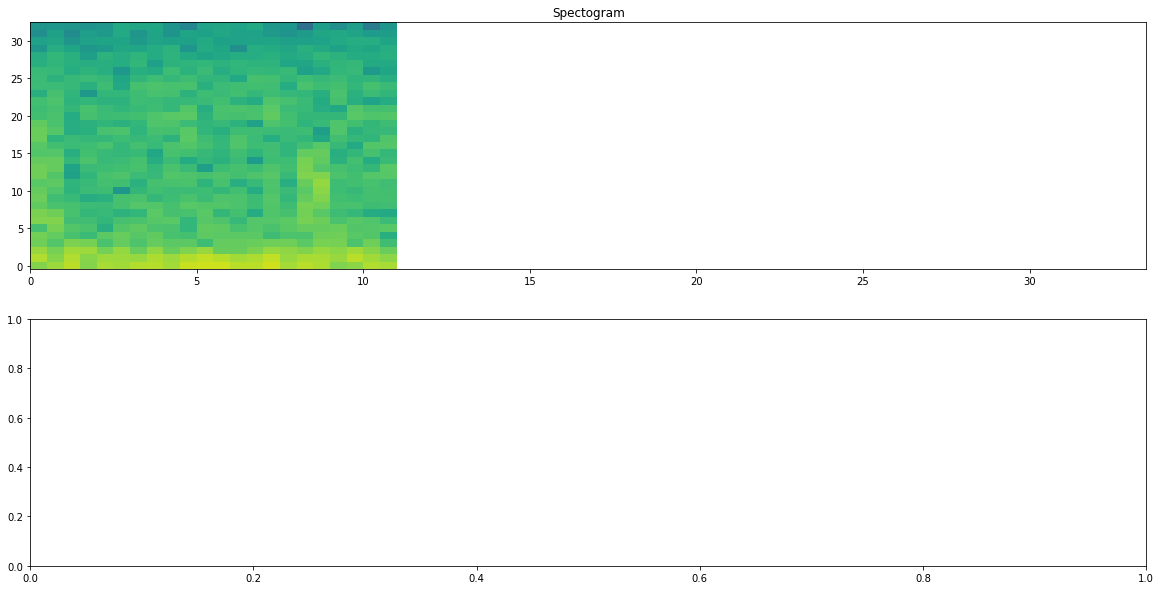

1
33 6955


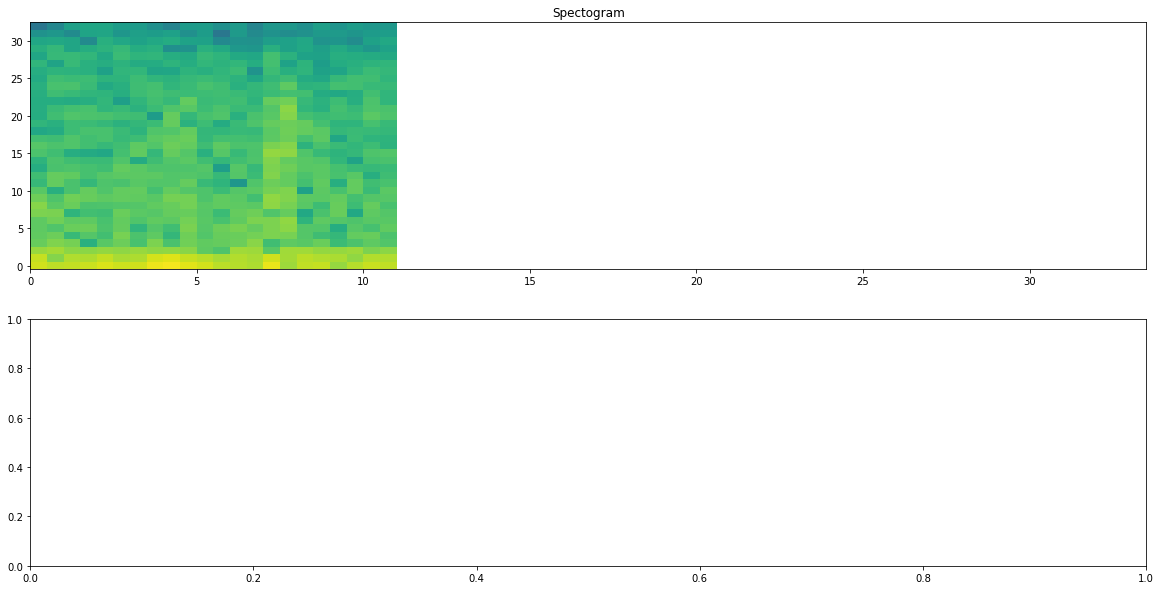

1
33 6955


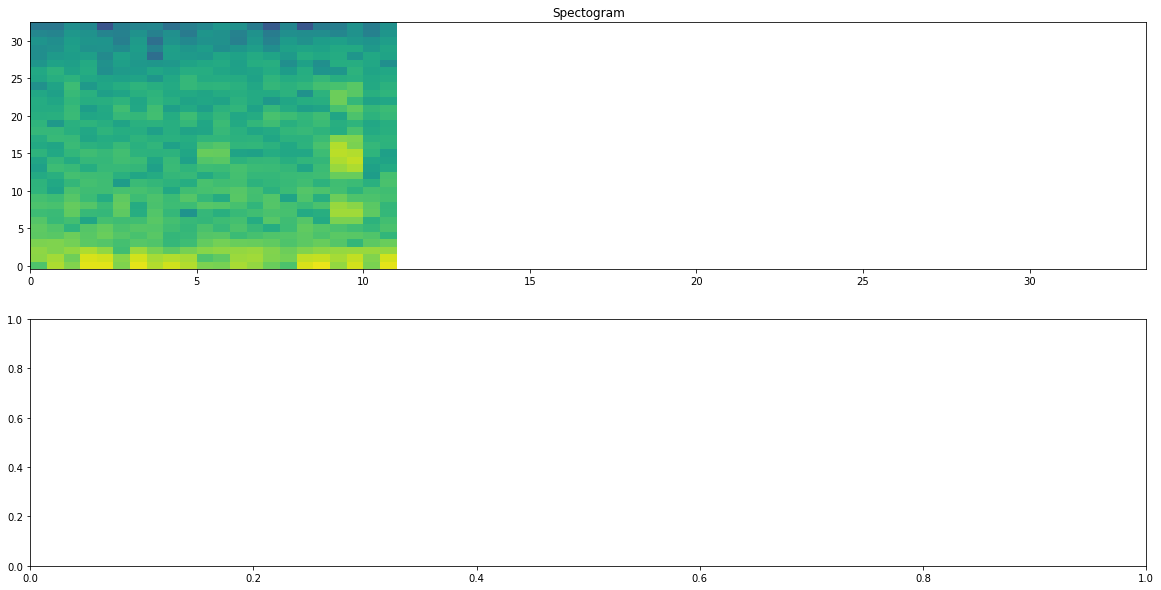

1
33 6955


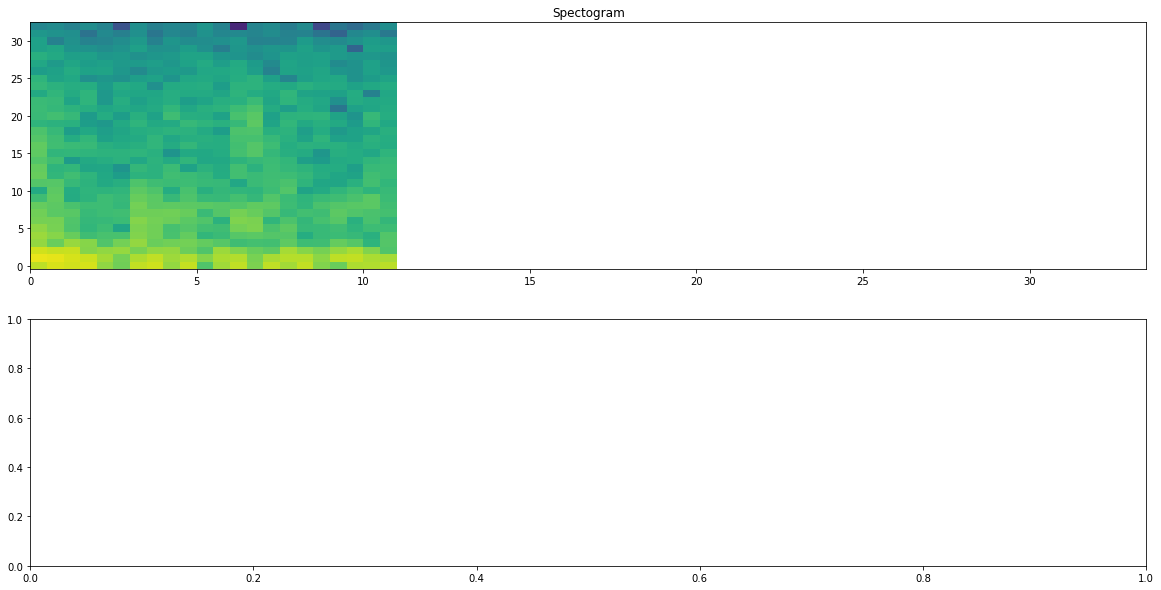

1
33 6955


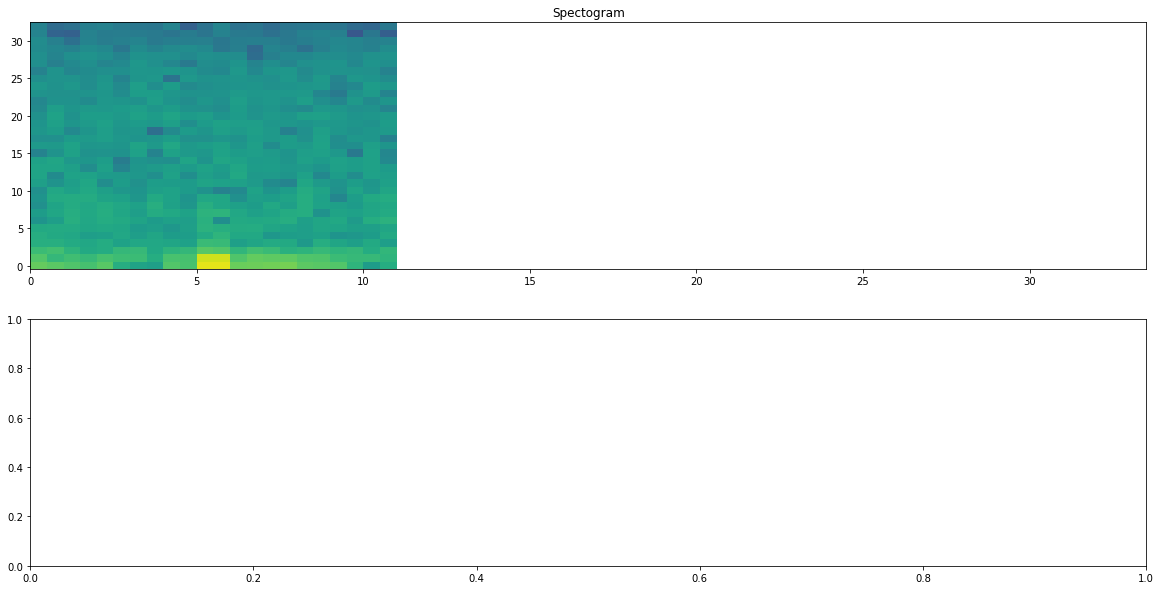

1
33 6955


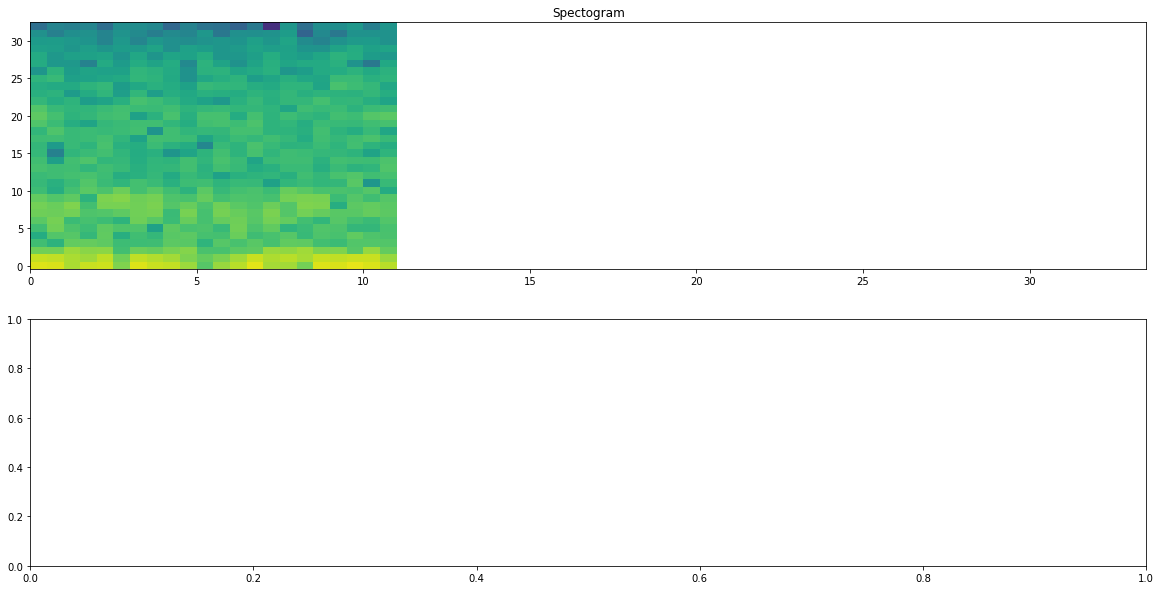

1
33 6955


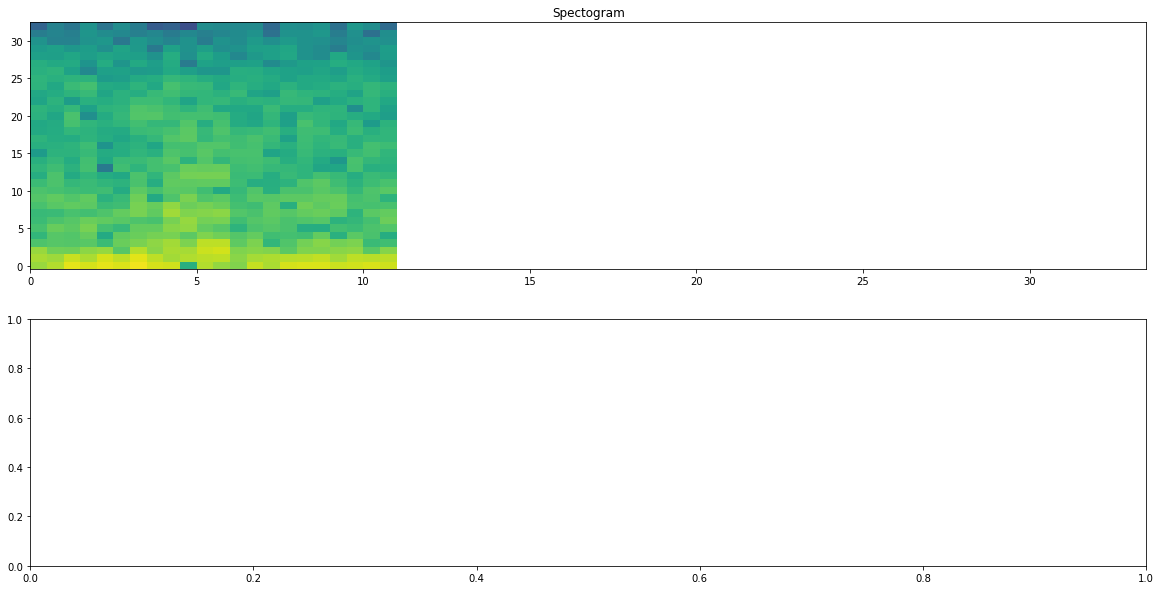

1
33 6955


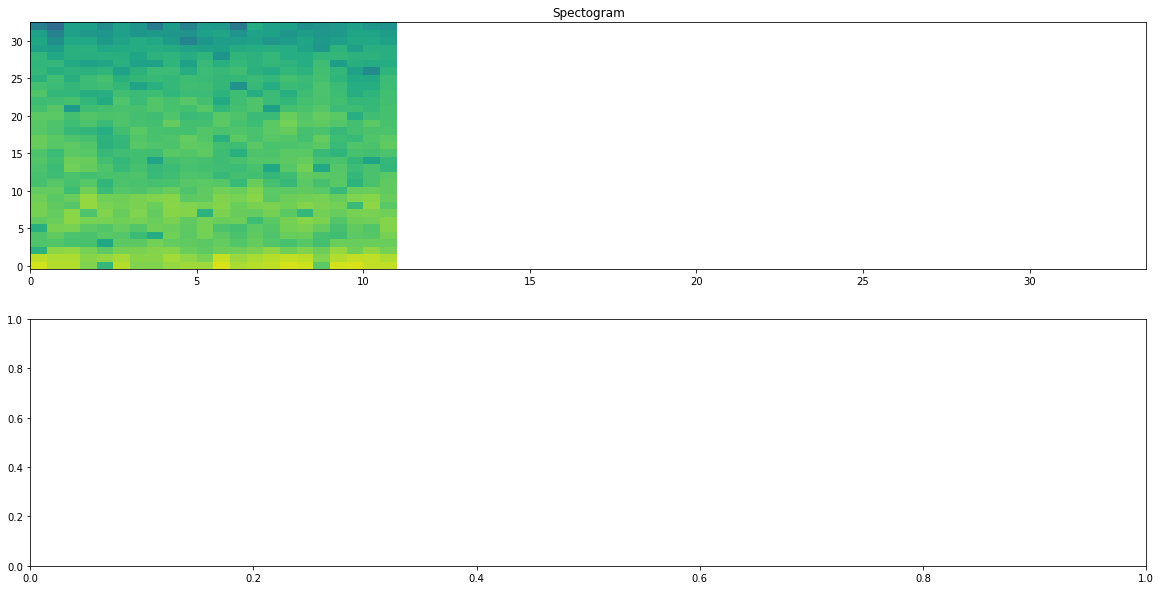

1
33 6955


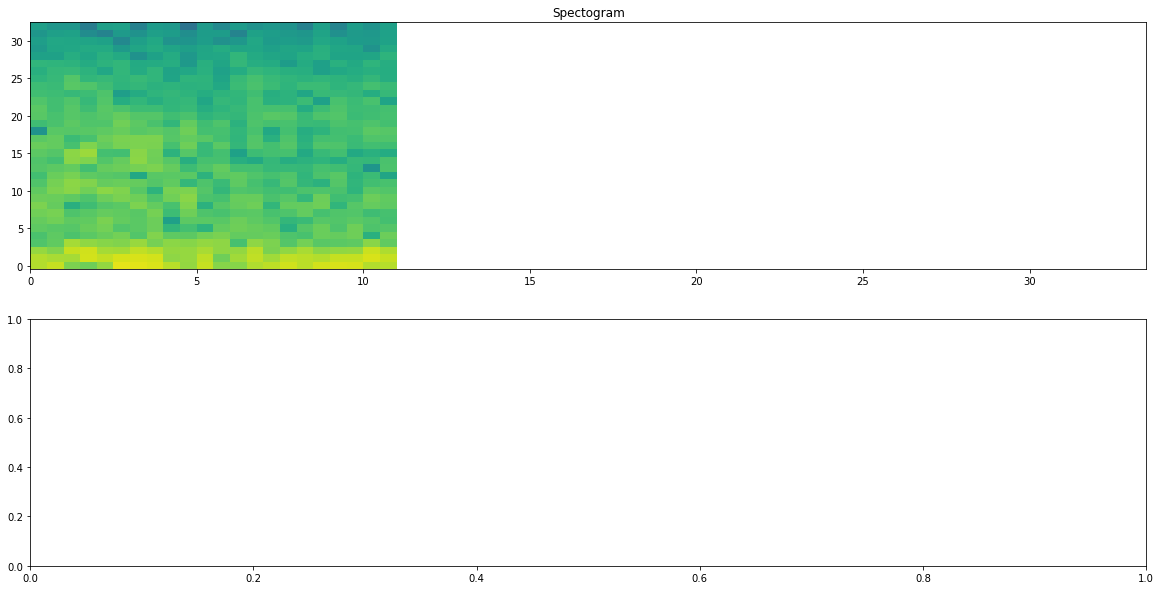

1
33 6955


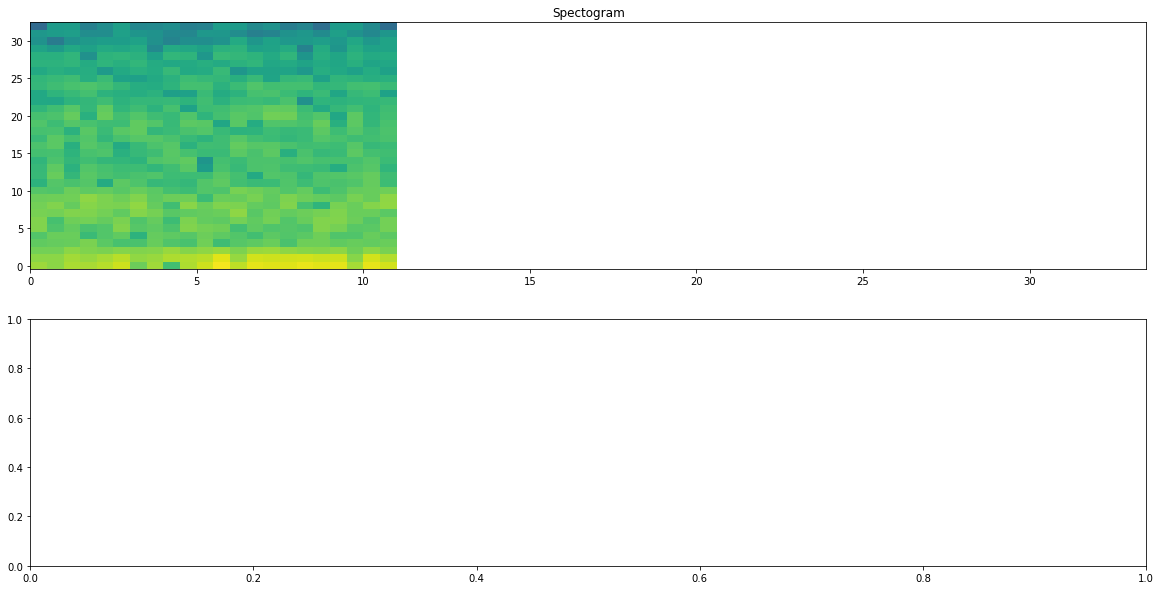

1
33 6955


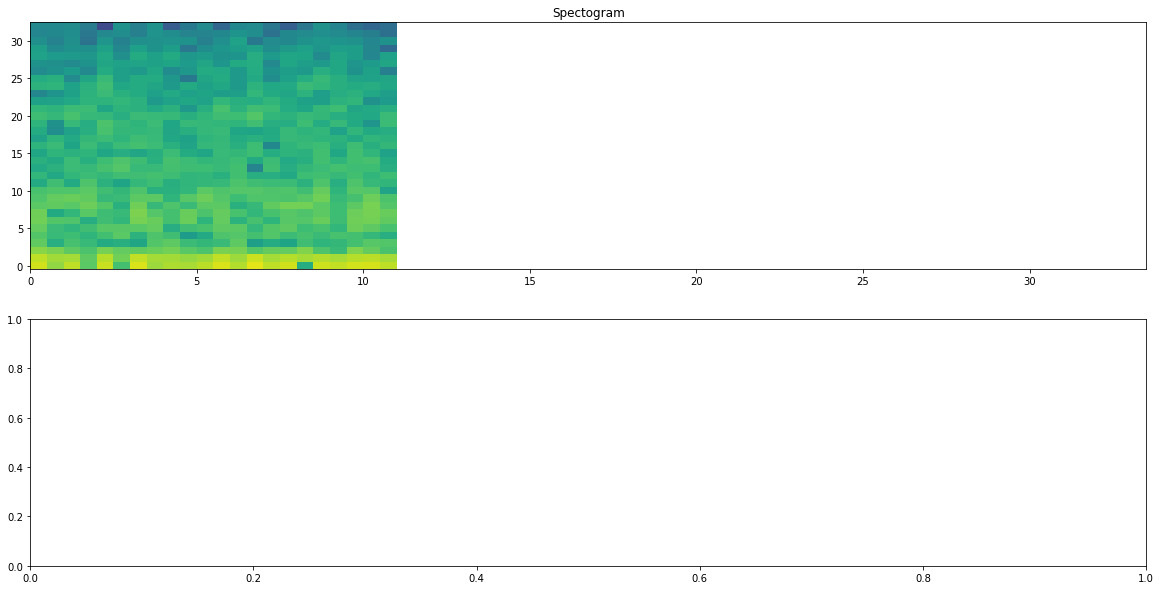

1
33 6955


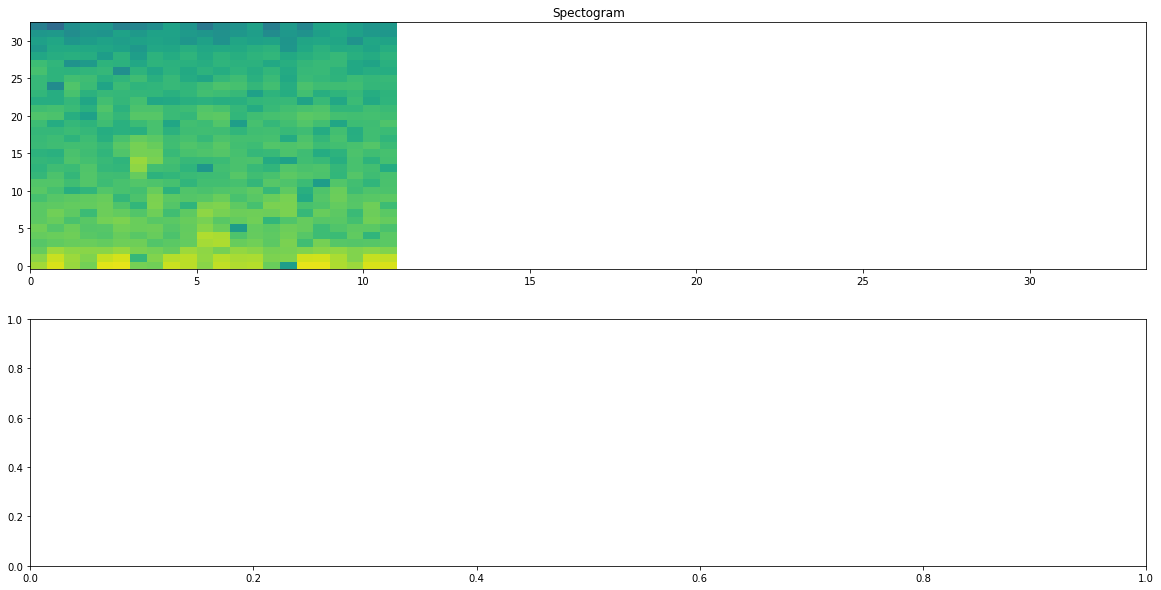

1
33 6955


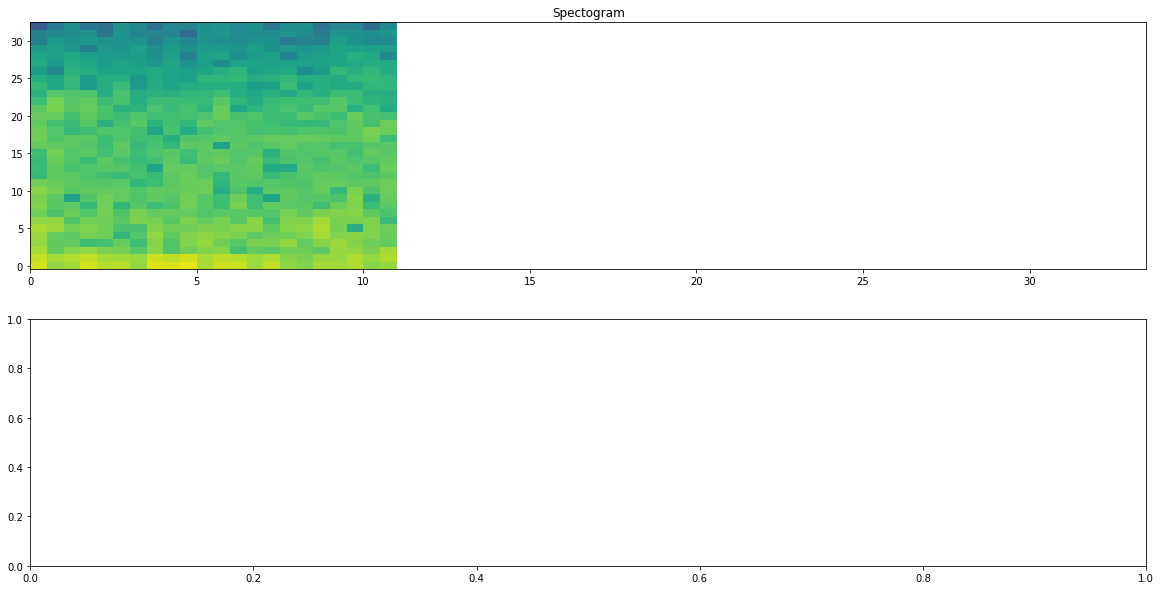

1
33 6955


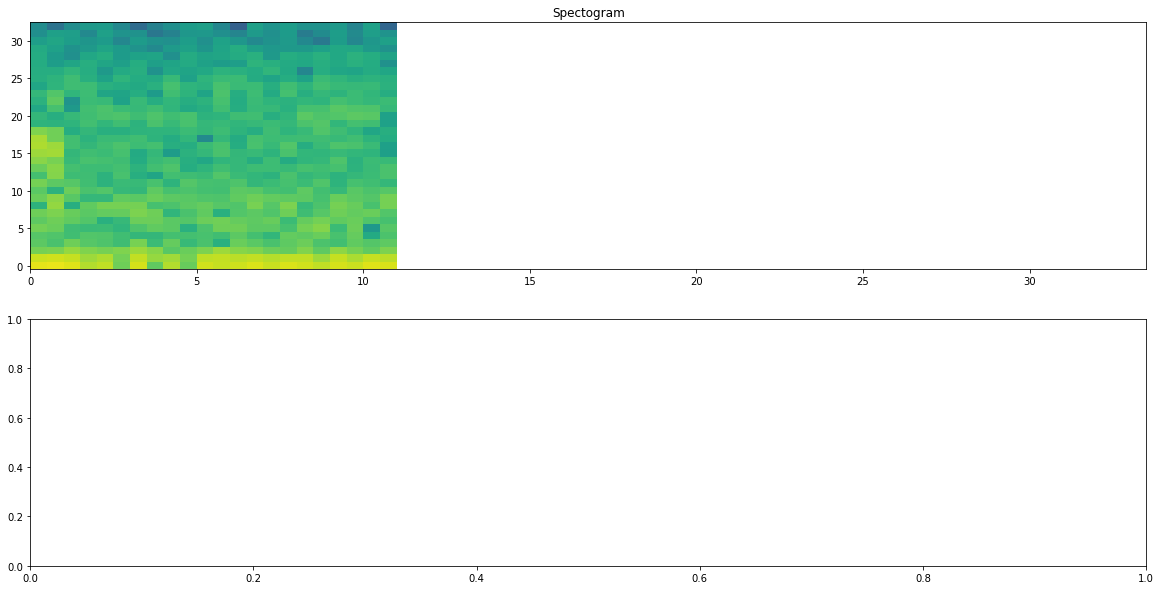

1
33 6955


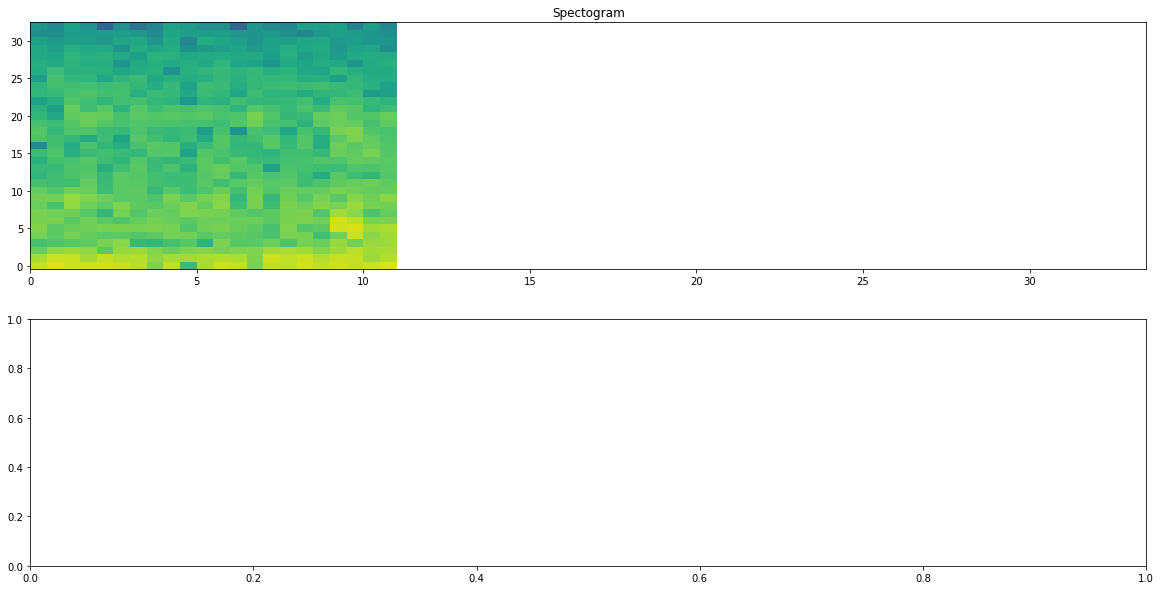

1
33 6955


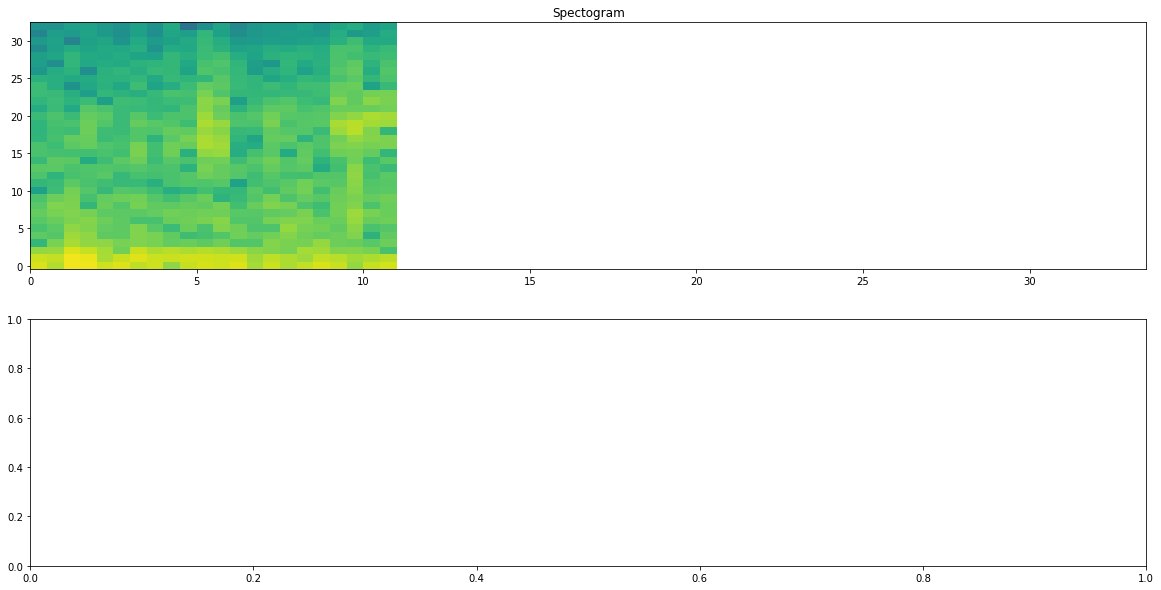

1
33 6955


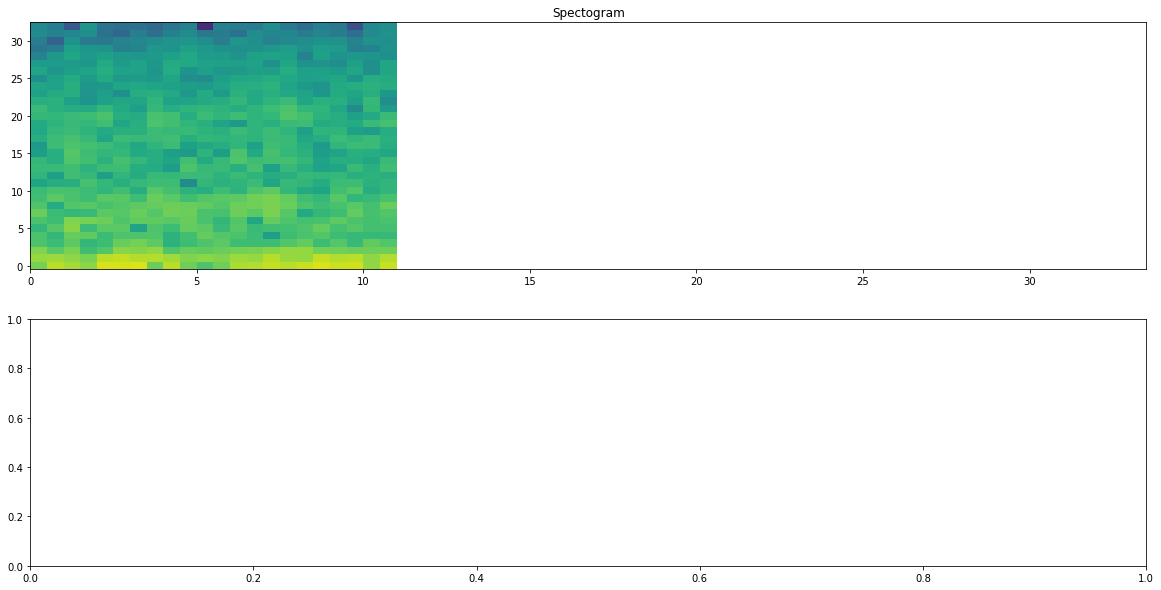

1
33 6955


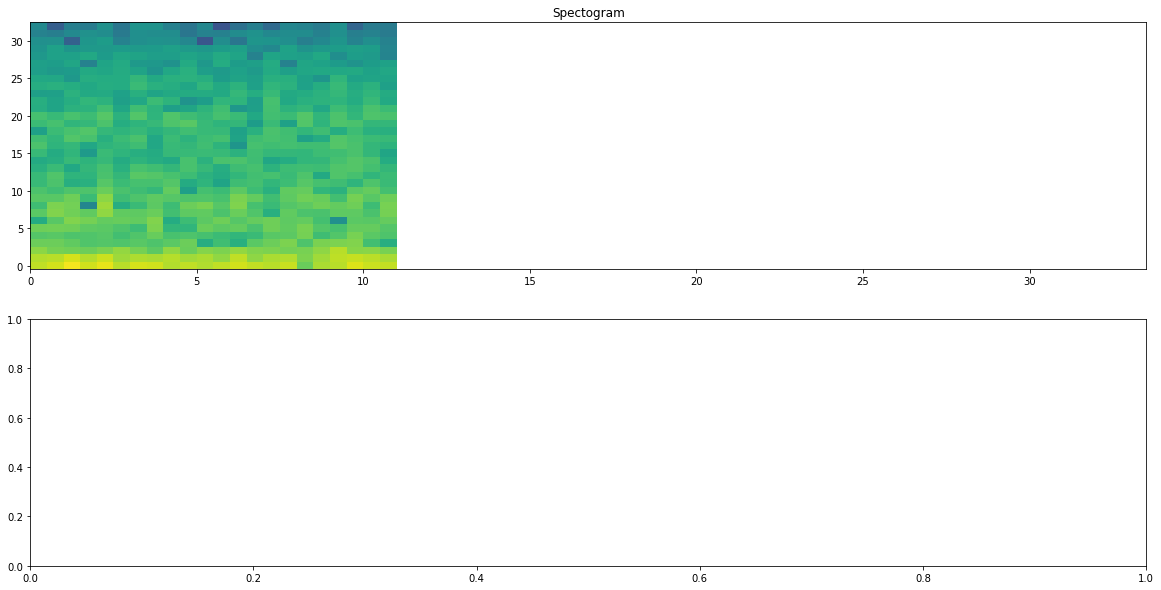

1
33 6955


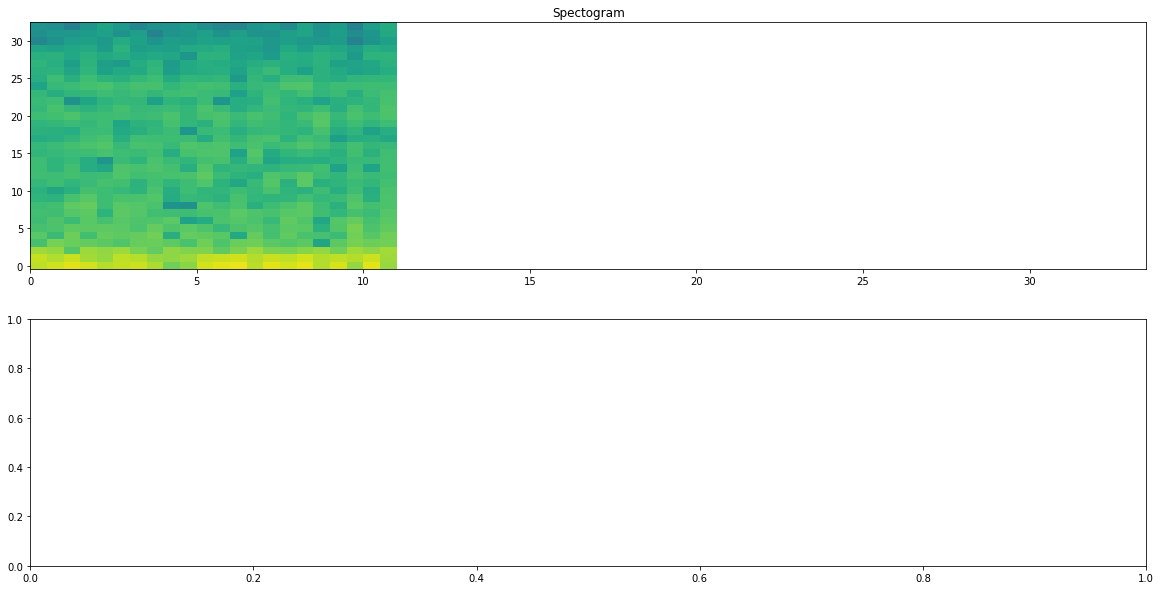

1
33 6955


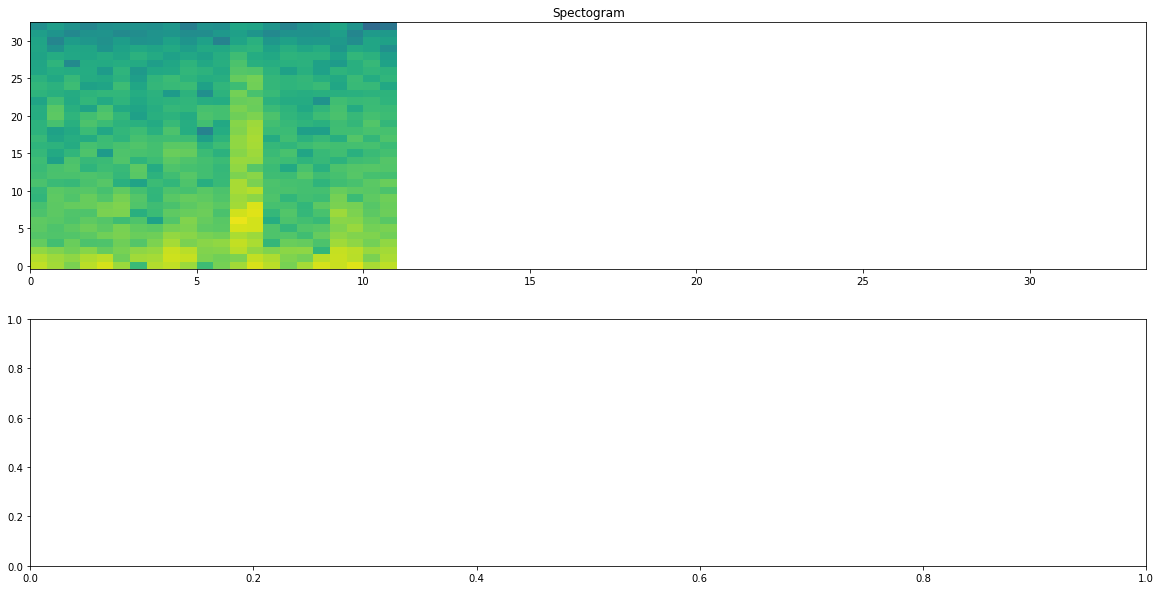

1
33 6955


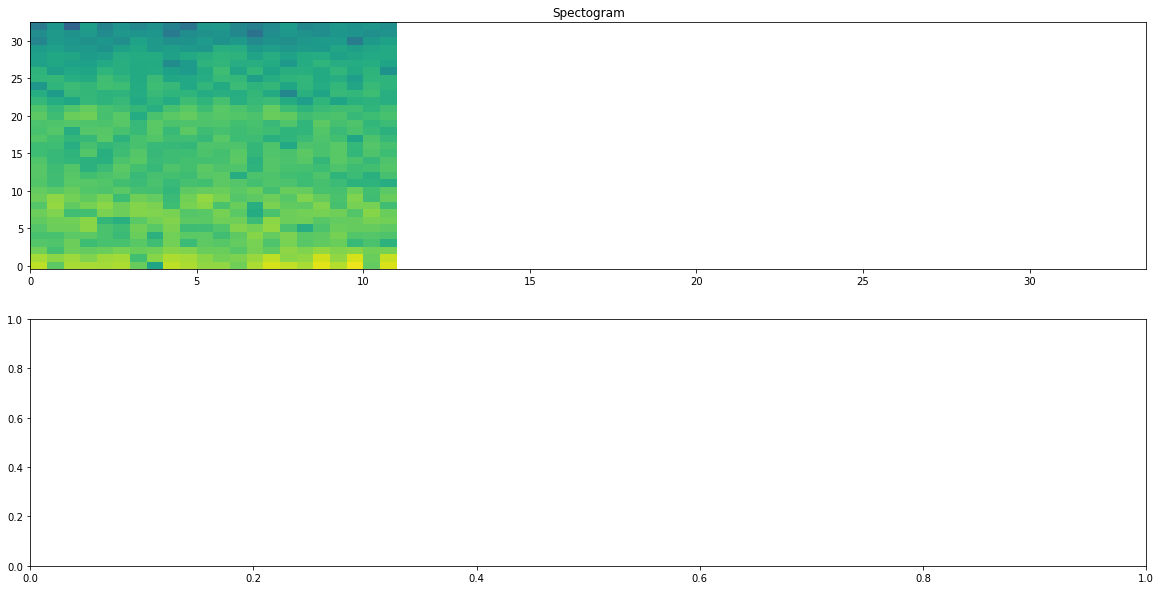

1
33 6955


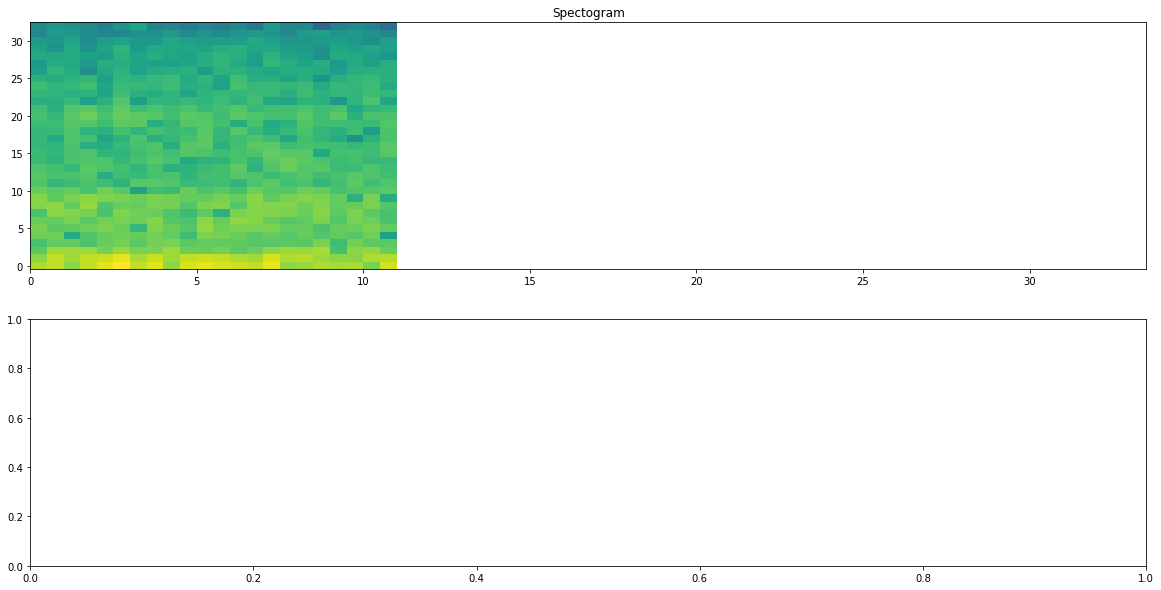

1
33 6955


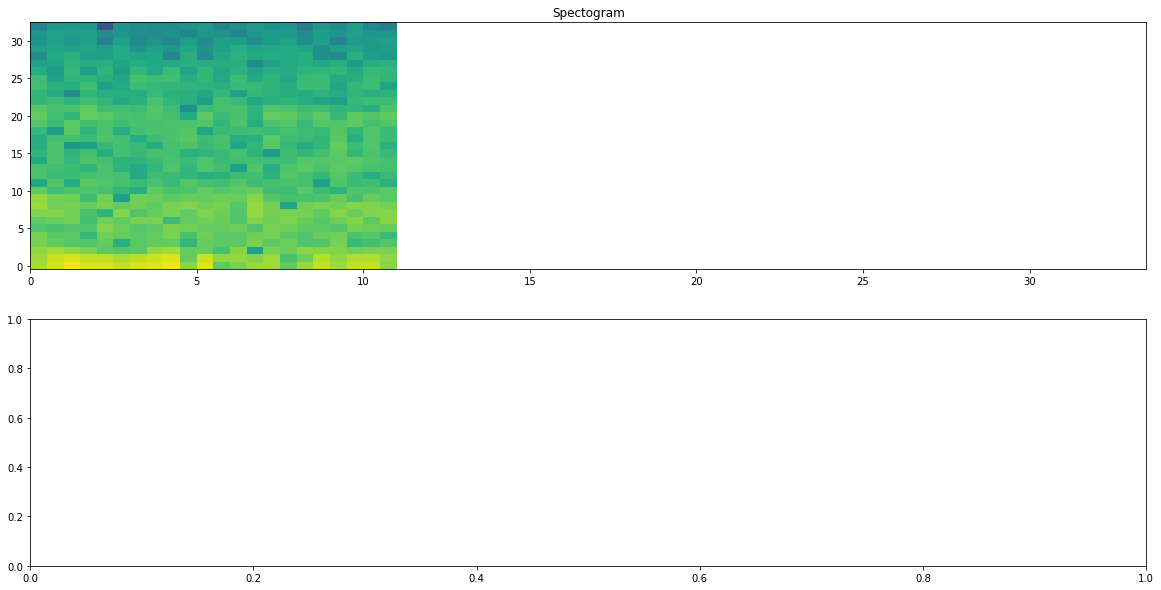

1
33 6955


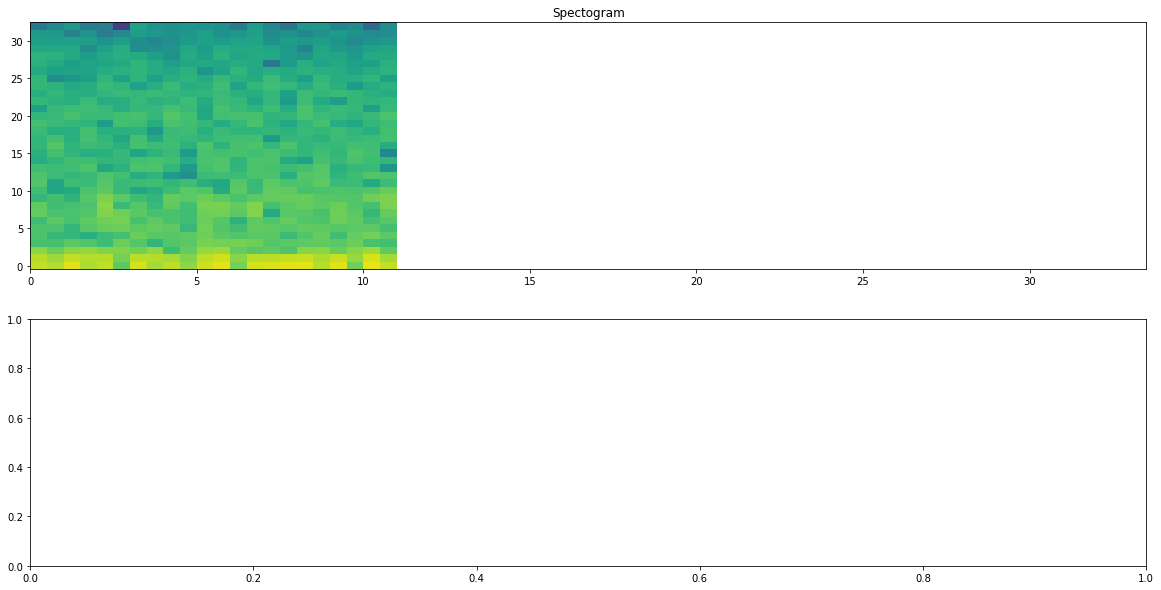

1
33 6955


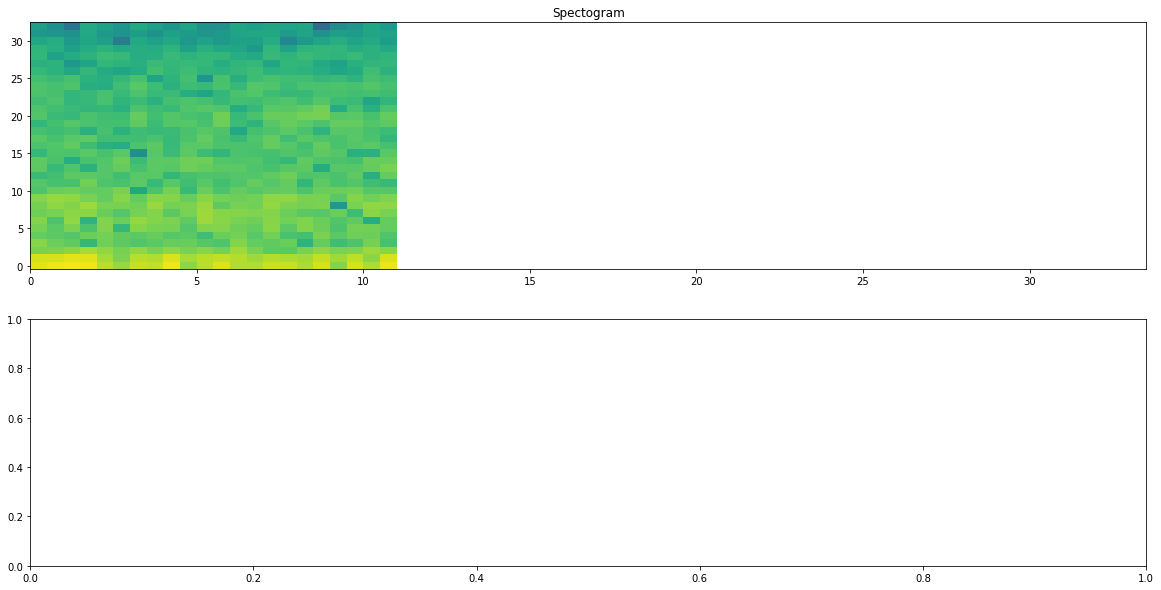

1
33 6955


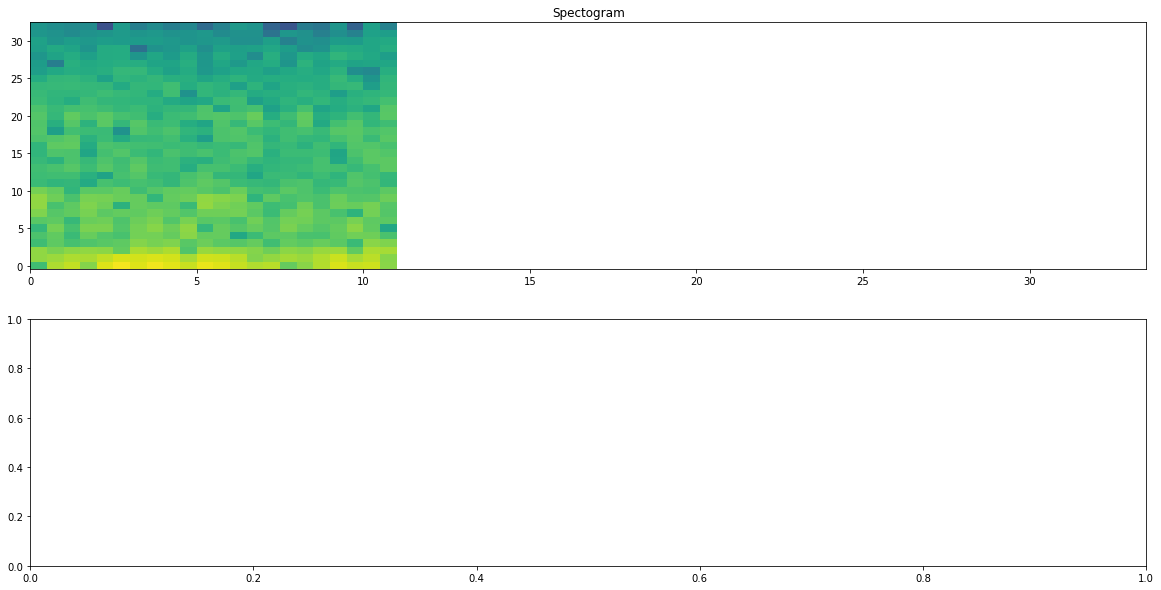

1
33 6955


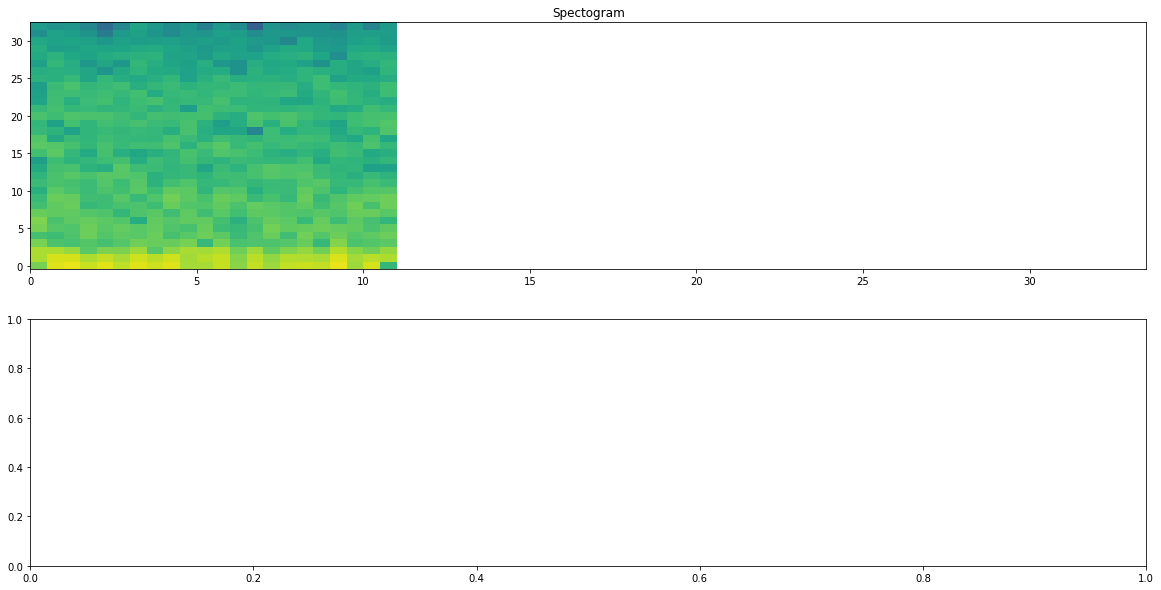

1
33 6955


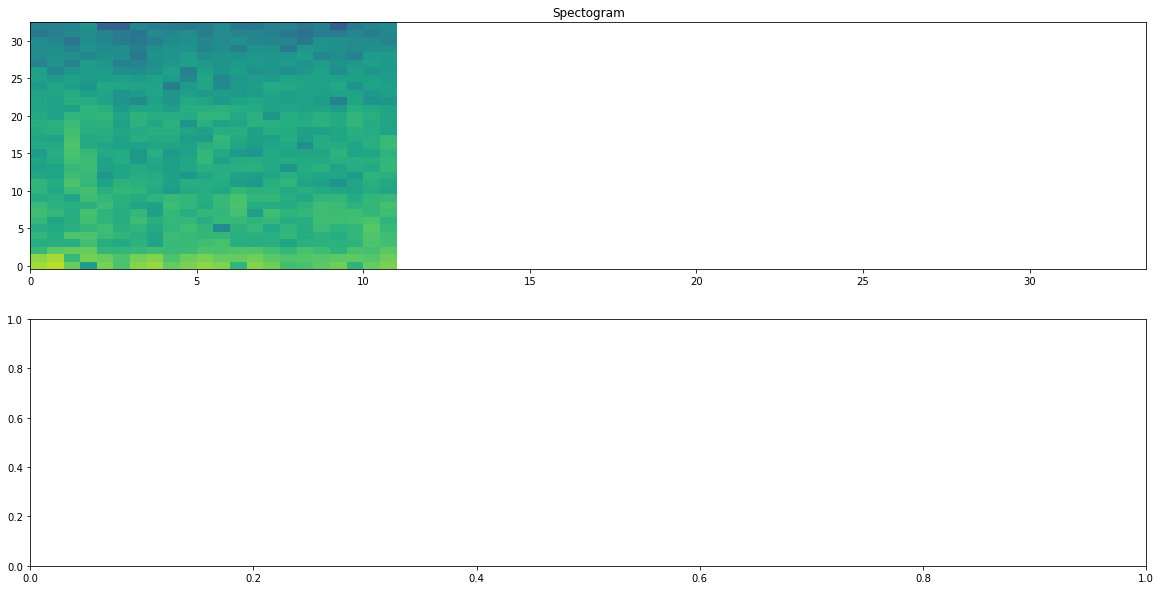

1
33 6955


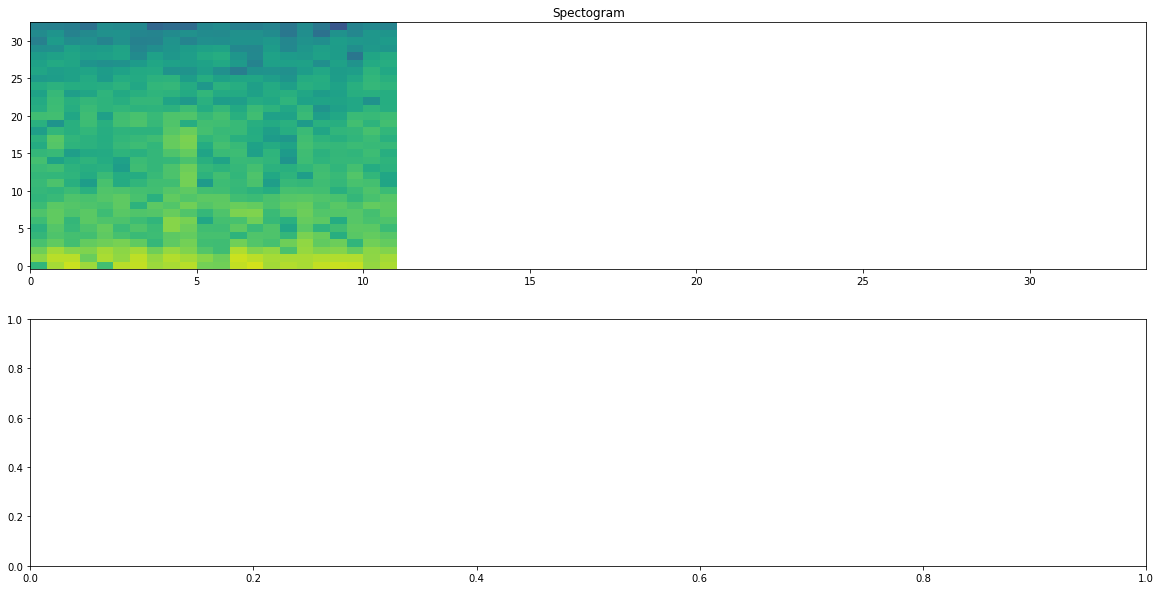

1
33 6955


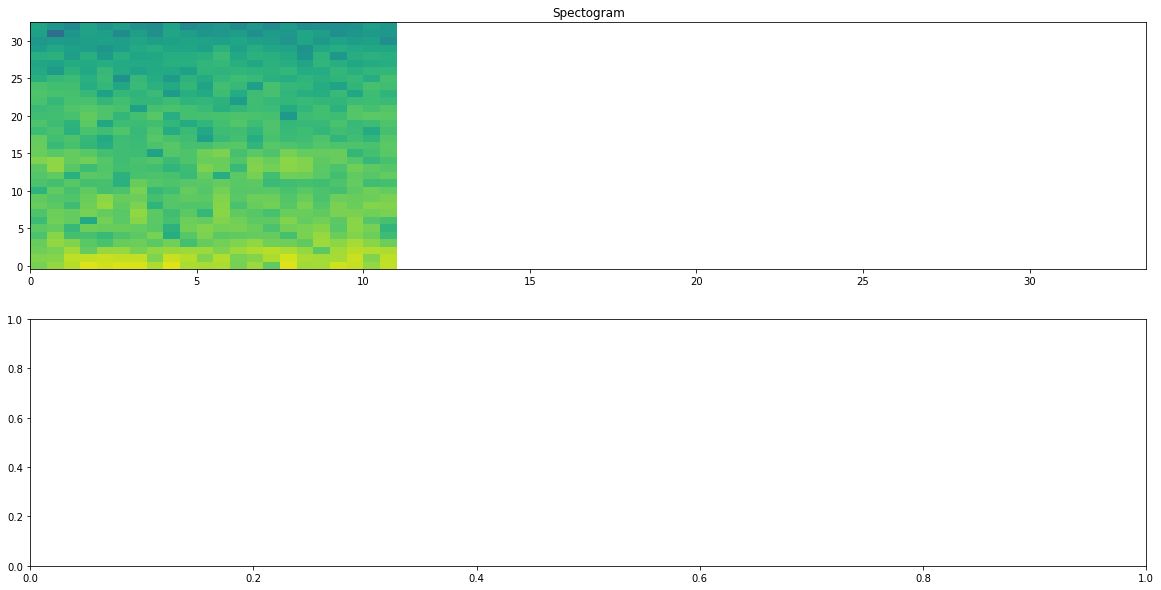

1
33 6955


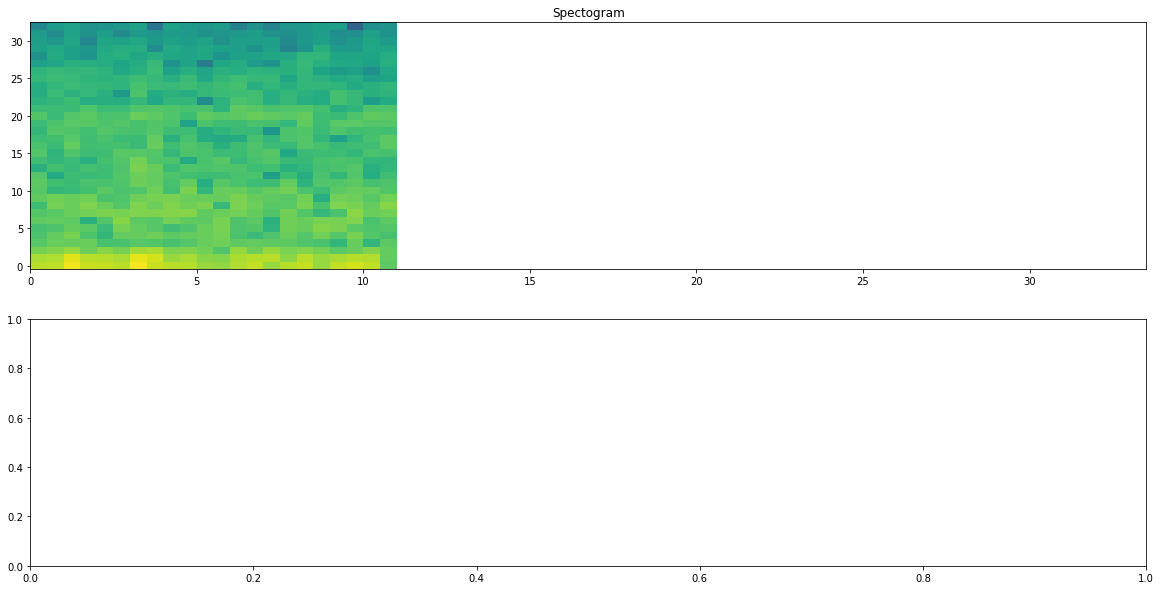

1
33 6955


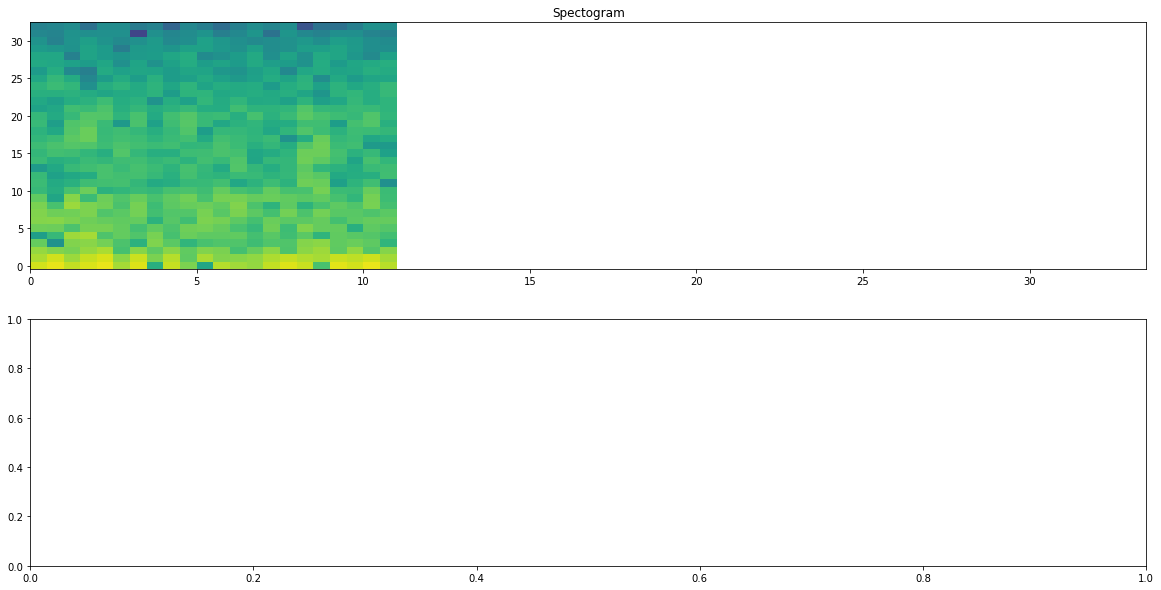

1
33 6955


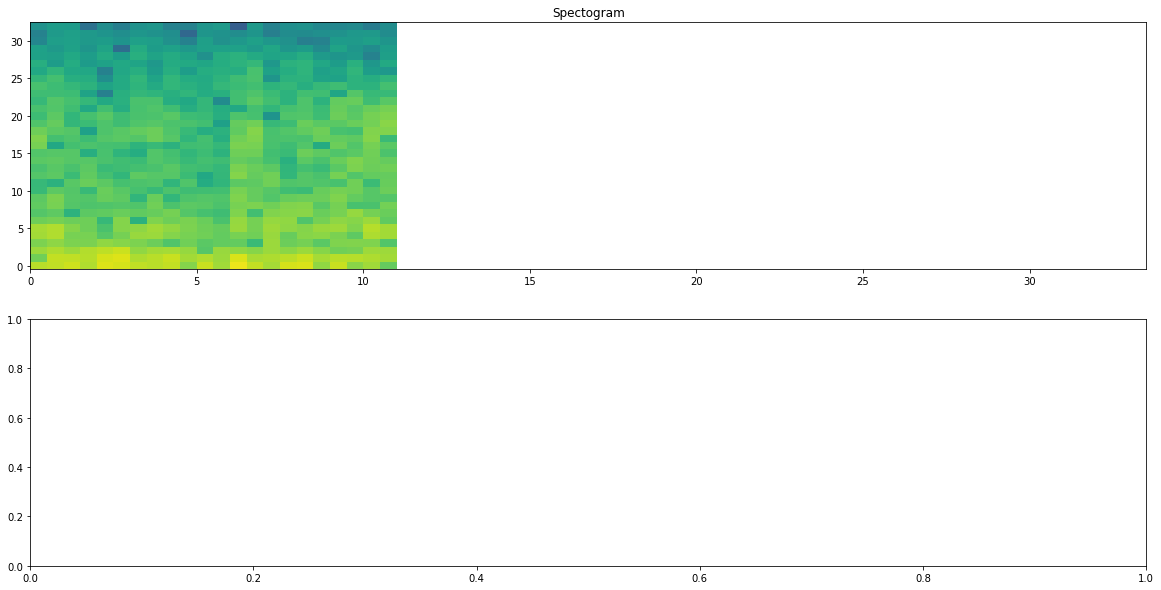

1
33 6955


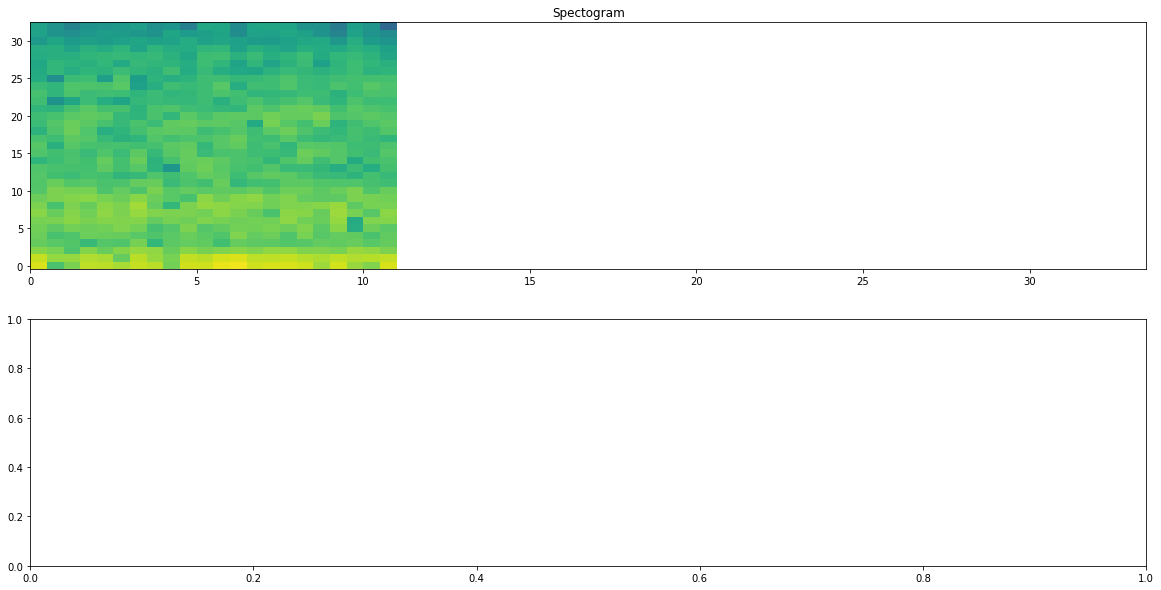

1
33 6955


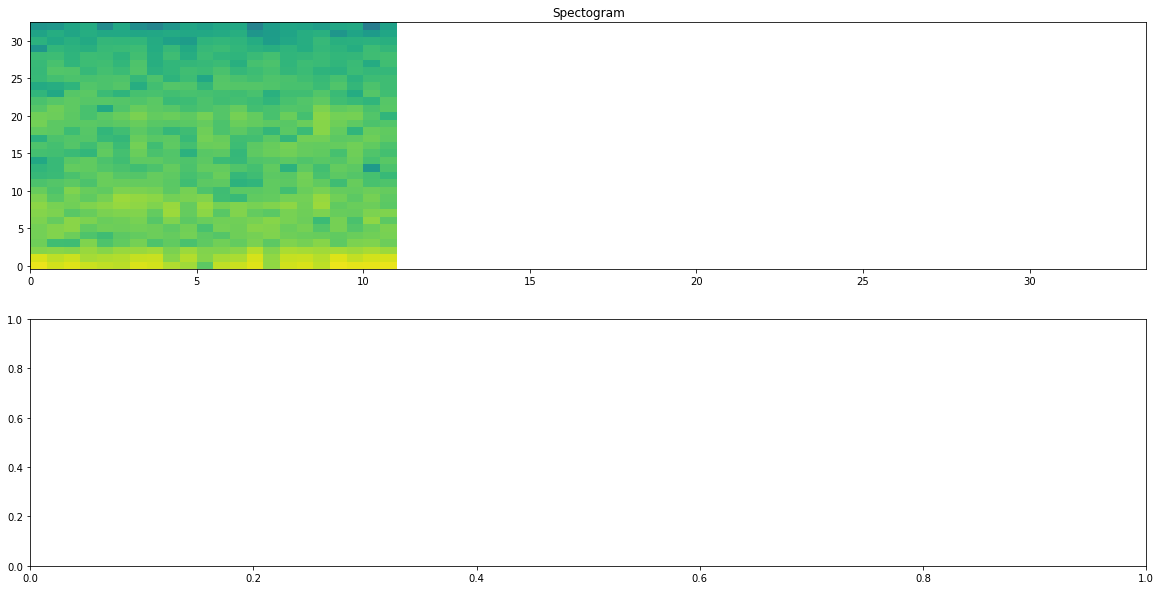

1
33 6955


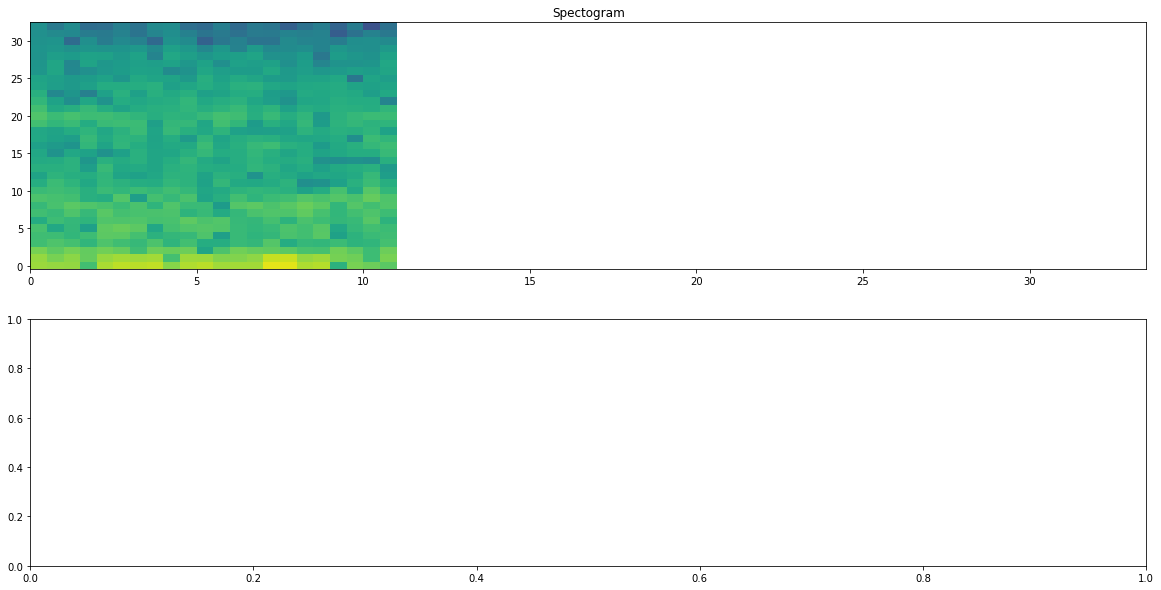

1
33 6955


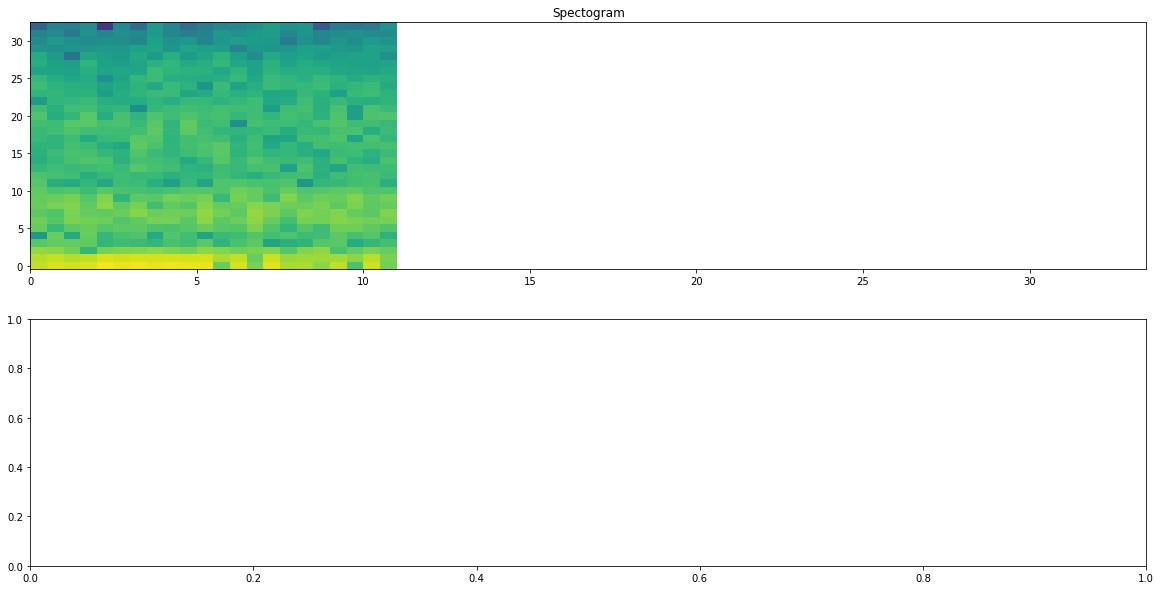

1
33 6955


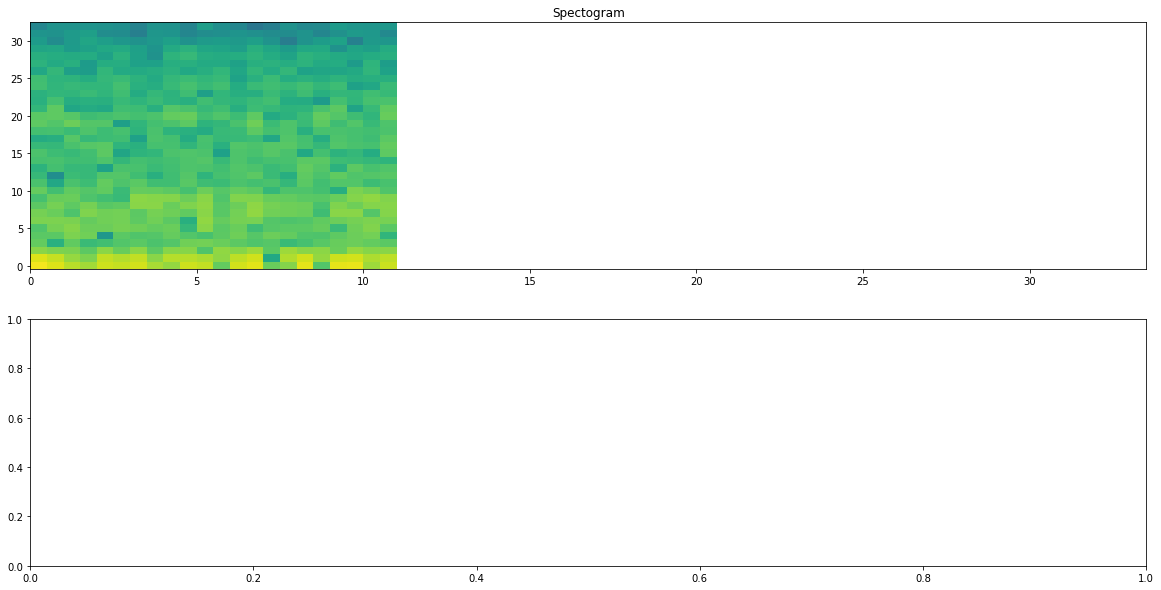

1
33 6955


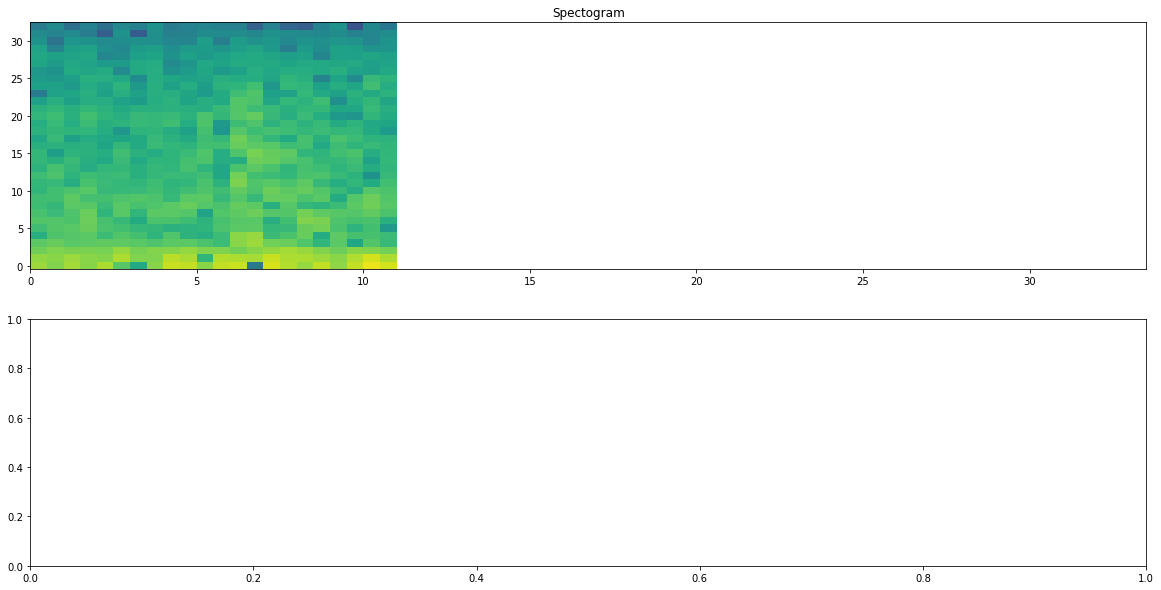

1
33 6955


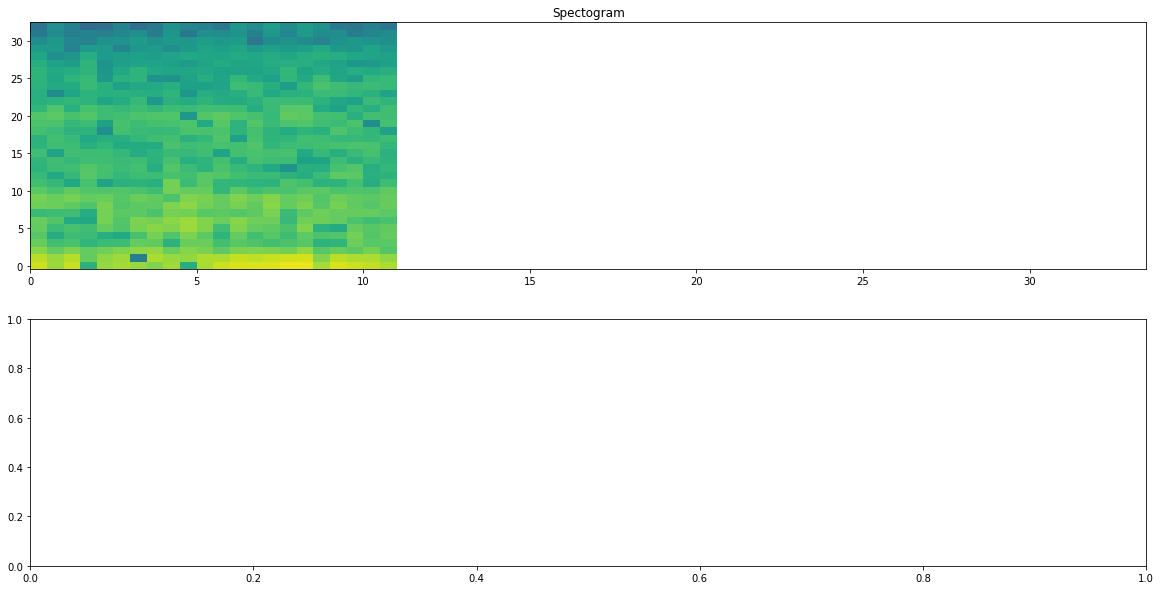

1
33 6955


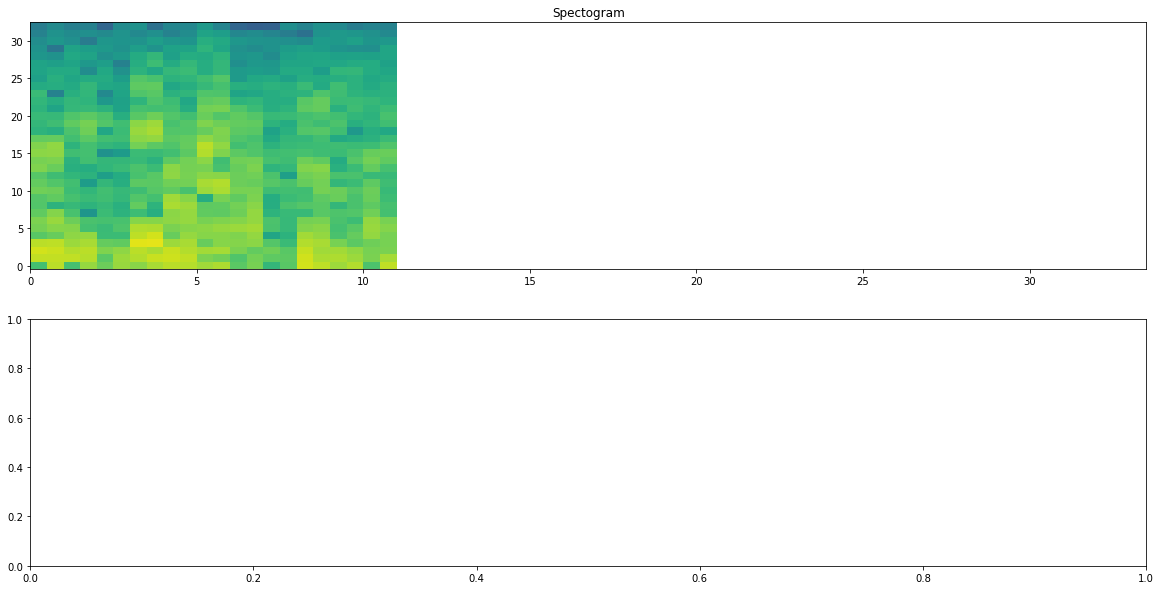

1
33 6955


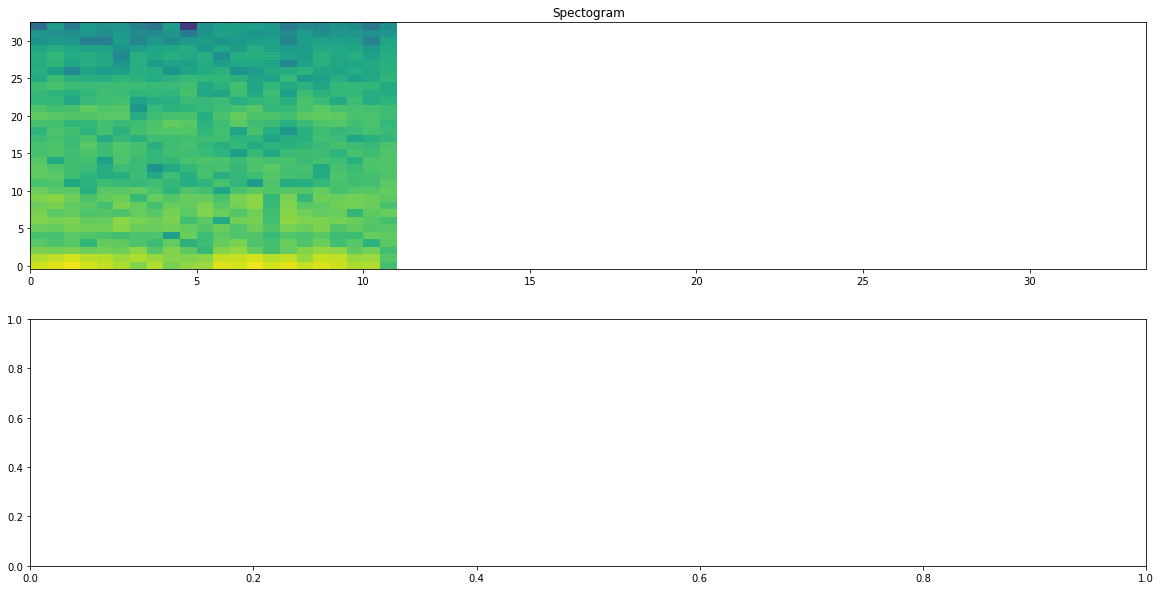

1
33 6955


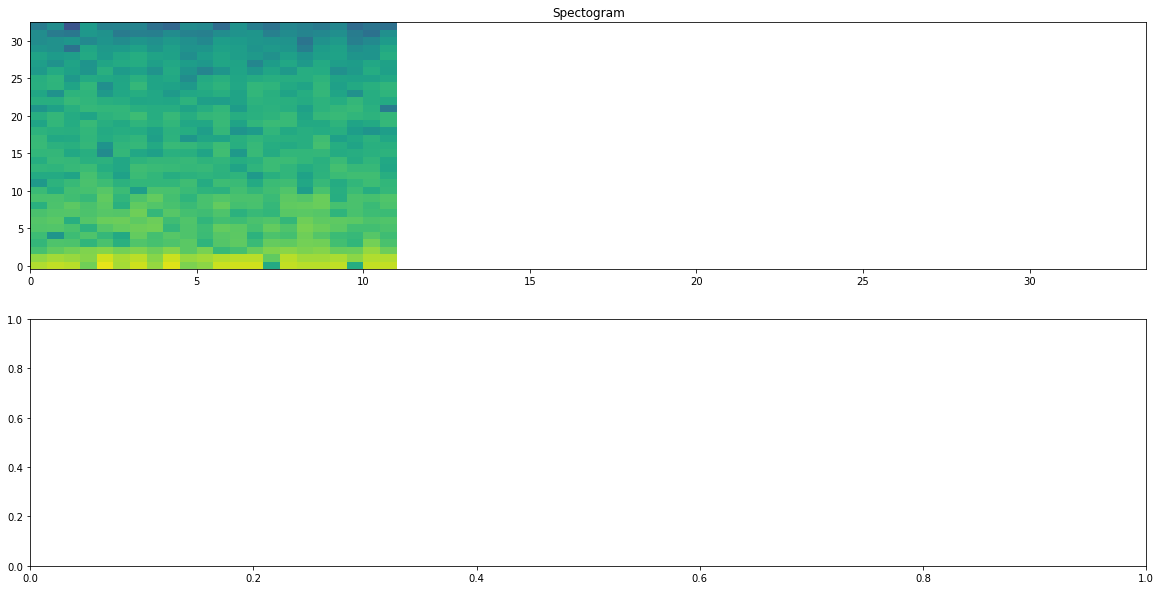

1
33 6955


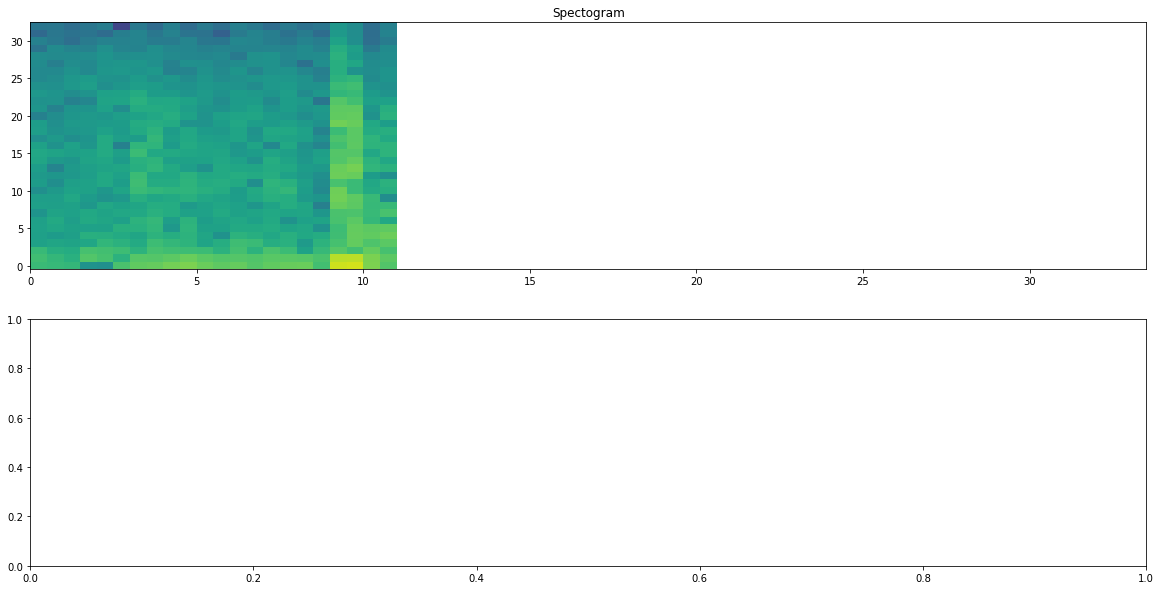

1
33 6955


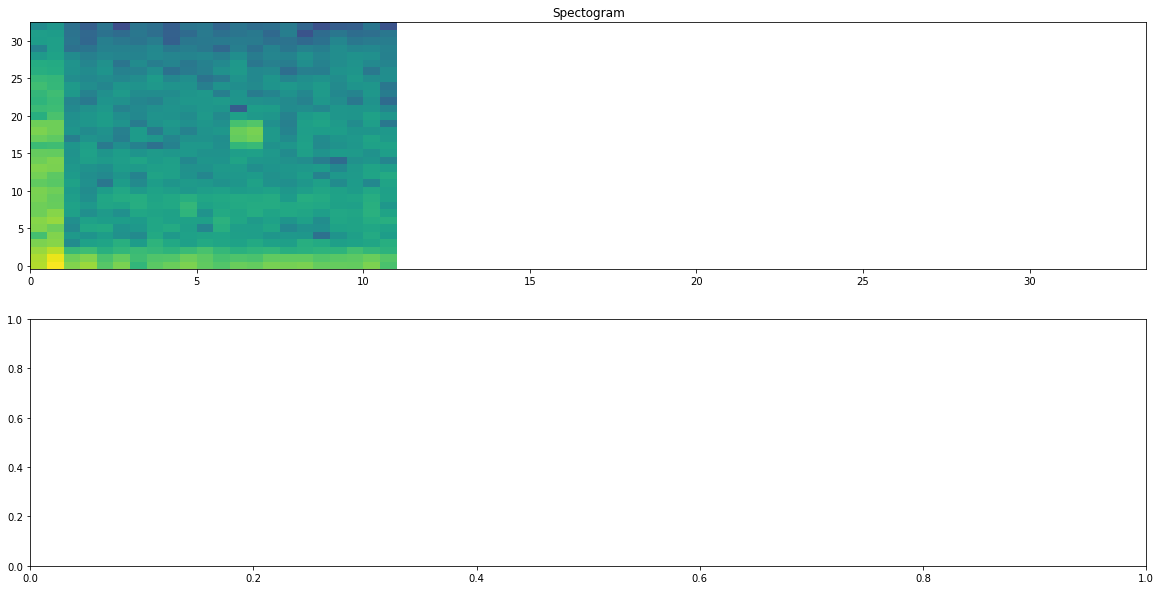

1
33 6955


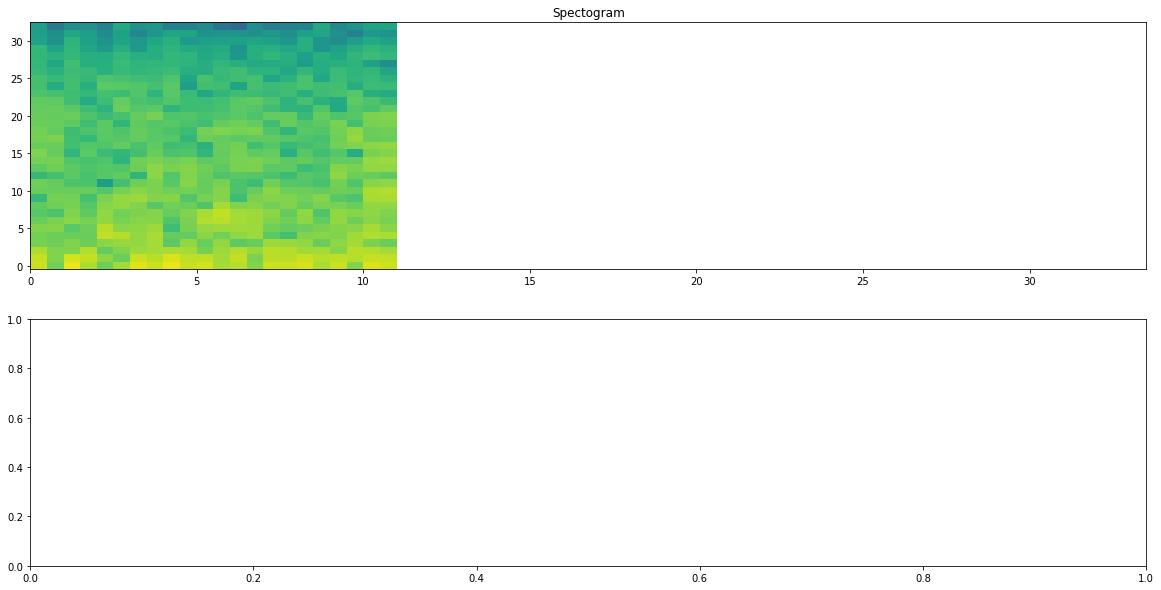

1
33 6955


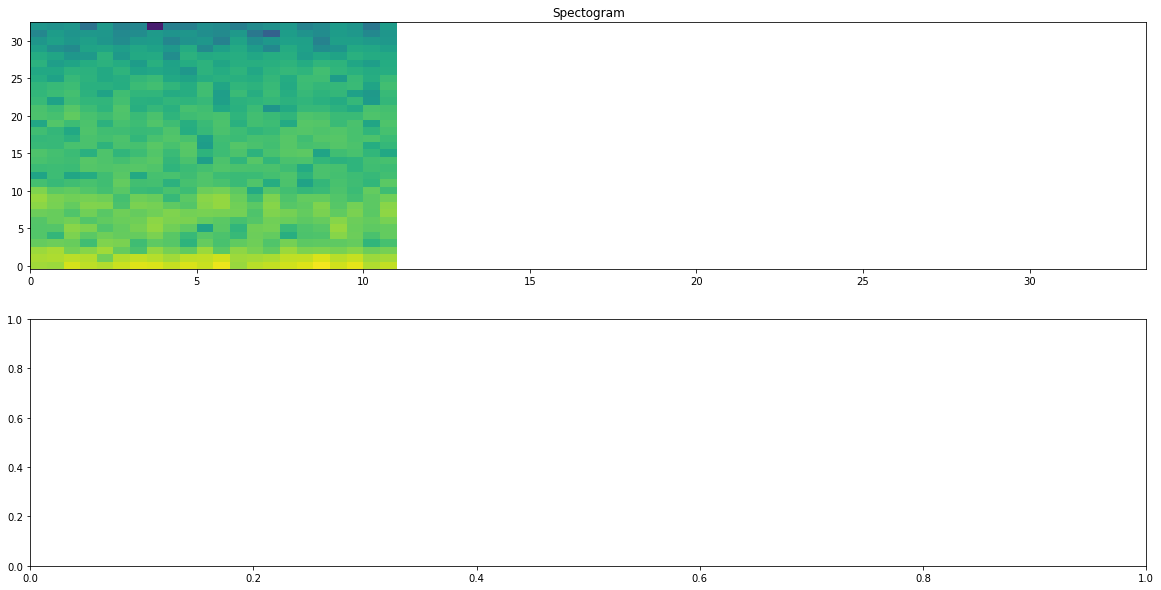

1
33 6955


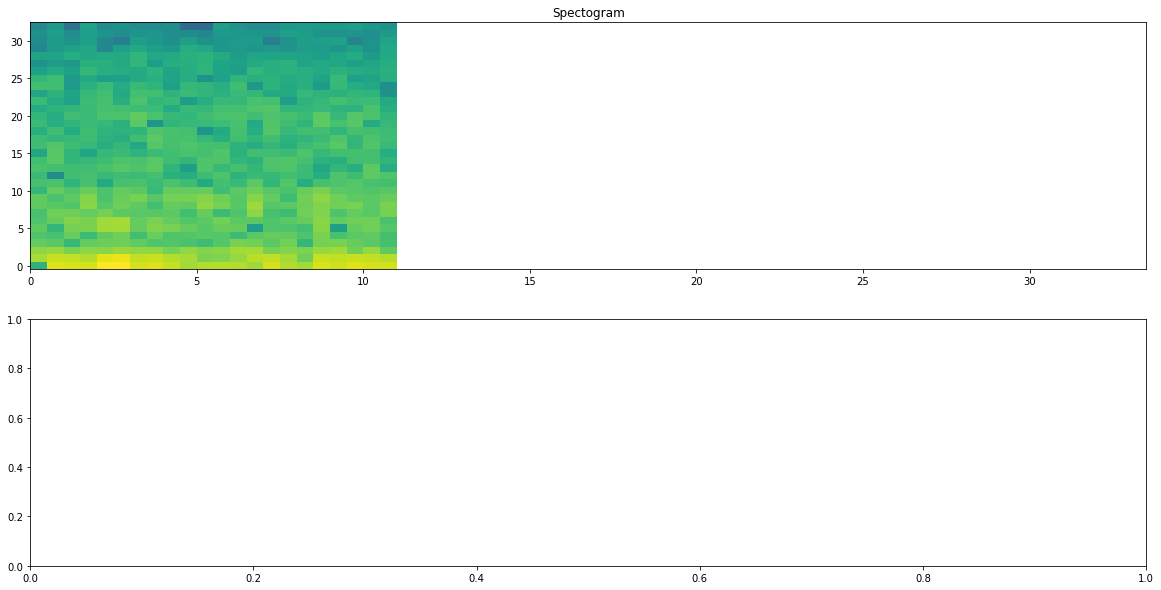

1
33 6955


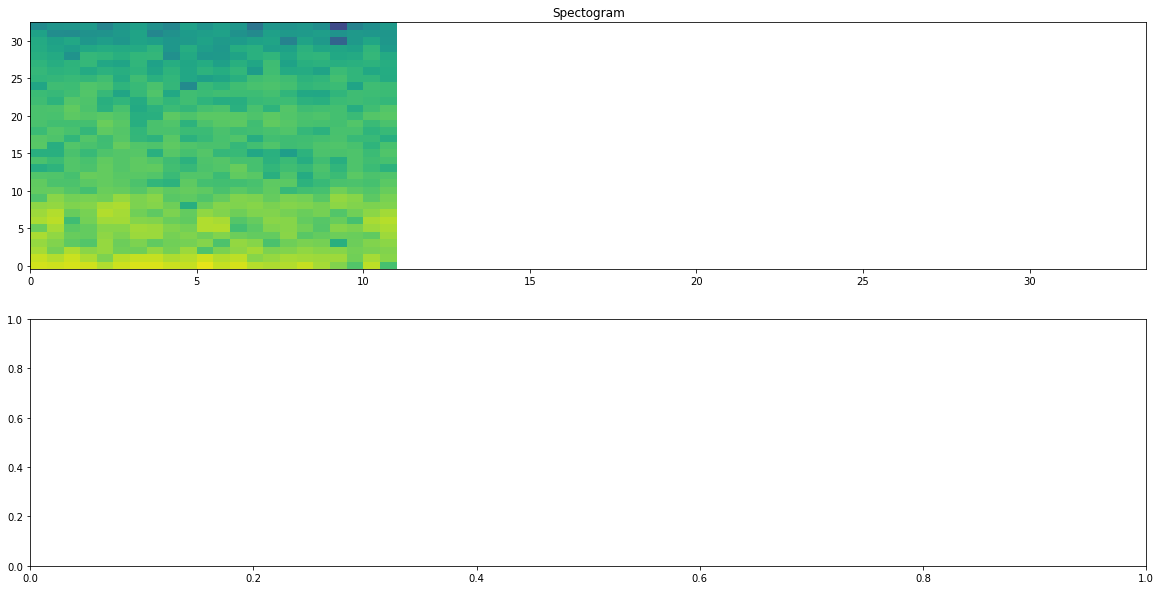

1
33 6955


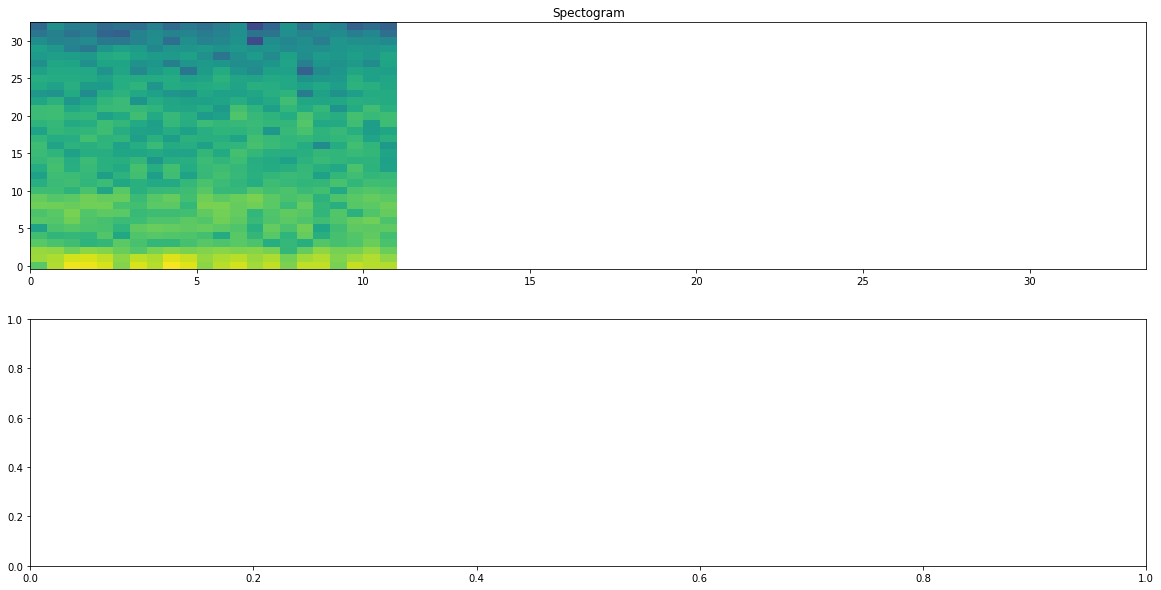

1
33 6955


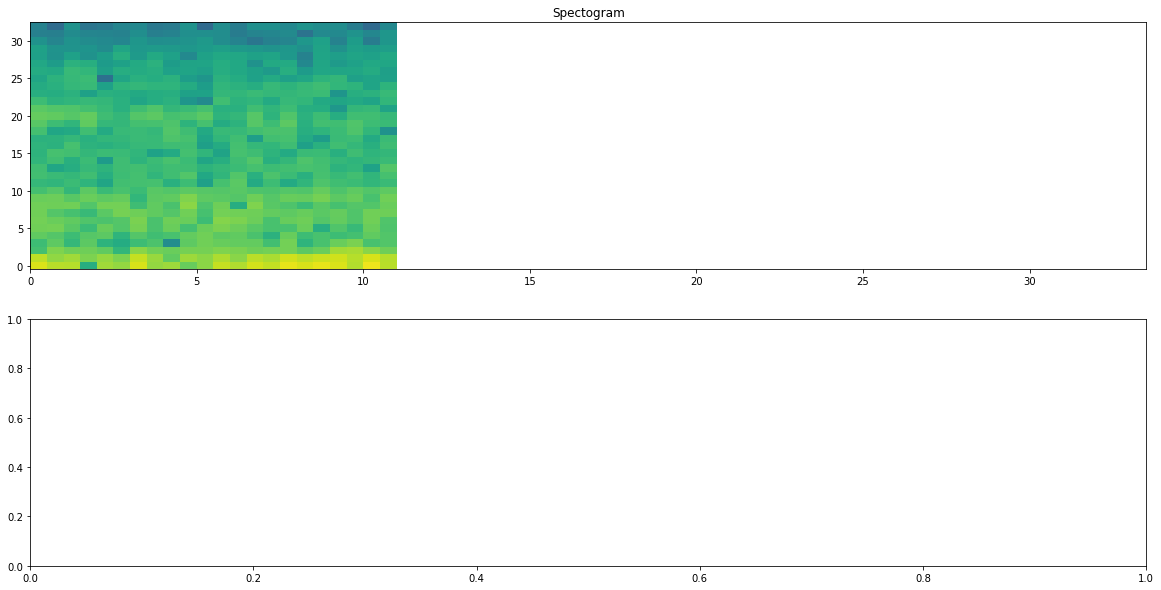

1
33 6955


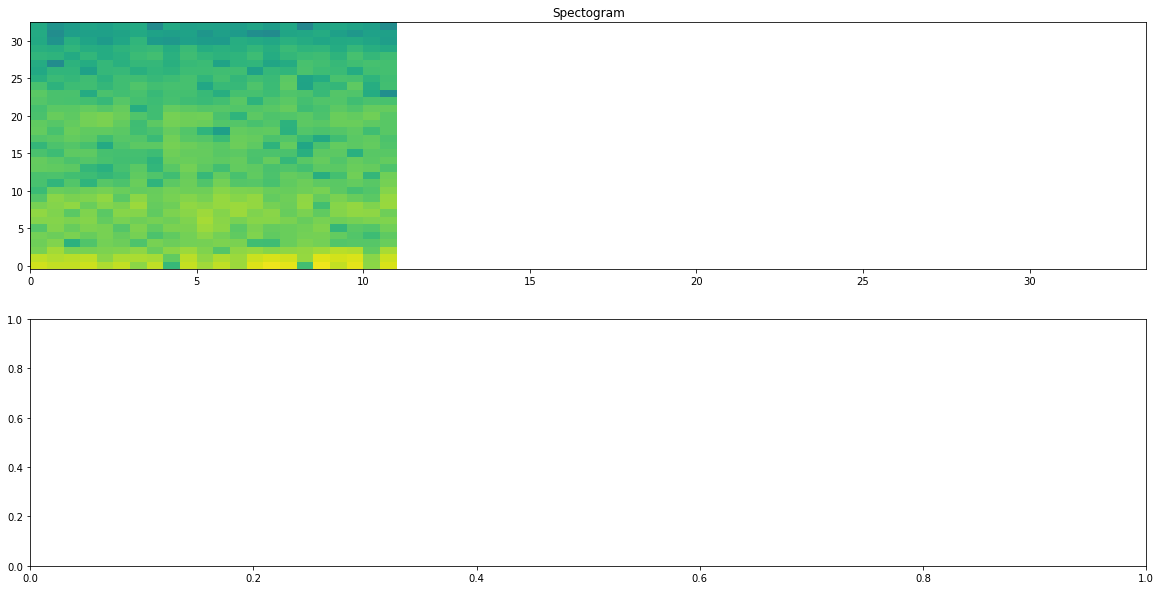

1
33 6955


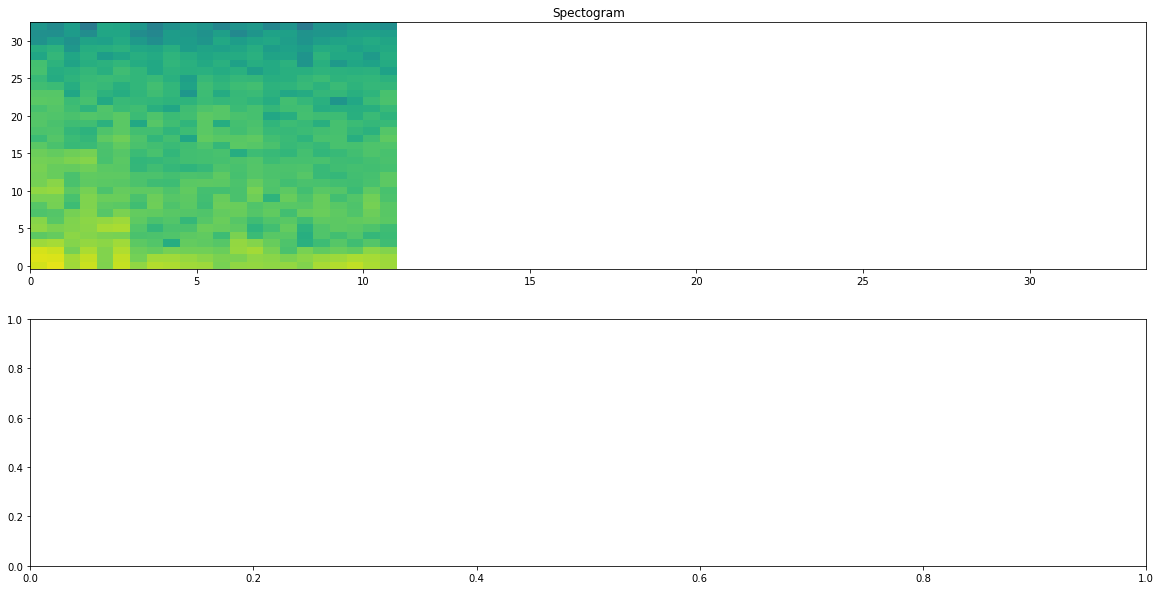

1
33 6955


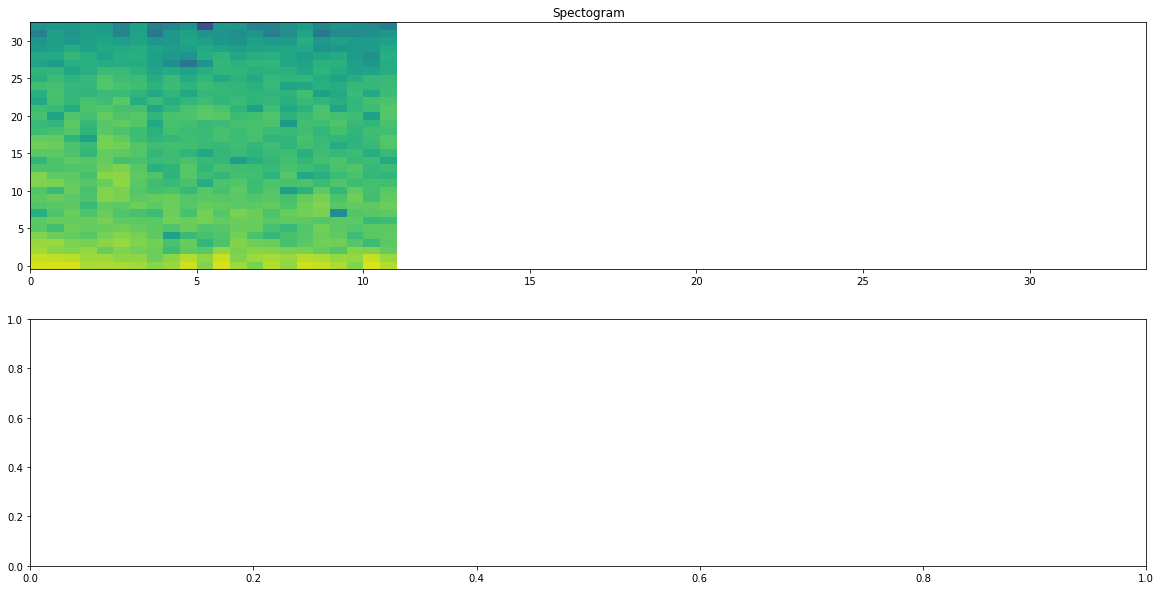

1
33 6955


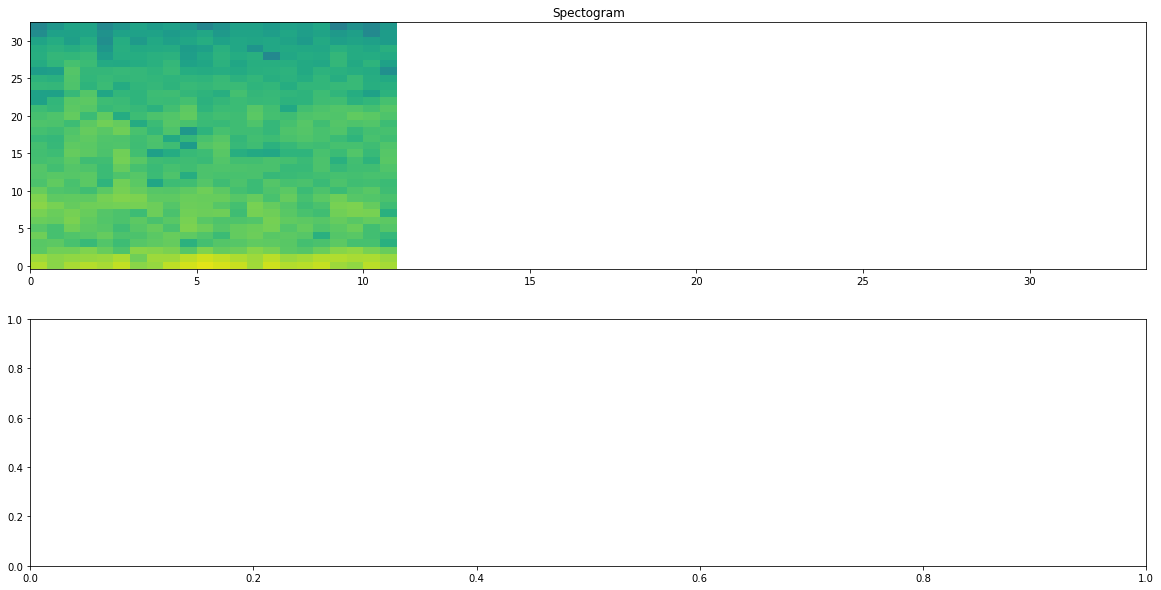

1
33 6955


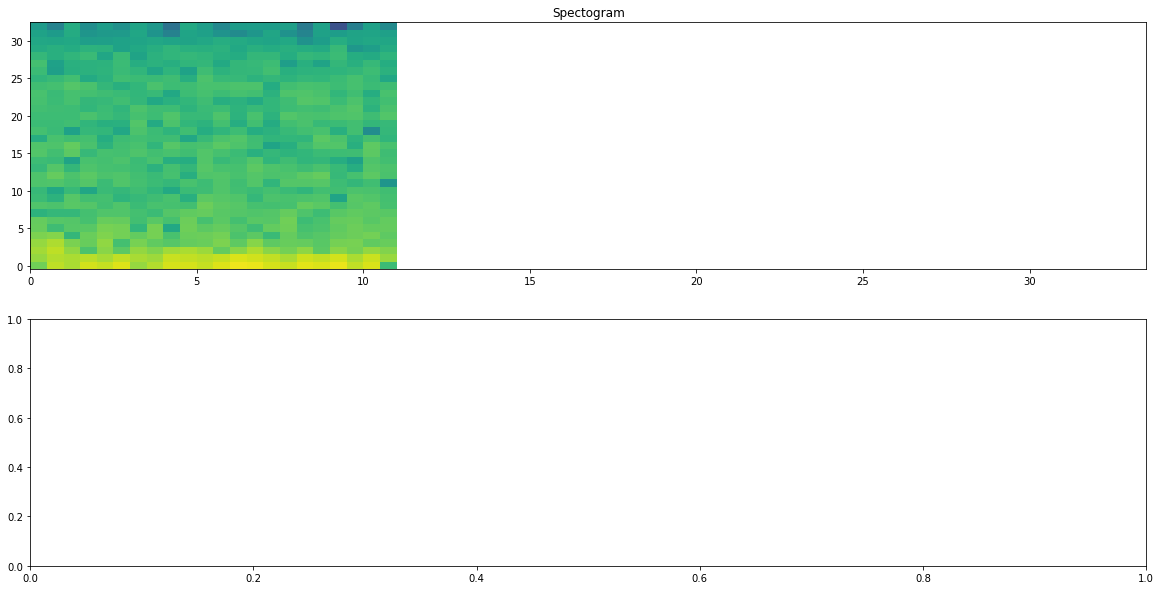

1
33 6955


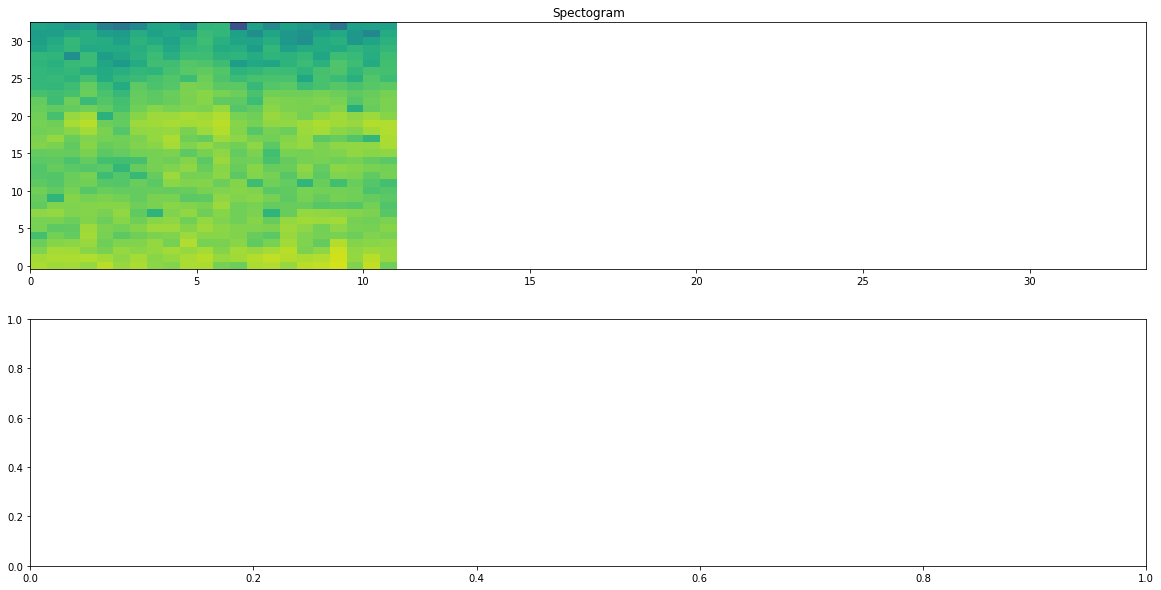

1
33 6955


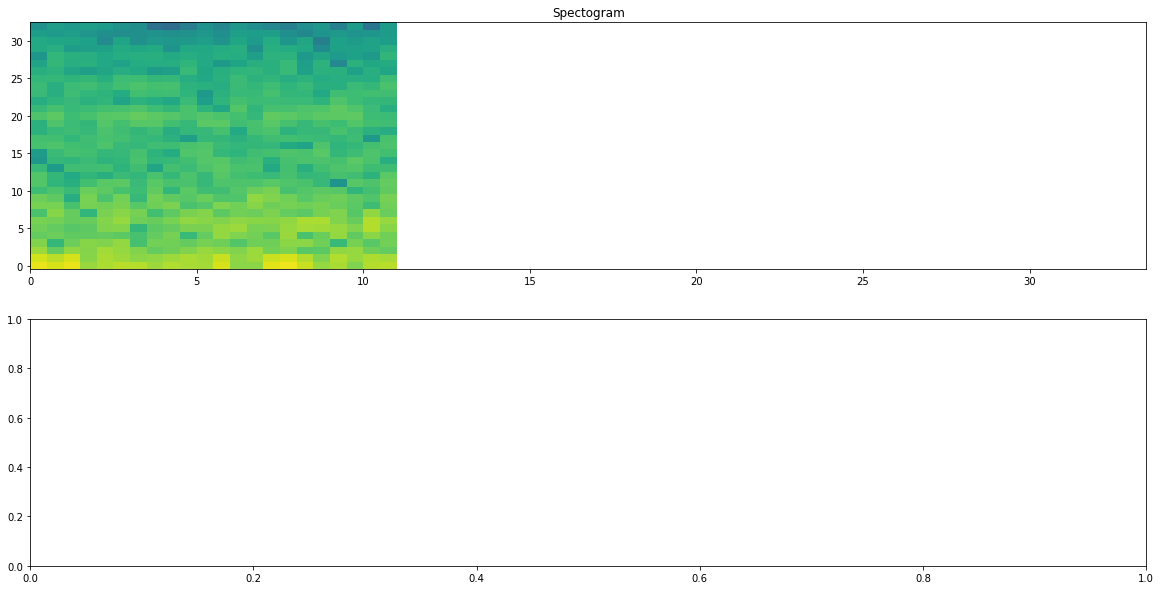

1
33 6955


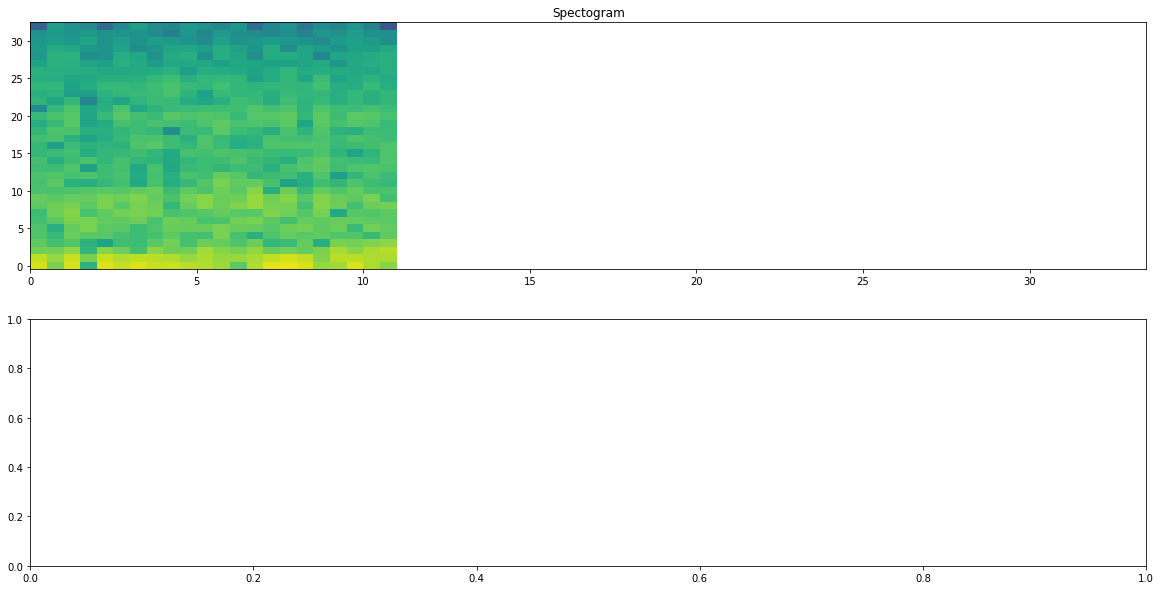

1
33 6955


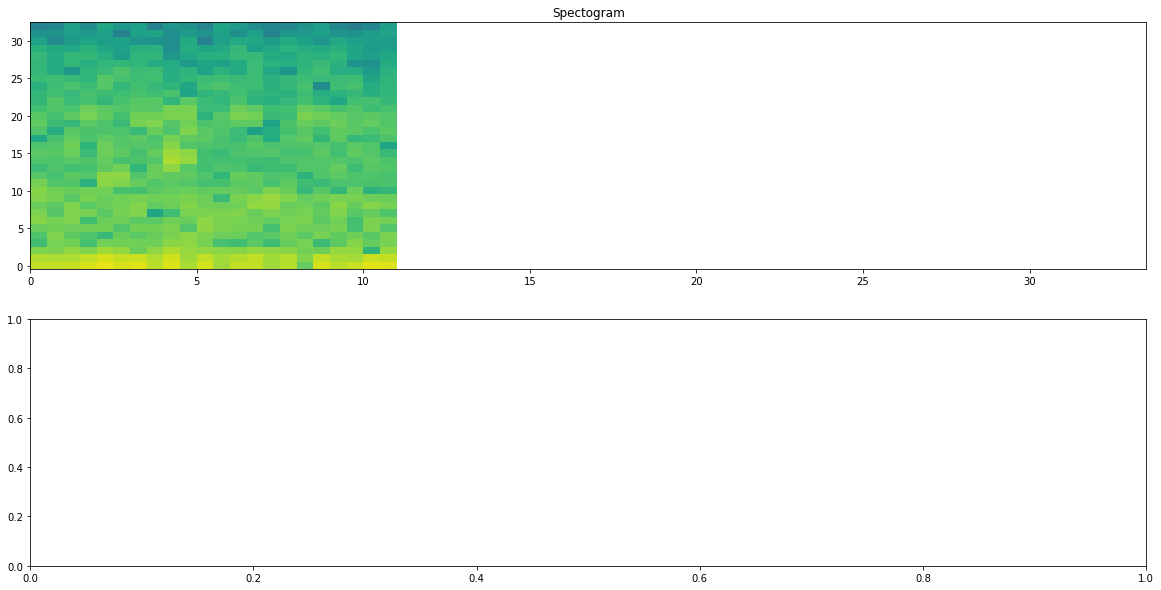

1
33 6955


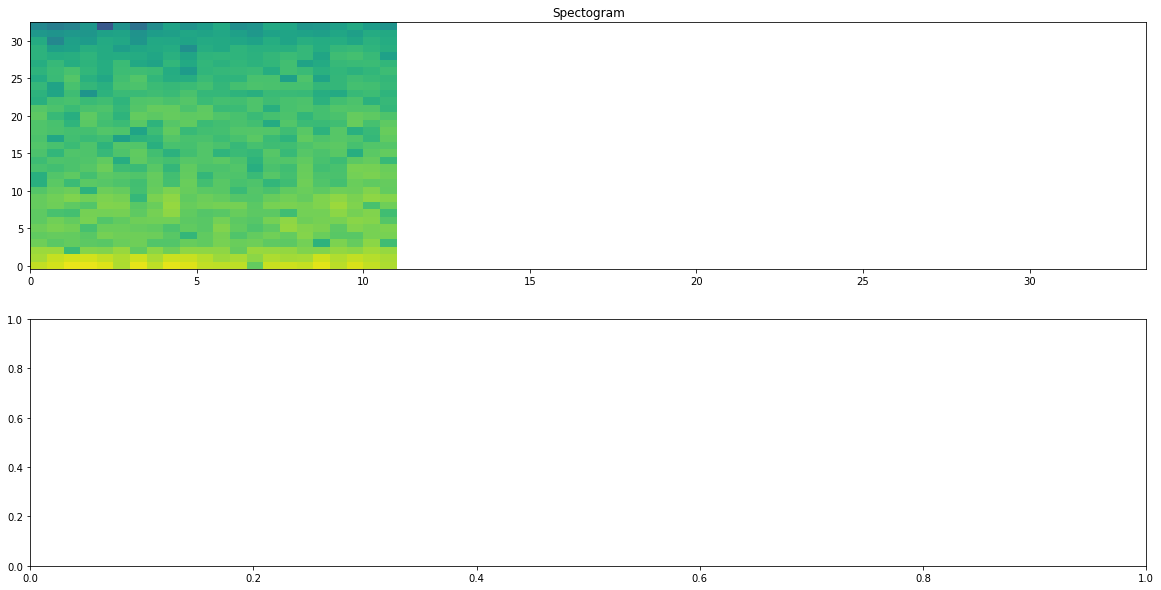

1
33 6955


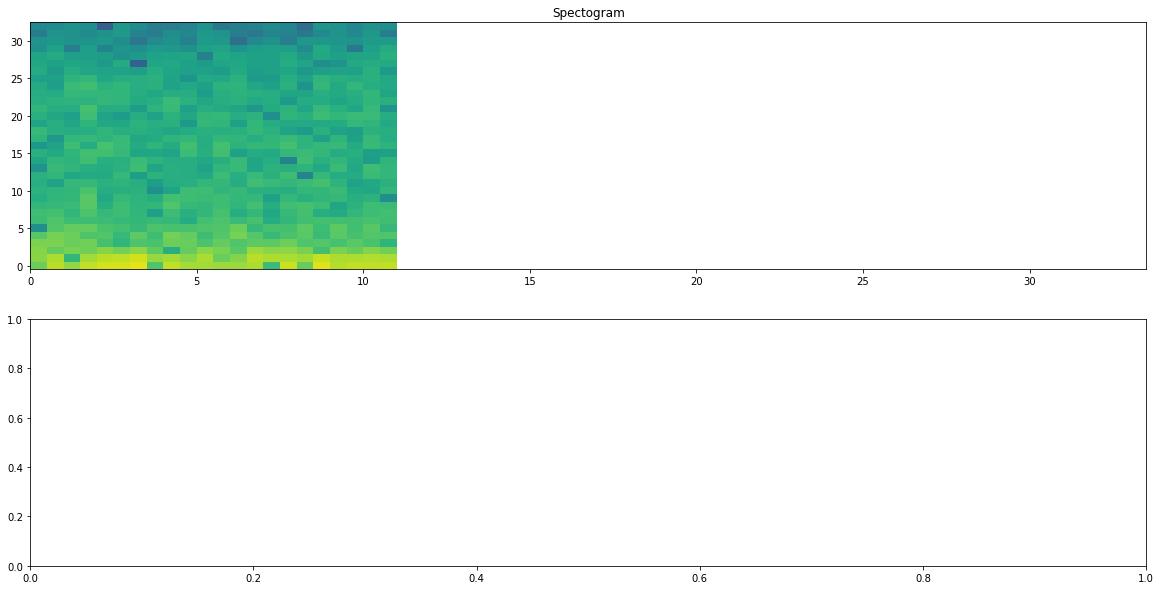

1
33 6955


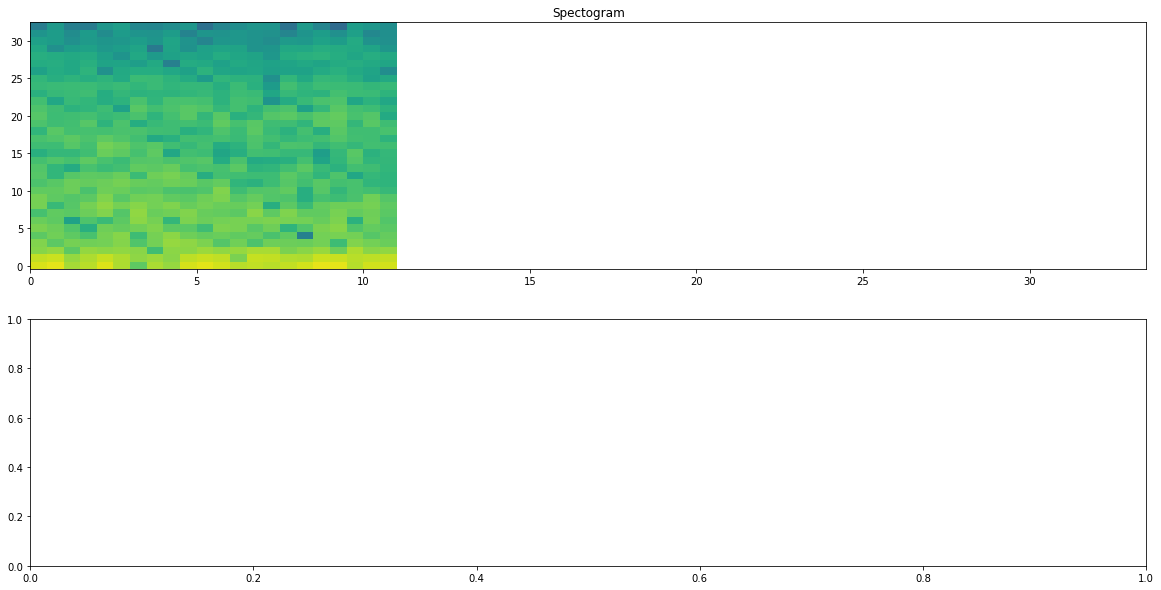

1
33 6955


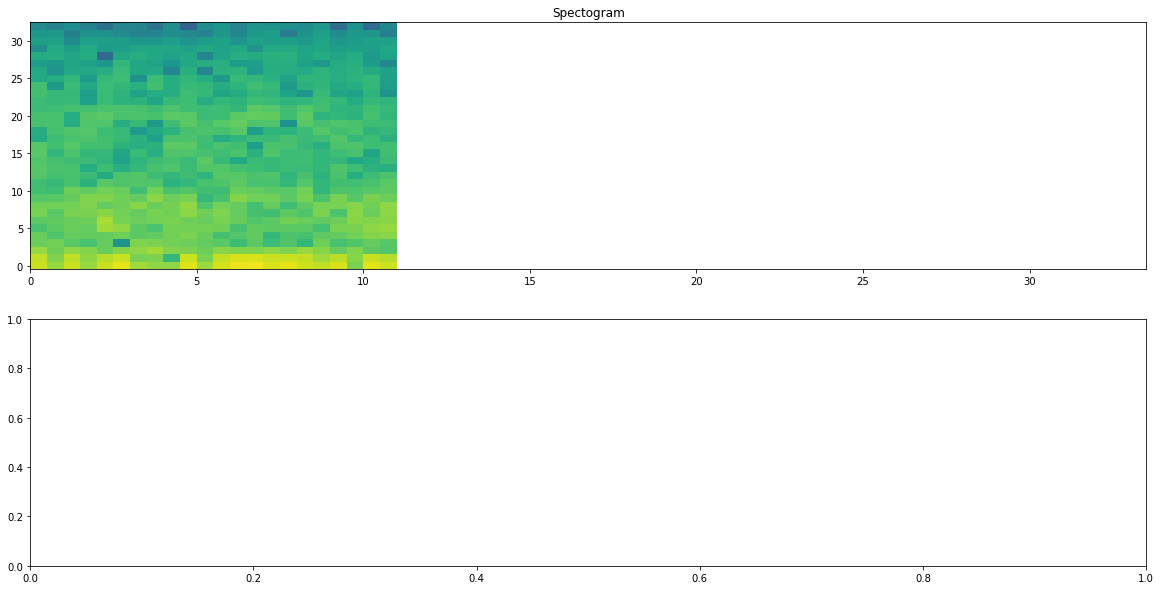

1
33 6955


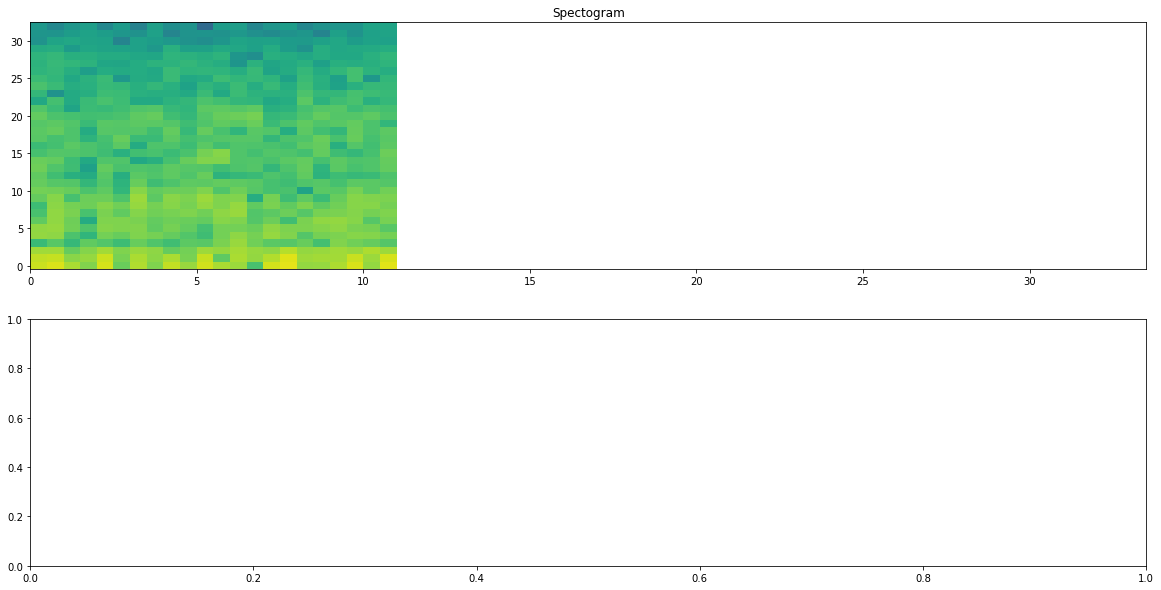

1
33 6955


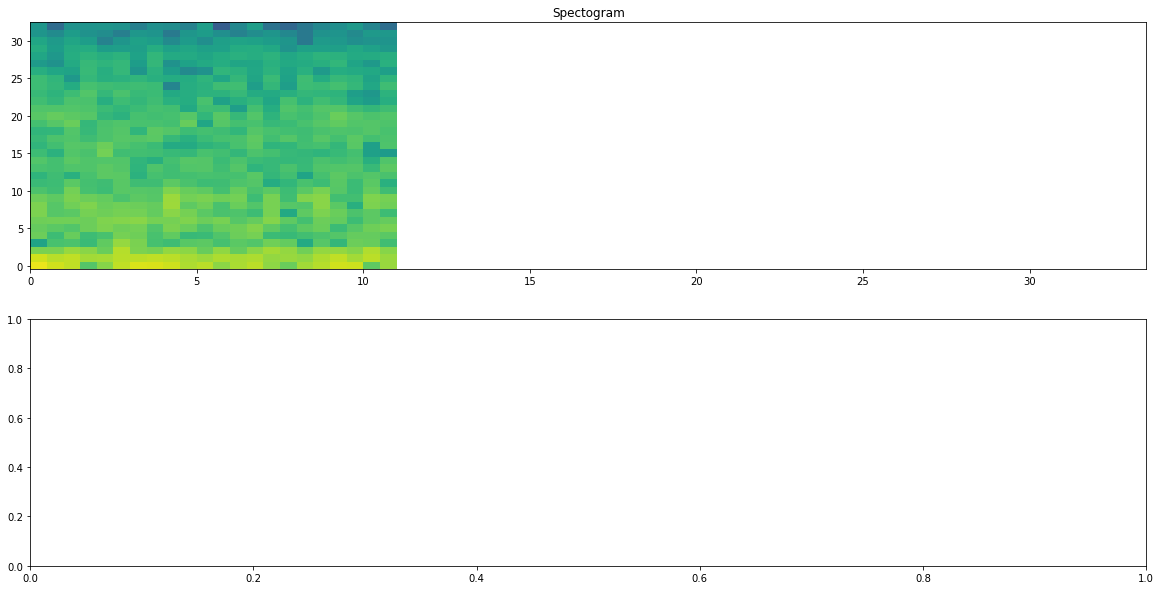

1
33 6955


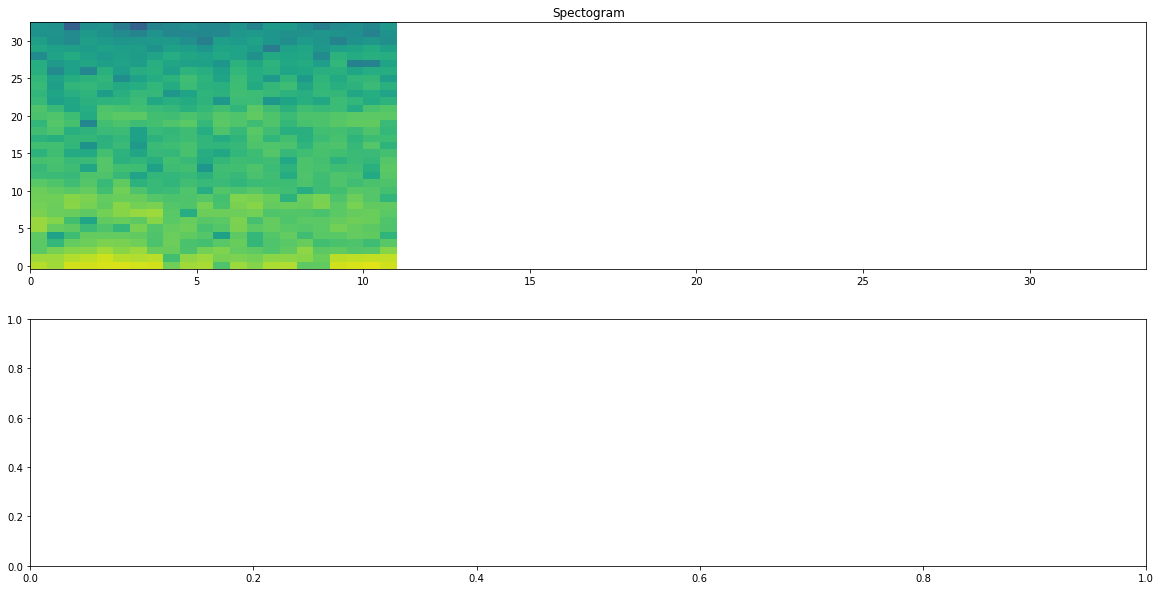

1
33 6955


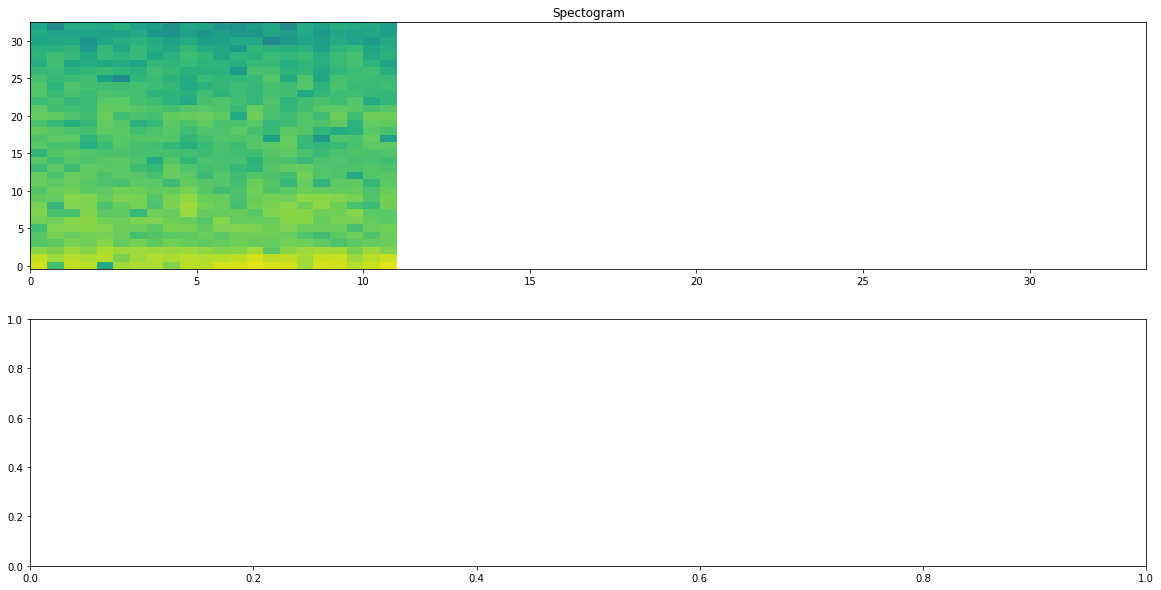

KeyboardInterrupt: 

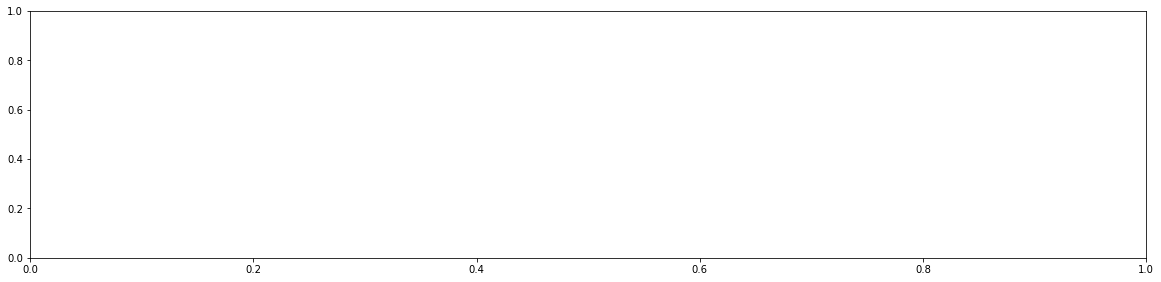

In [39]:
for file in files:
    spectogram = get_spec(file_path + file)
    spec = tf.transpose(spectogram[...,0], [1,0])
    fig, axis = plt.subplots(2, figsize=(20, 10))
    power_spec = np.log(spec)
    print(power_spec[0].ndim)
    height = power_spec.shape[0]
    width = power_spec.shape[1]
    print(height,width)
    X = np.linspace(0, power_spec.shape[0], num=width, dtype=int)
    Y =  range(height)
    axis[0].pcolormesh(X,Y, power_spec)
    axis[0].set_title('Spectogram')
    plt.show()

In [3]:
CHUNK = 1024 * 2
FORMAT = pa.paInt16
CHANNELS = 1
RATE = 44100 # in Hz

p = pa.PyAudio()

stream = p.open(
    format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)



fig,ax = plt.subplots()
x = np.arange(0,2*CHUNK,2)
line, = ax.plot(x, np.random.rand(CHUNK),'r')
ax.set_ylim(-60000,60000)
ax.ser_xlim = (0,CHUNK)
fig.show()

while 1:
    data = stream.read(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    line.set_ydata(dataInt)
    fig.canvas.draw()
    fig.canvas.flush_events()

ALSA lib conf.c:3723:(snd_config_hooks_call) Cannot open shared library libasound_module_conf_pulse.so (libasound_module_conf_pulse.so: libasound_module_conf_pulse.so: cannot open shared object file: No such file or directory)
ALSA lib control.c:1379:(snd_ctl_open_noupdate) Invalid CTL hw:0
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib dlmisc.c:345:(snd_dlobj_cache_get0) Cannot open shared library libasound_module_rate_samplerate.so (libasound_module_rate_samplerate.so: libasound_module_rate_samplerate.so: cannot open shared object file: No such file or directory)
ALSA lib pcm_rate.c:1468:(snd_pcm_rate_open) Cannot find rate converter
ALSA lib dlmisc.c:345:(snd_dlobj_cache_get0) Cannot open shared library libasound_module_rate_samp

: 

: 